In [20]:
# 01_baseline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper")   

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.simplefilter('ignore')


import statistics
import math
from random import random
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

In [21]:
# Preparation
d_train = pd.read_csv('dev_rsc/train.csv')
d_test = pd.read_csv('dev_rsc/test.csv')
data_cleaner = [d_train, d_test]

data1_cat = list(d_train.columns)
data1_cat_w = data1_cat[:]

data1_cat_noncat = ["LotArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
                    "LowQualFinSF","GrLivArea","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YearBuilt", "YearRemodAdd", "YrSold"]
data1_cat.remove("Id")

for x in data1_cat_w:
    if x in data1_cat_noncat:
        data1_cat.remove(x)

In [22]:
def prtSep(length=20, marker="-"):
    print( marker * length)

# Preliminary Analysis

In [38]:
def baseline():
    prtSep()
    print("***** Baseline Analysis *****")
    prtSep()
    

    # フィールドの比較
    #   テストデータ: 
    #       ドロップ対象：説明変数, 訓練データに存在していない目的変数
    display(d_train.head())
    display(d_test.head())
    prtSep()
    
    # レコードフォーマットの確認
    print("Shape of Train:" , d_train.shape)
    print("Shape of Test:" , d_test.shape)
    prtSep()

    # 項目について基本情報確認
    print(d_train.info())
    prtSep()

    print(d_test.info())
    prtSep()
       
    # 項目の比較
    #   比例：平均値および分散に大きな違いがあるか、外れ値はないか
    print(d_train.describe())
    prtSep()
    print(d_test.describe())
    prtSep()

def na():
    # null値の確認
    print(d_train.isnull().sum())
    prtSep()
    print(d_test.isnull().sum())
    prtSep()
    
    train_na_col_list = d_train.isnull().sum()[d_train.isnull().sum()>0].index.tolist()
    print(d_train[train_na_col_list].dtypes.sort_values())
    prtSep()
    
    test_na_col_list = d_test.isnull().sum()[d_test.isnull().sum()>0].index.tolist()
    print(d_test[train_na_col_list].dtypes.sort_values())
    prtSep()
    
    #データの欠損値を確認する
    d_train_na = d_train.isnull().sum()[d_train.isnull().sum()>0].sort_values(ascending=False)
    d_test_na = d_test.isnull().sum()[d_test.isnull().sum()>0].sort_values(ascending=False)
    
    
    #欠損値の数をグラフ化
    fig = plt.figure(figsize=(80, 40)) # 24 x 6
    fig.add_subplot(2,1,1)
    ax=sns.barplot(x=d_train_na.index, y=d_train_na)
    ax.tick_params(axis='x', labelrotation=45, labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    
    fig.add_subplot(2,1,2)
    ax=sns.barplot(x=d_test_na.index, y=d_test_na)
    ax.tick_params(axis='x', labelrotation=45, labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)

In [39]:
def ba_target(target_field):
    prtSep()
    print("***** Baseline Analysis - Target varaiable *****")
    prtSep()

    # 目的変数
    plt.figure(figsize=(20, 10))
    sns.distplot(d_train[target_field], bins=50, color='#123456', label='data')
    plt.legend() # 凡例を表示
    plt.show()   # ヒストグラムを表示
  
    prtSep()

    #skewness and kurtosis
    print("Skewness: %f" % d_train[target_field].skew())
    print("Kurtosis: %f" % d_train[target_field].kurt())
    prtSep()

In [40]:
def main_base():
    ## Baseline analysis
    baseline()
    na()
    ba_target('SalePrice')

# Baseline-2

In [28]:
def ba_categoral_count(target_field):
    prtSep()
    print("***** Baseline Analysis - Categoral data - valuecount *****")
    prtSep()
    # 訓練データ
    #     カテゴリの数: 種類が多すぎる場合には集約、種類が少ない場合には他の値と合わせてFE 
    #            例) 男女で16歳以下を"子供"とする
    #     カテゴリの値: エンコーディングの必要性
    #     不明値の存在: 例 性別に三つ目の値が混じっている
    for col in data1_cat:
        if d_train[col].dtype != 'float64' and col != target_field:
            print("*** Train data -",col)
            print("* Absolute value")
            print(d_train[col].value_counts())
            print("* Ratio")
            print(d_train[col].value_counts(normalize=True))
            prtSep()

In [29]:
def ba_categoral_count_plot(target_field):
    # 各カテゴリーが学習と予測で同じ傾向かを確認
    prtSep()
    print("***** Baseline Analysis - Categoral data - Plot *****")
    prtSep()
    for col in data1_cat:
        if d_train[col].dtype != 'float64' and col != target_field:
            fig = plt.figure(figsize=(24, 6)) # 24 x 6

            
            # 学習データ
            fig.add_subplot(1,2,1)
            ax = sns.countplot(x=col, data=d_train);
            ax.tick_params(axis='x', labelrotation=45, labelsize=15)
            ax.tick_params(axis='y', labelsize=15)
            ax.xaxis.label.set_size(20)
            ax.yaxis.label.set_size(20)
            
            
            # 予測
            fig.add_subplot(1,2,2)
            ax = sns.countplot(x=col, data=d_test);
            ax.tick_params(axis='x', labelrotation=45, labelsize=15)
            ax.tick_params(axis='y', labelsize=15)
            ax.xaxis.label.set_size(20)
            ax.yaxis.label.set_size(20)

In [30]:
def ba_categoral_cor(target_field):
    prtSep()
    print("***** Baseline Analysis - Catagoral correated with Surviv *****")
    prtSep()

    target_opposit="Not"+target_field       
    # Survival Correlation for Categoral
    for x in data1_cat:
        if d_train[x].dtype != 'float64' and x != target_field:
            print(target_field + ' Correlation by:', x)
            group_mean = d_train[[x, target_field]].groupby(x, as_index=False).mean() 
            print(group_mean)

            fig = plt.figure(figsize=(24, 6)) # 24 x 6
            #fig, axes = plt.subplots(1, 2, figsize=(8, 6))
            
            ax = fig.add_subplot(1,2,1)
            group_mean.plot.bar(ax=ax)
            ax.set_title(x, y=-0.2, size=18)
            ax.tick_params(axis='x', labelrotation=45, labelsize=15)
            ax.tick_params(axis='y', labelsize=15)
            ax.xaxis.label.set_size(20)
            ax.yaxis.label.set_size(20)
            
            #box plot overallqual/saleprice
            ax = fig.add_subplot(1,2,2)
            data = pd.concat([d_train[target_field], d_train[x]], axis=1)
            sns.boxplot(x, y=target_field, data=data, ax=ax)
            ax.set_ylim(ymin=0, ymax=800000)
            ax.tick_params(axis='x', labelrotation=45, labelsize=15)
            ax.tick_params(axis='y', labelsize=15)
            ax.xaxis.label.set_size(20)
            ax.yaxis.label.set_size(20)

In [31]:
def ba_conti(target_field):
    prtSep()
    print("***** Baseline Analysis - Continuous data *****")
    prtSep()
 
    for x in data1_cat_noncat :
            data = pd.concat([d_train[target_field], d_train[x]], axis=1)

            fig = plt.figure(figsize=(16, 6)) # 24 x 6
            
            # 左側: scatter plot:広がりを確認
            # 右側: box plot:傾向を確認
            
            # scatter plot totalbsmtsf/saleprice
            ax = fig.add_subplot(1,2,1)
            data.plot.scatter(x, y=target_field, ylim=(0,800000), ax=ax);

            ax = fig.add_subplot(1,2,2)
            sns.boxplot(x=x, y=target_field, data=data, ax=ax)
            ax.set_ylim(ymin=0, ymax=800000);
            ax.tick_params(axis='x', labelrotation=90)
            ax.locator_params(nbins=20)

In [32]:
def ba_conti_cor(target_field):
    fig = plt.figure(figsize=(24, 12))

    prtSep()
    print("***** Baseline Analysis - Continuous data Correlation*****")
    prtSep()
    ax=sns.heatmap(d_train[[*data1_cat_noncat,"SalePrice"]].corr())
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    a=abs(d_train[[*data1_cat_noncat,"SalePrice"]].corr()["SalePrice"])
    print(a.sort_values(ascending=False).head(10))

--------------------
***** Baseline Analysis *****
--------------------


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

--------------------
Shape of Train: (1460, 81)
Shape of Test: (1459, 80)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  H

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
--------------------
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
--------------------
LotFrontage     float64
MasVnrArea      float64
GarageYrBlt     float64
PoolQC           object
GarageCond       object
GarageQual       object
GarageFinish     object
GarageType       object
FireplaceQu      object
Electrical       object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Alley            object
Fence            object
MiscFeature   

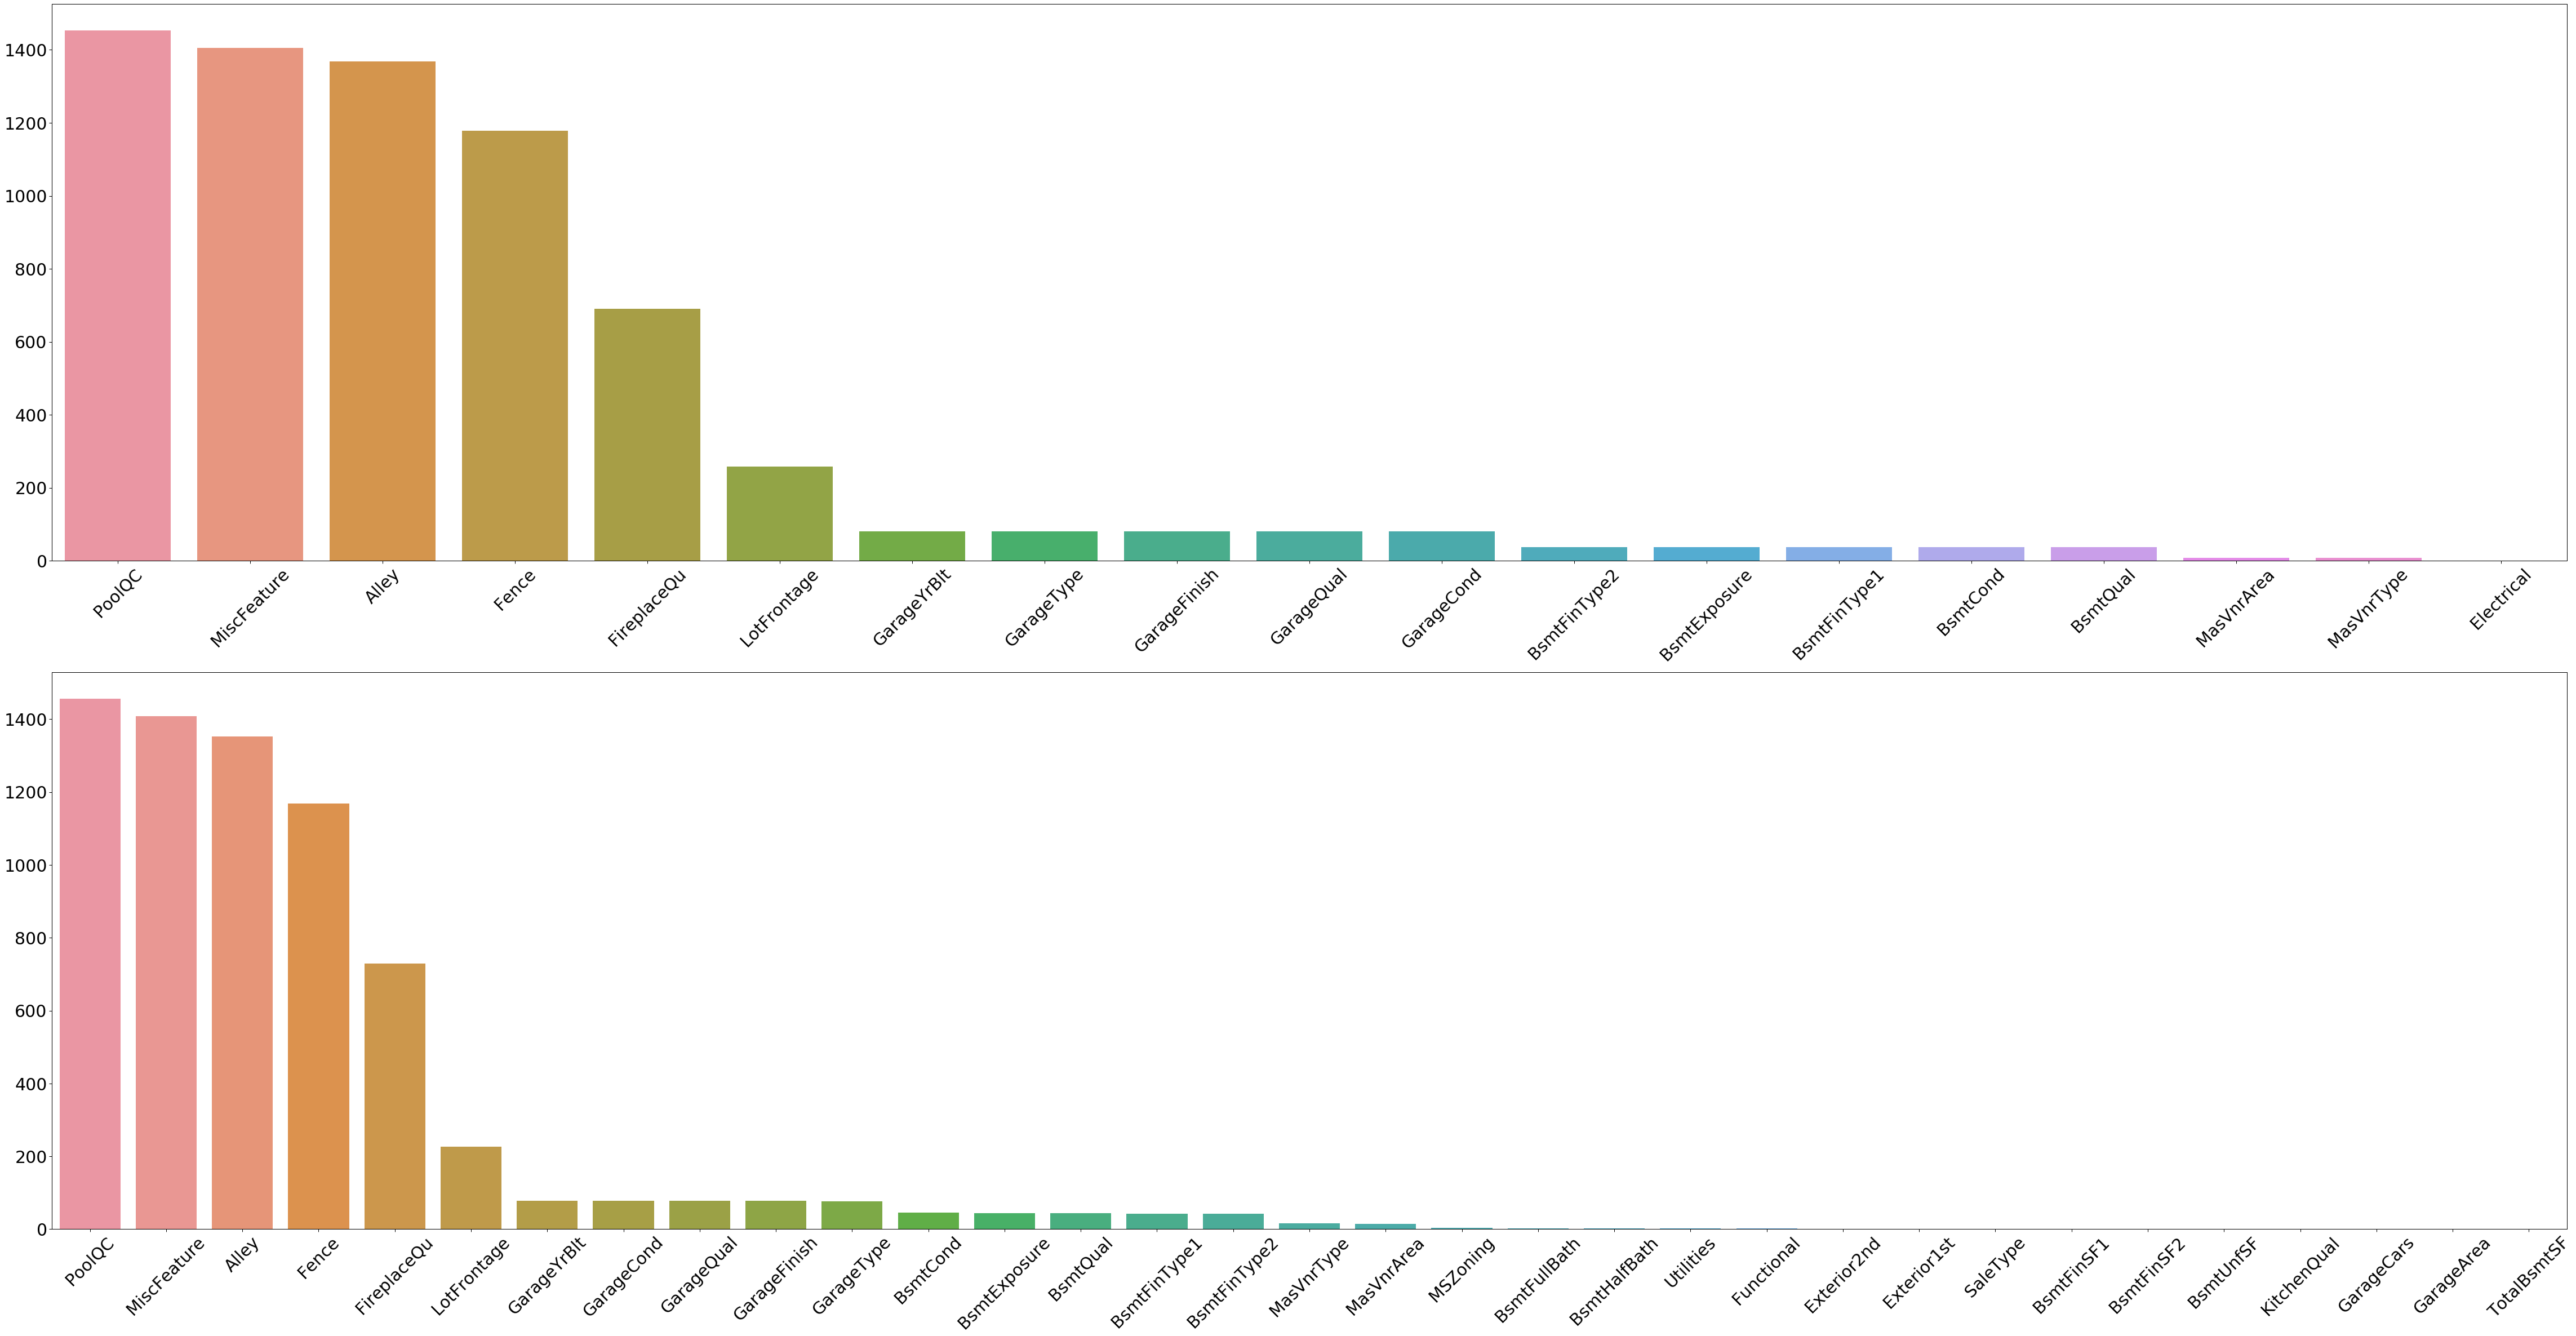

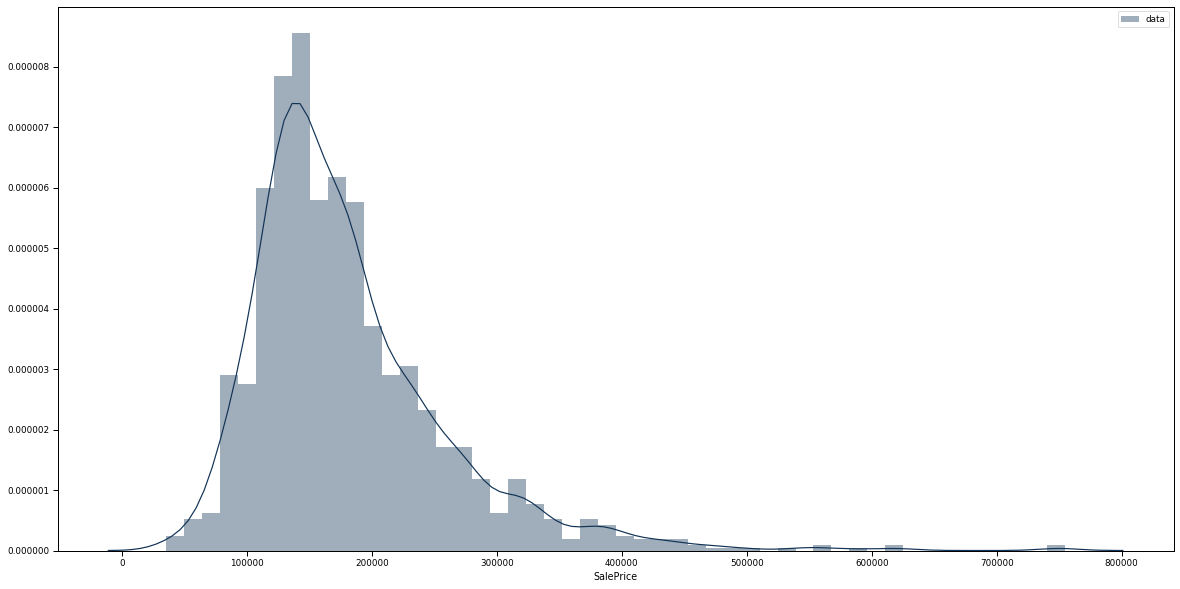

--------------------
Skewness: 1.882876
Kurtosis: 6.536282
--------------------
--------------------
***** Baseline Analysis - Categoral data - valuecount *****
--------------------
*** Train data - MSSubClass
* Absolute value
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
* Ratio
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
--------------------
*** Train data - MSZoning
* Absolute value
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
* Ratio
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning,

--------------------
***** Baseline Analysis - Catagoral correated with Surviv *****
--------------------
SalePrice Correlation by: MSSubClass
    MSSubClass      SalePrice
0           20  185224.811567
1           30   95829.724638
2           40  156125.000000
3           45  108591.666667
4           50  143302.972222
5           60  239948.501672
6           70  166772.416667
7           75  192437.500000
8           80  169736.551724
9           85  147810.000000
10          90  133541.076923
11         120  200779.080460
12         160  138647.380952
13         180  102300.000000
14         190  129613.333333
SalePrice Correlation by: MSZoning
  MSZoning      SalePrice
0  C (all)   74528.000000
1       FV  214014.061538
2       RH  131558.375000
3       RL  191004.994787
4       RM  126316.830275
SalePrice Correlation by: Street
  Street      SalePrice
0   Grvl  130190.500000
1   Pave  181130.538514
SalePrice Correlation by: Alley
  Alley      SalePrice
0  Grvl  122219.080000
1  

SalePrice Correlation by: Electrical
  Electrical      SalePrice
0      FuseA  122196.893617
1      FuseF  107675.444444
2      FuseP   97333.333333
3        Mix   67000.000000
4      SBrkr  186825.113193
SalePrice Correlation by: BsmtFullBath
   BsmtFullBath      SalePrice
0             0  165521.640187
1             1  202522.918367
2             2  213063.066667
3             3  179000.000000
SalePrice Correlation by: BsmtHalfBath
   BsmtHalfBath      SalePrice
0             0  181230.330189
1             1  176098.125000
2             2  160850.500000
SalePrice Correlation by: FullBath
   FullBath      SalePrice
0         0  165200.888889
1         1  134751.440000
2         2  213009.825521
3         3  347822.909091
SalePrice Correlation by: HalfBath
   HalfBath      SalePrice
0         0  162534.884995
1         1  212721.960748
2         2  162028.916667
SalePrice Correlation by: BedroomAbvGr
   BedroomAbvGr      SalePrice
0             0  221493.166667
1             1  173162.

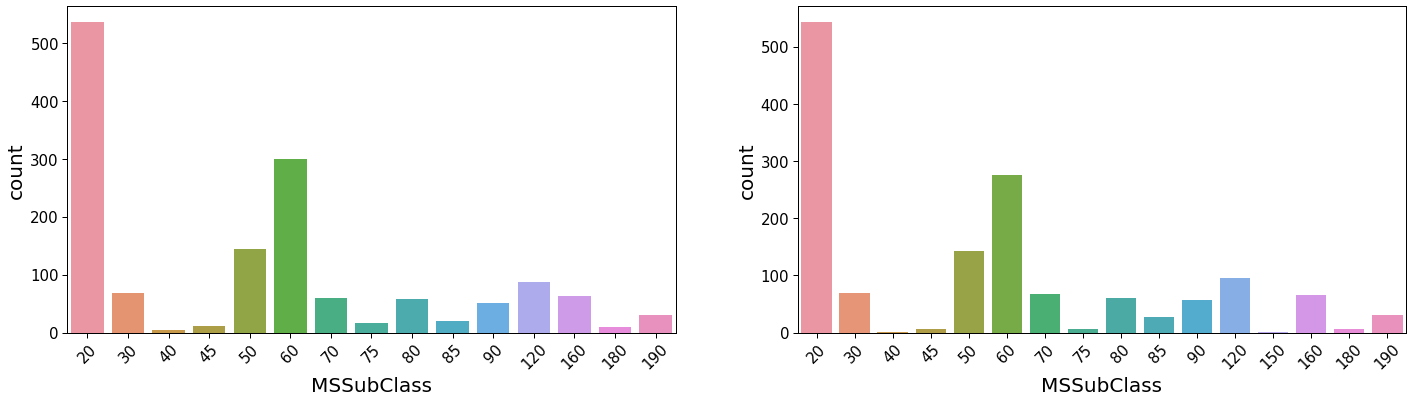

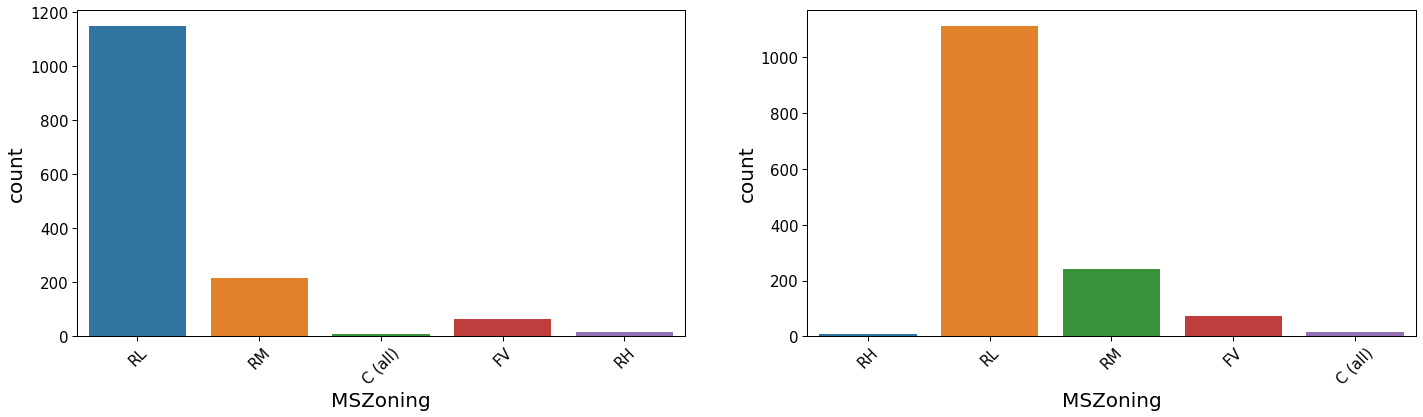

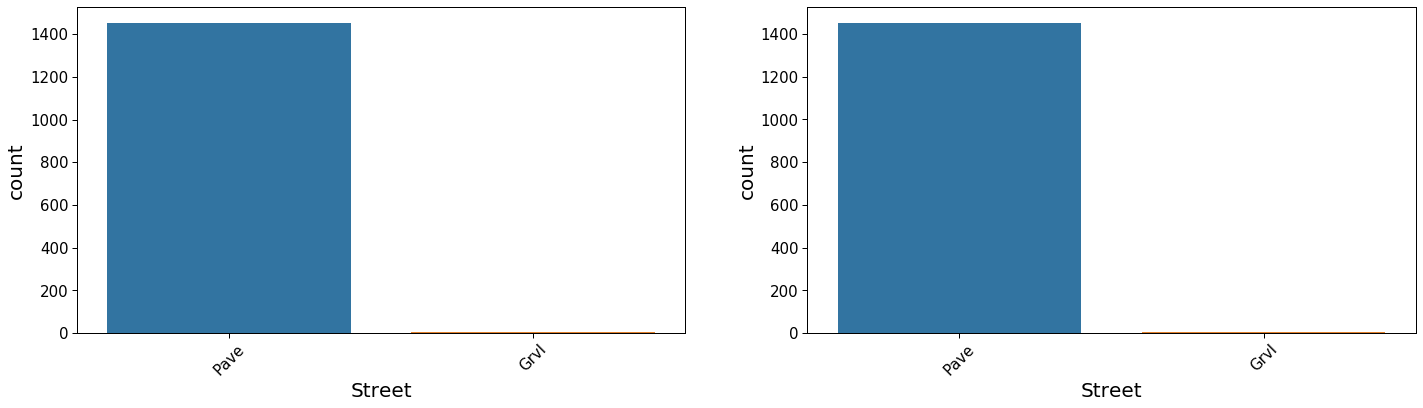

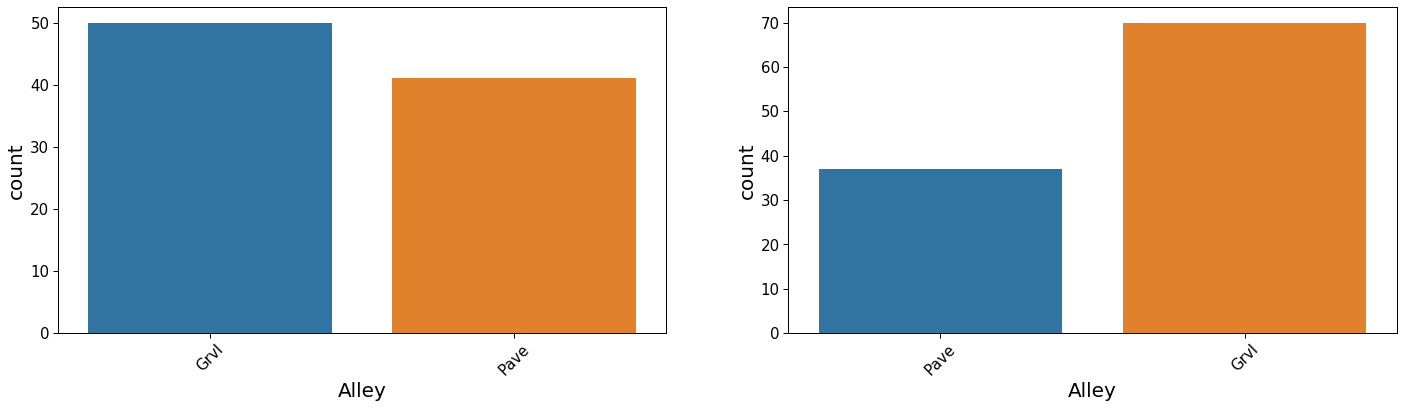

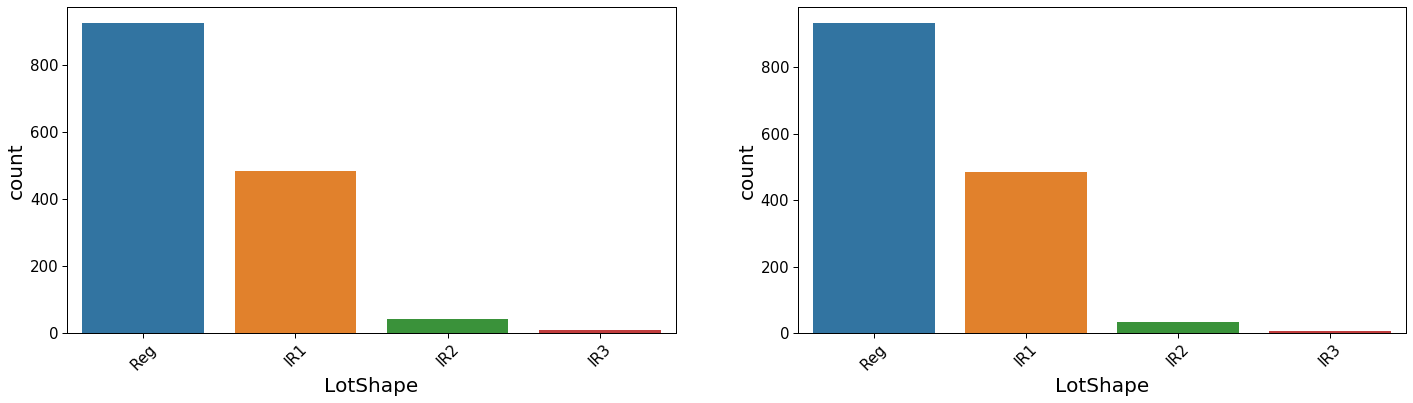

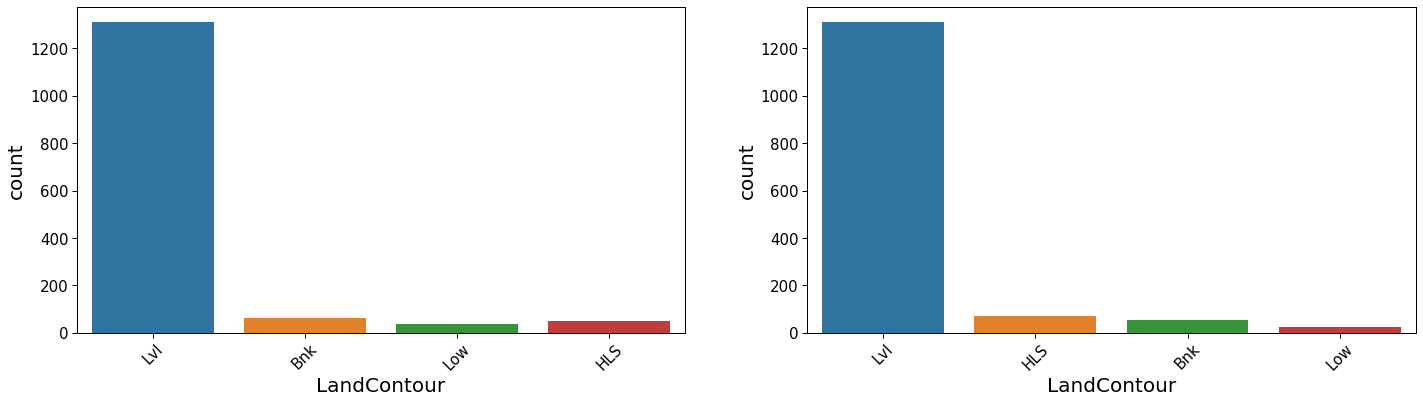

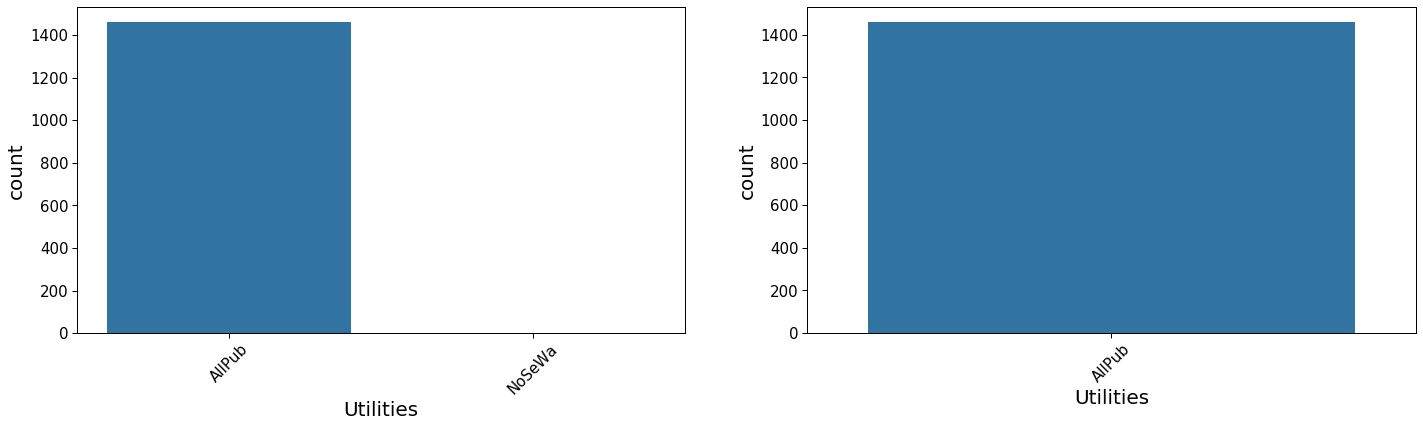

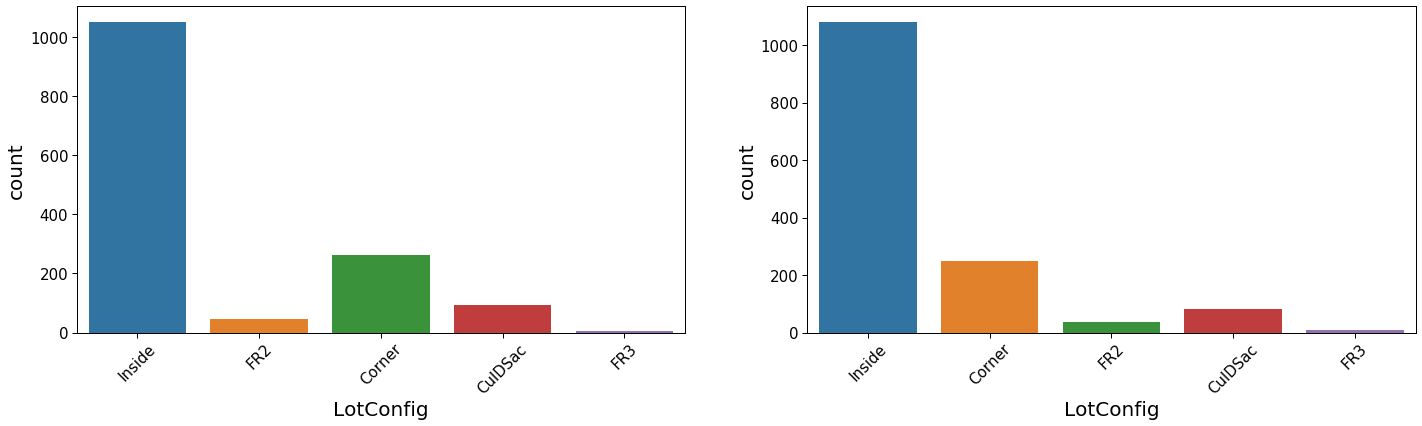

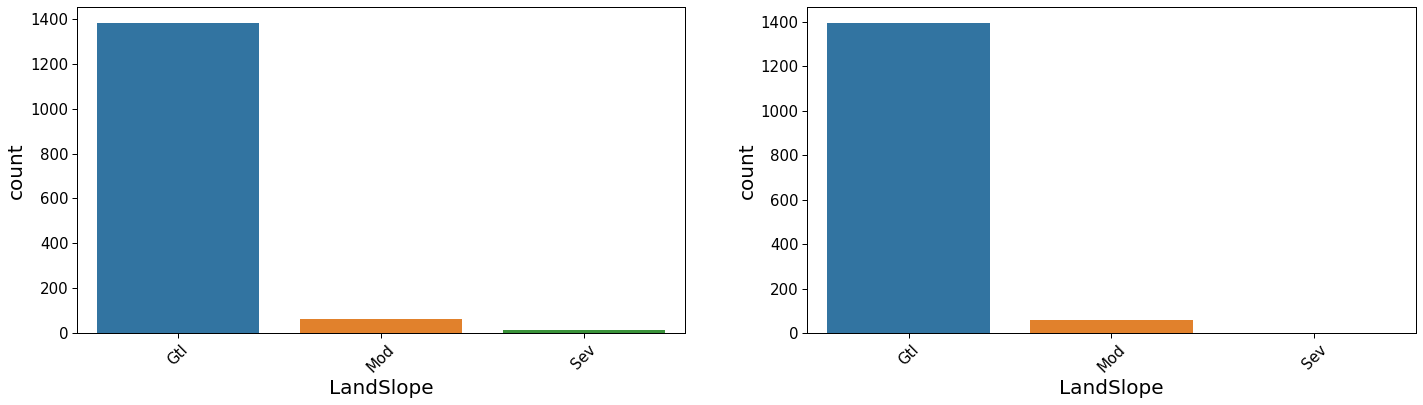

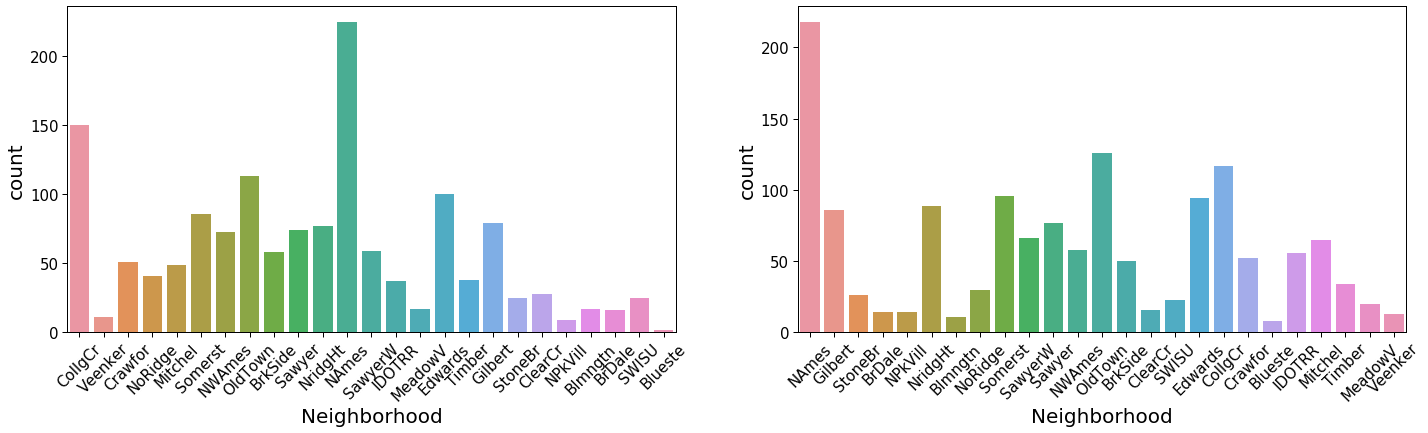

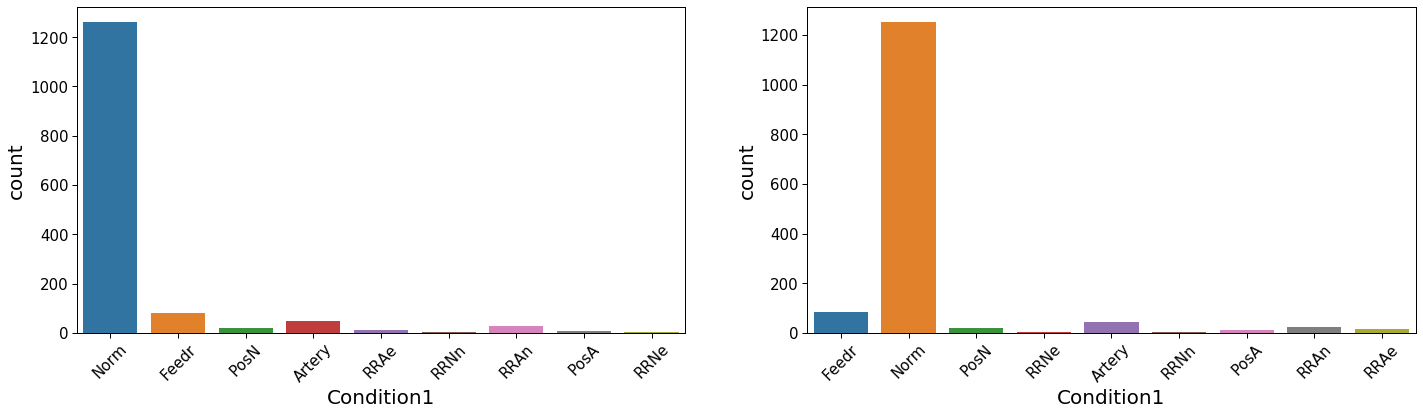

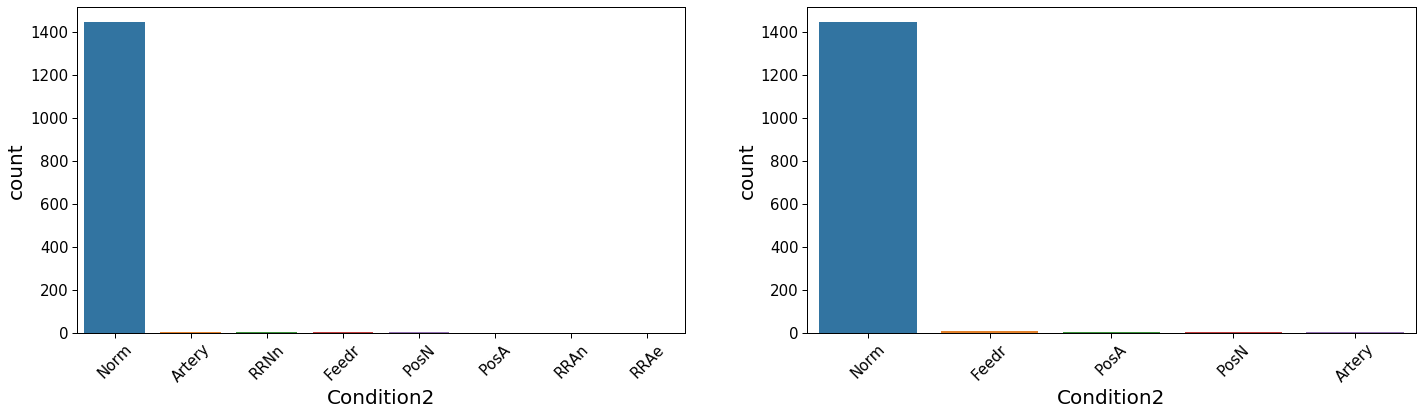

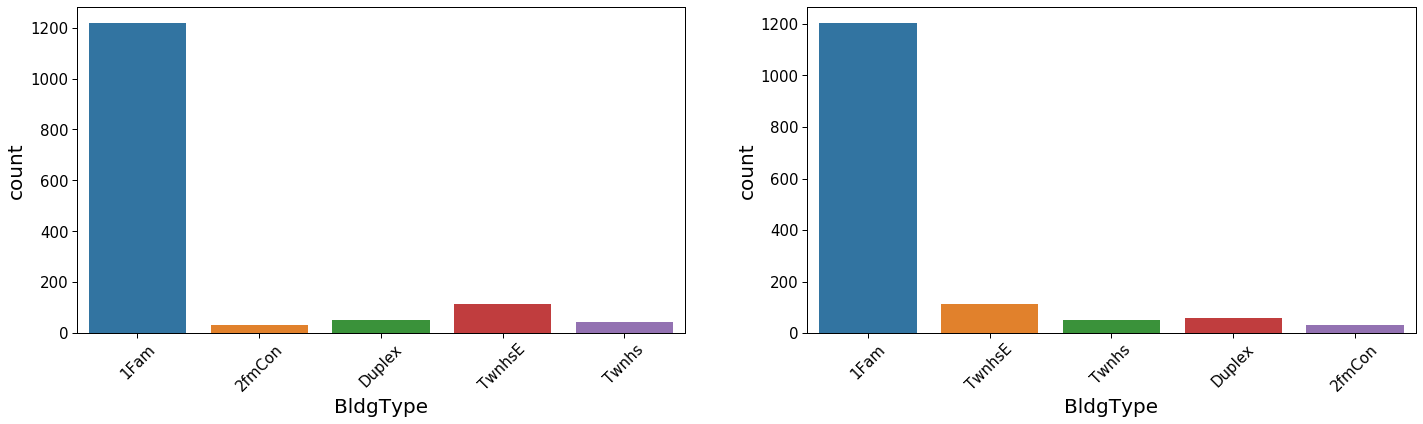

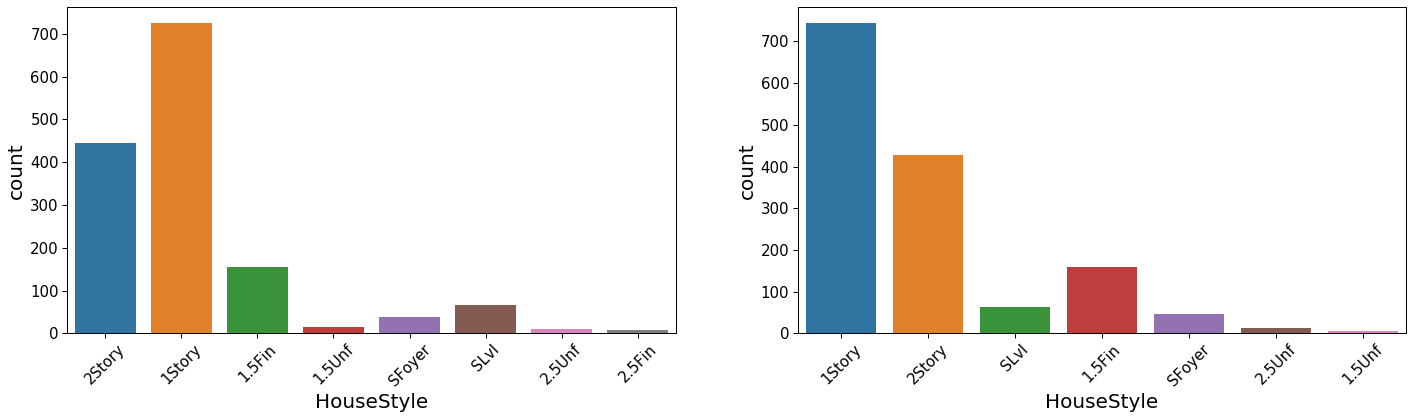

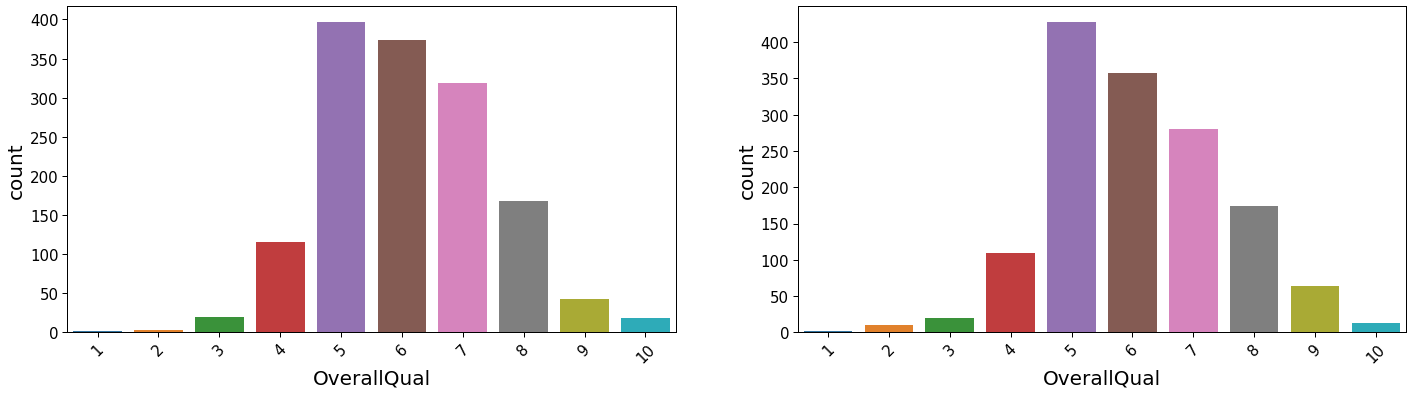

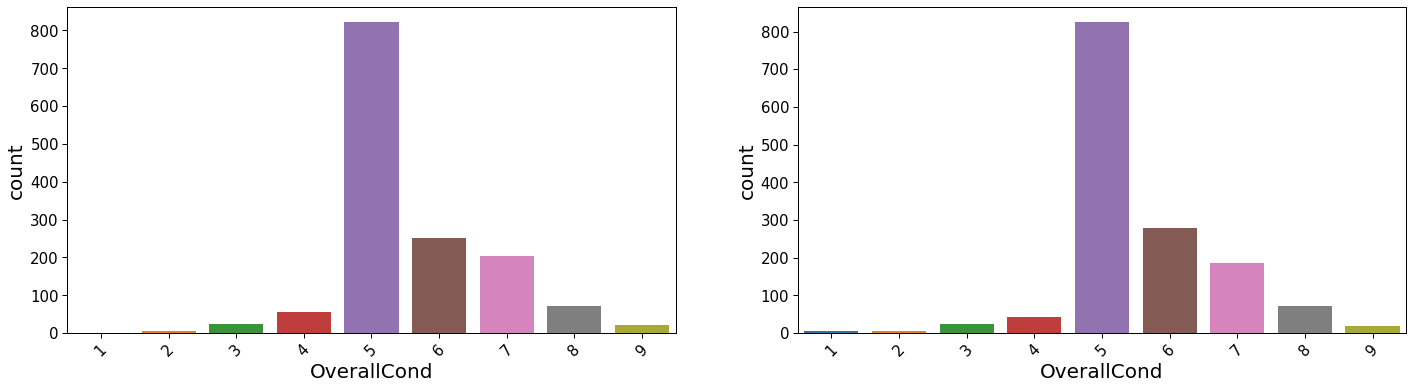

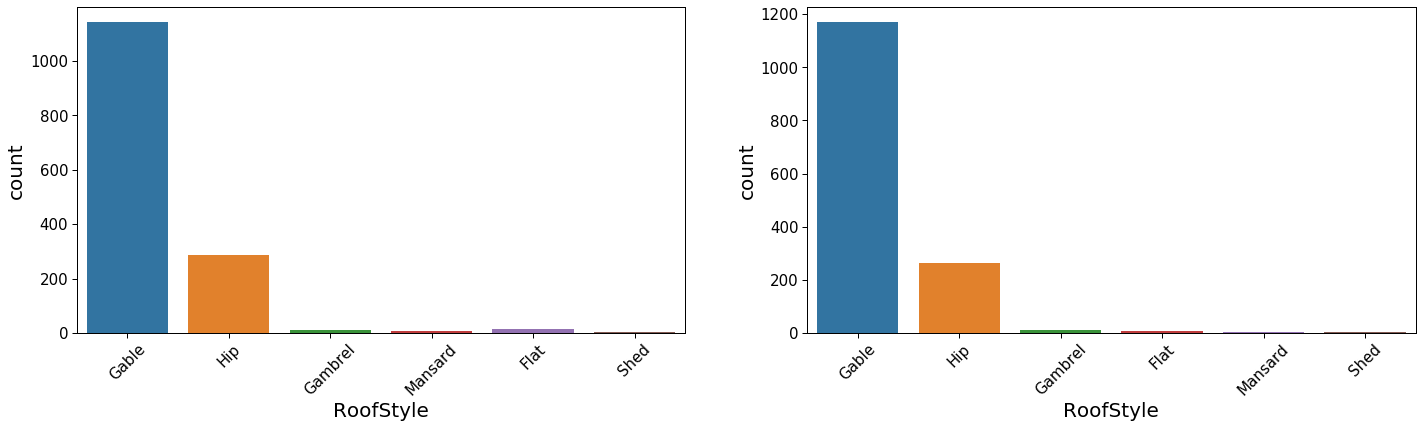

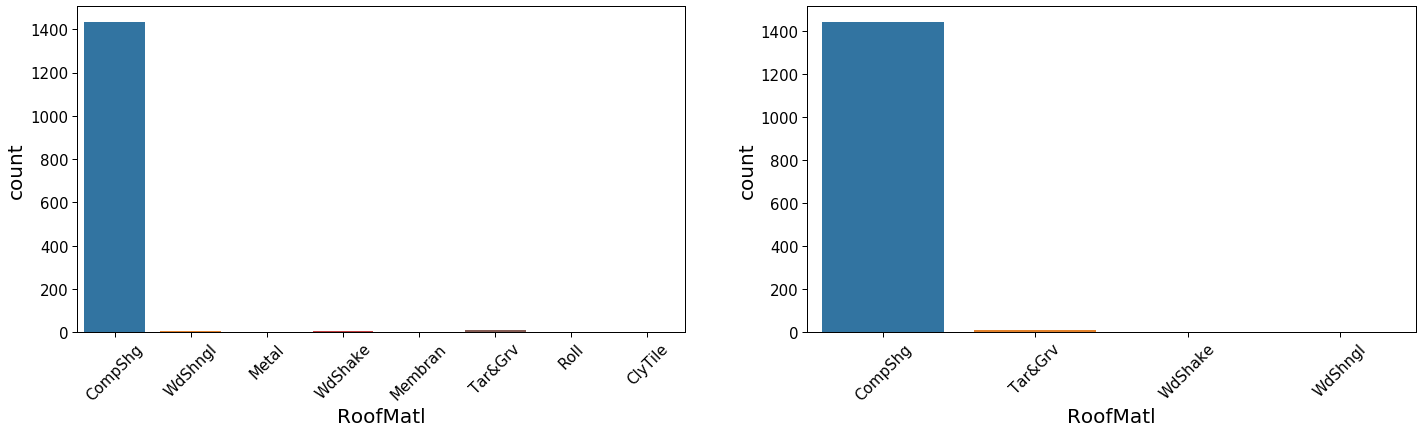

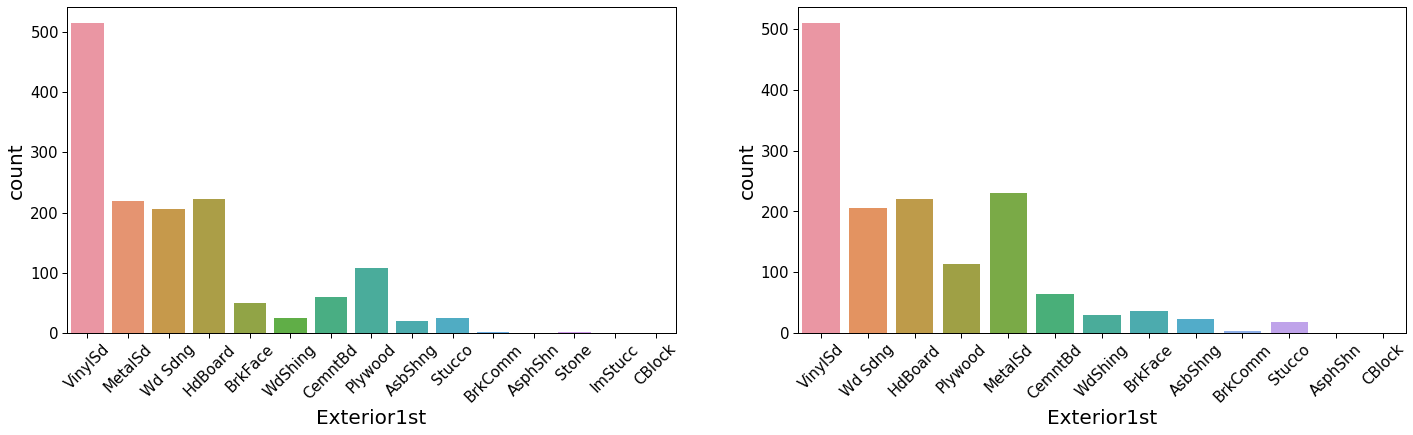

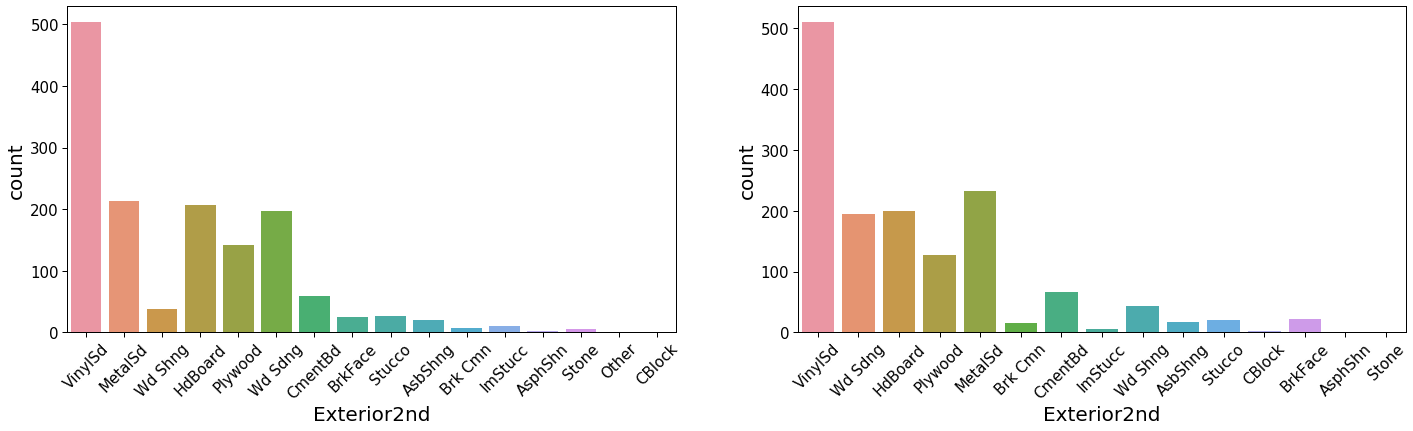

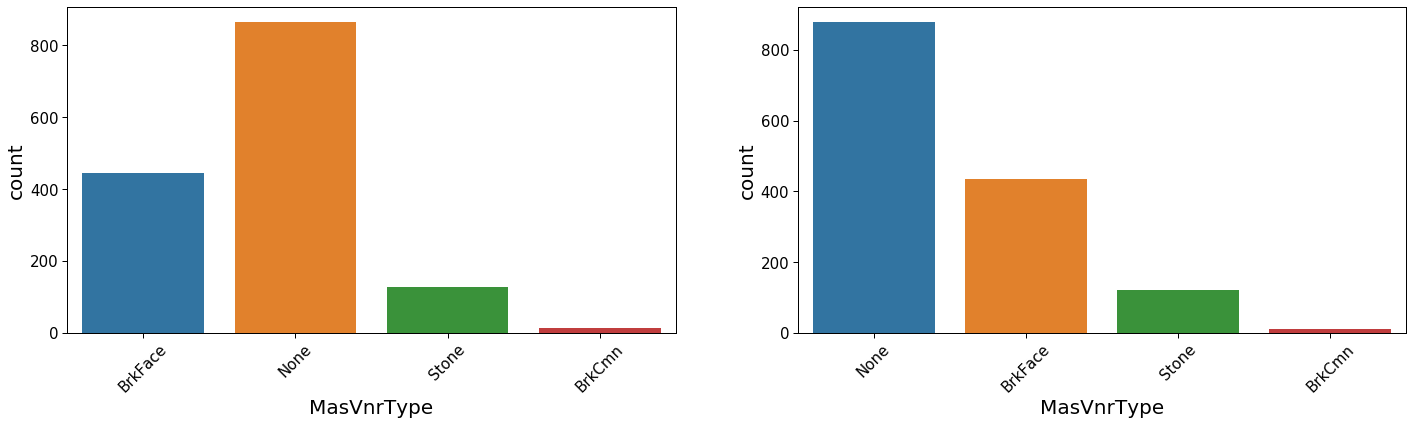

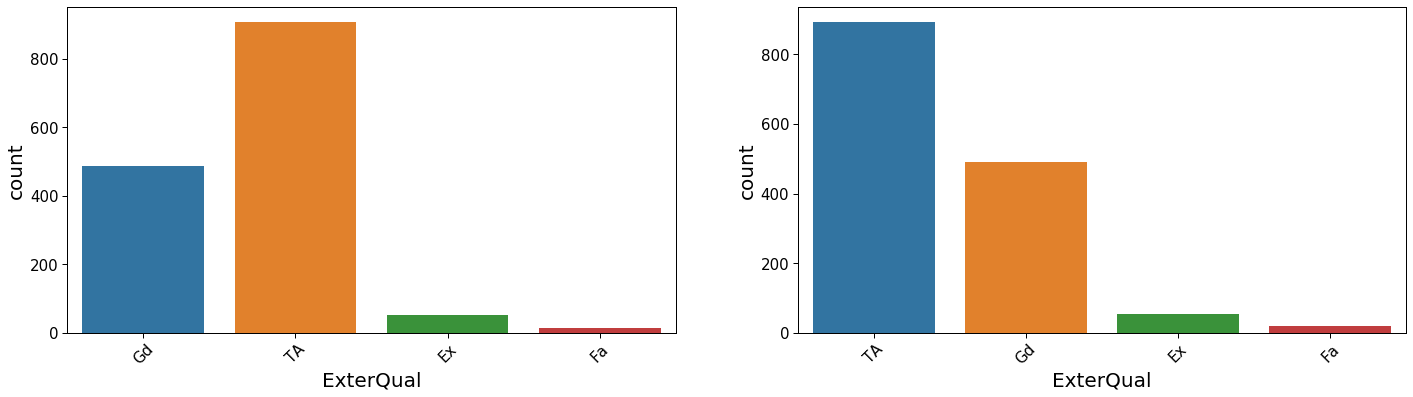

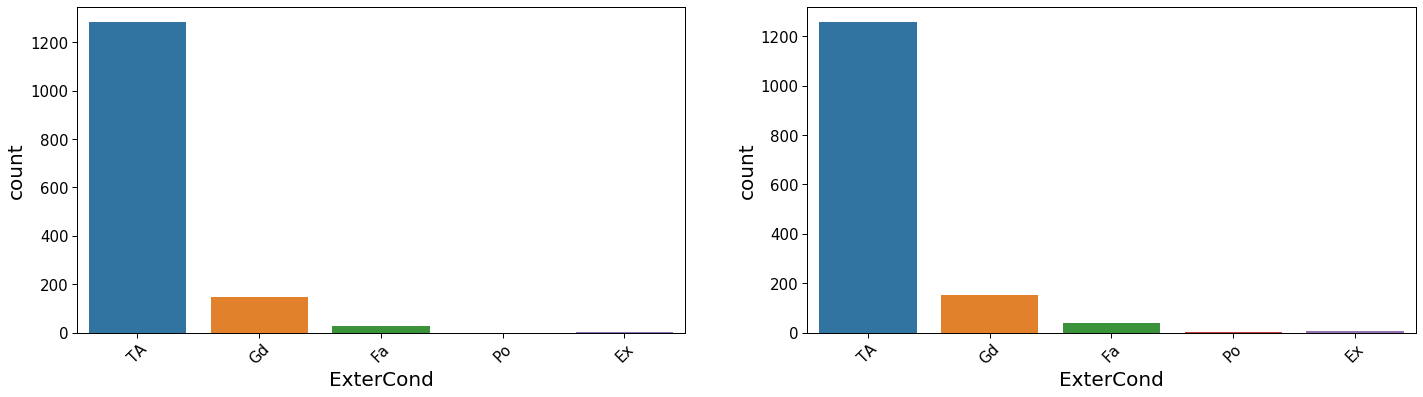

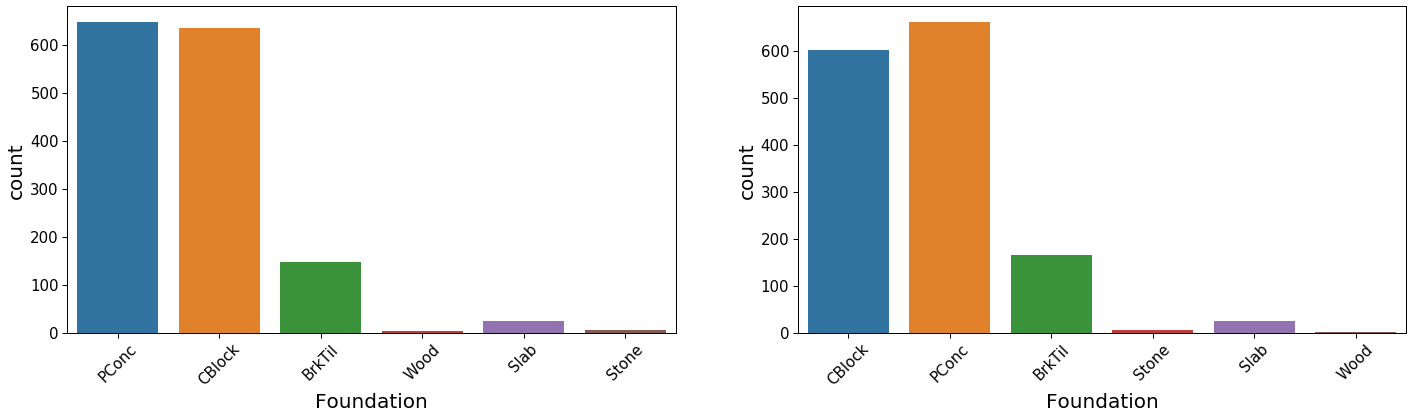

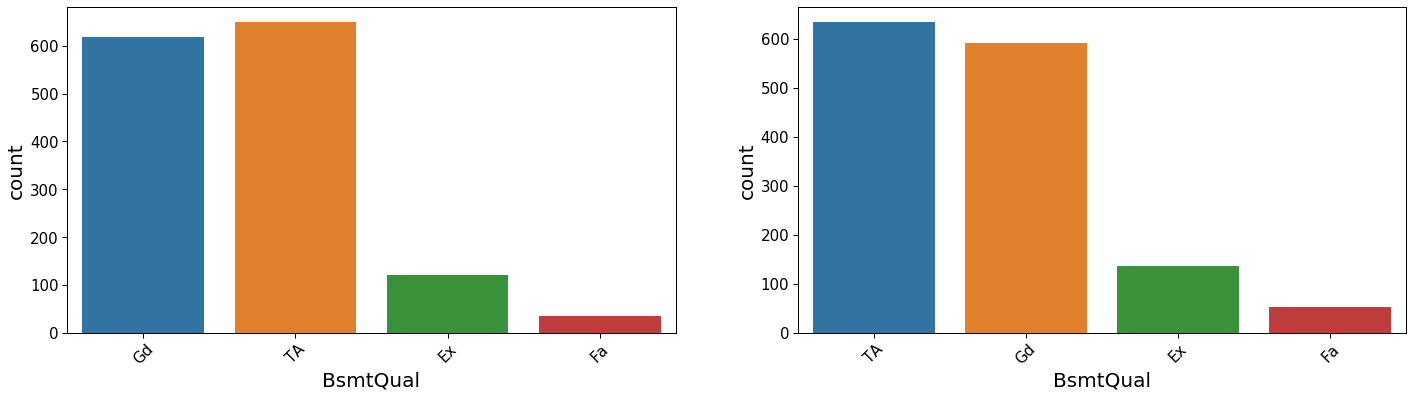

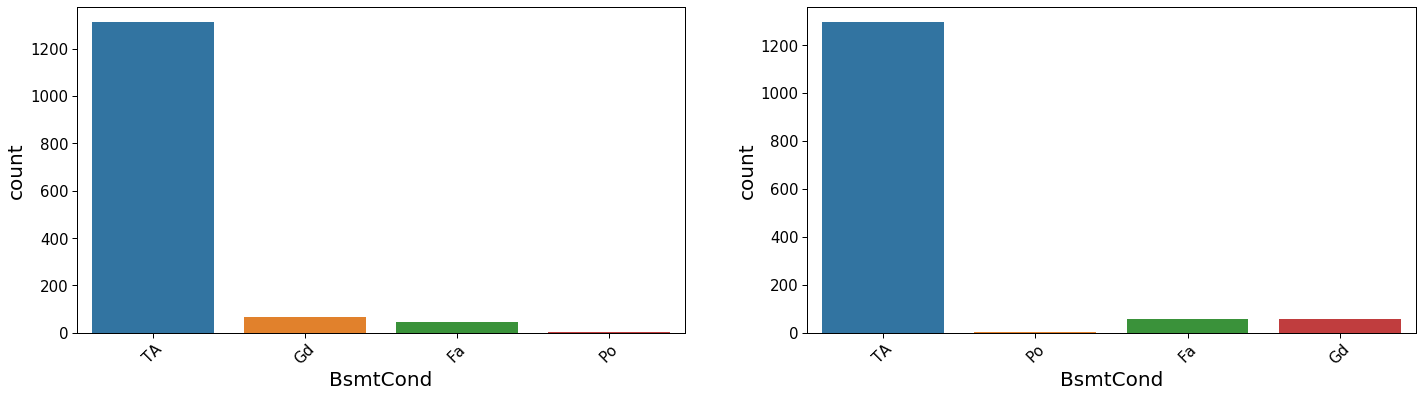

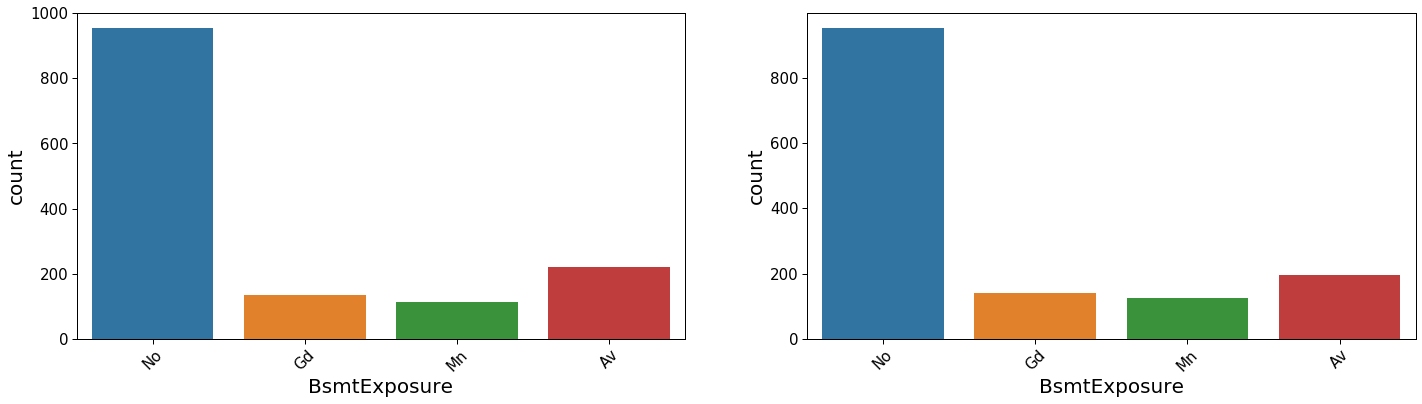

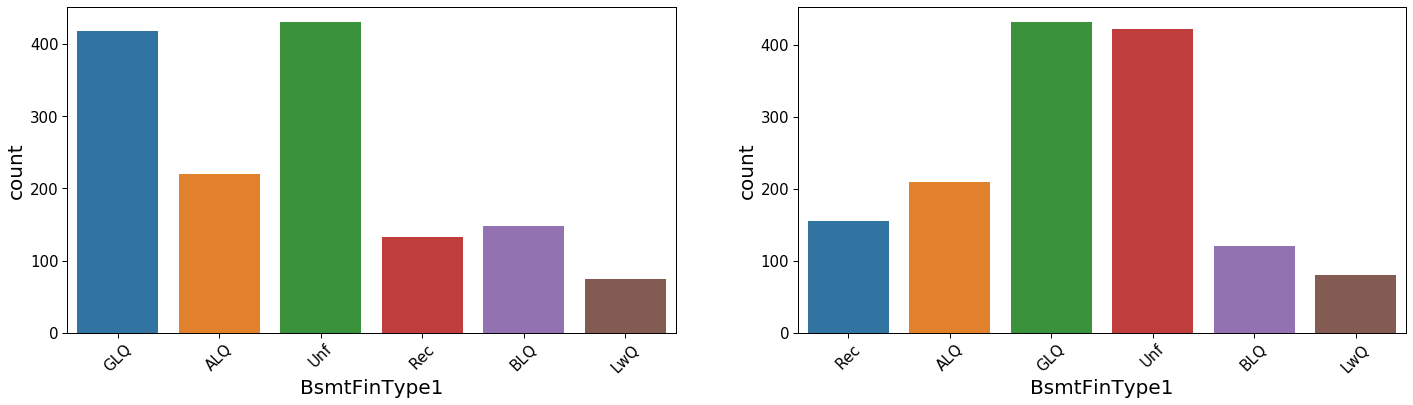

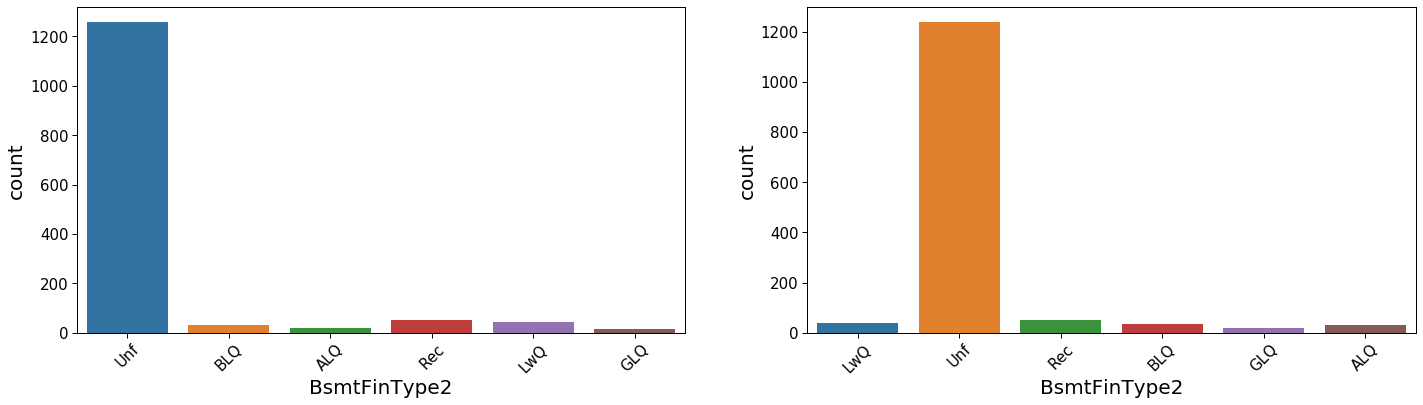

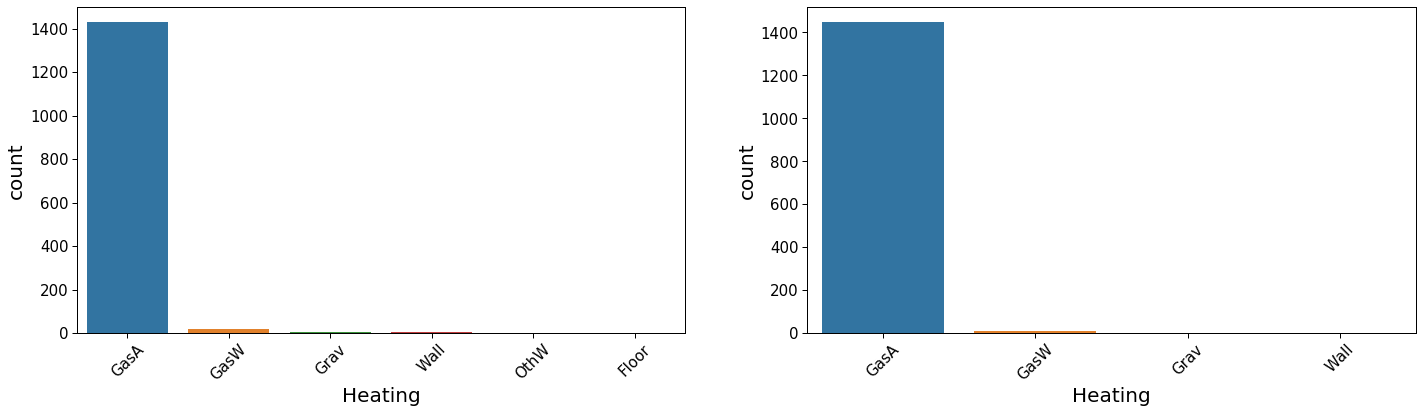

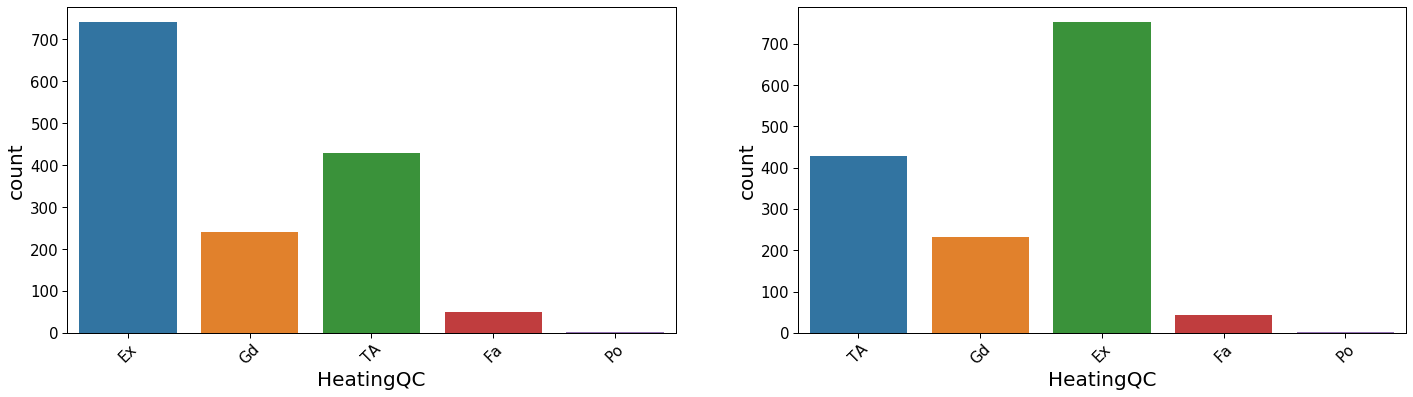

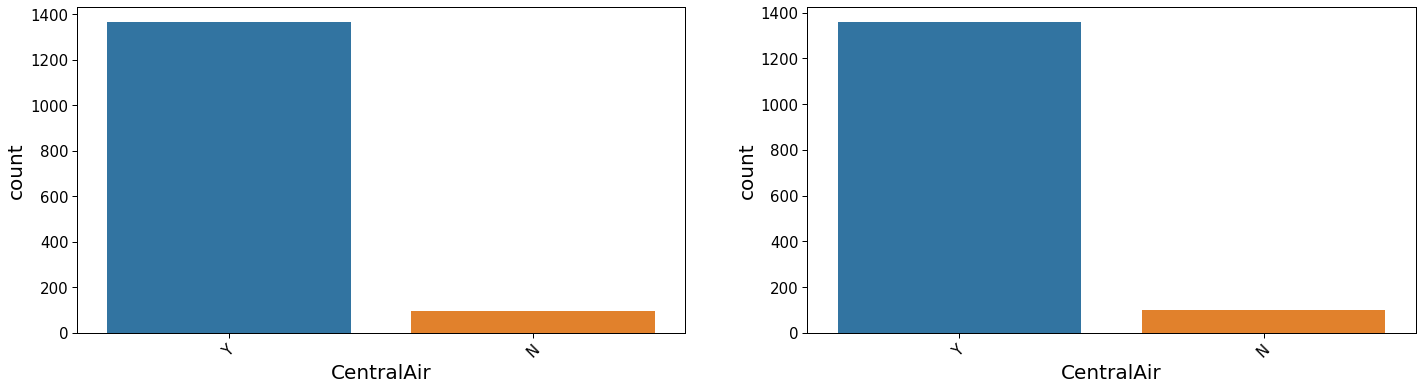

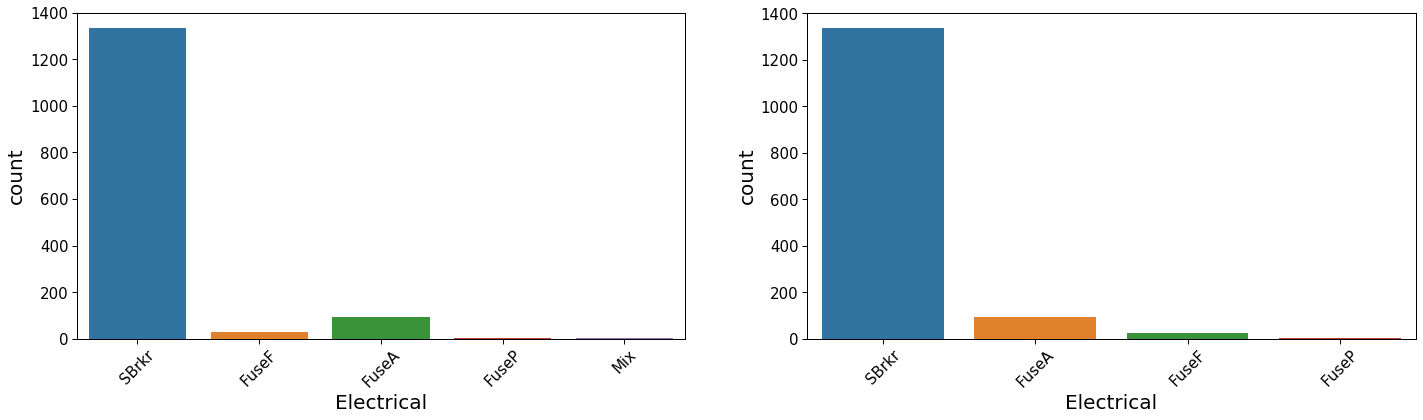

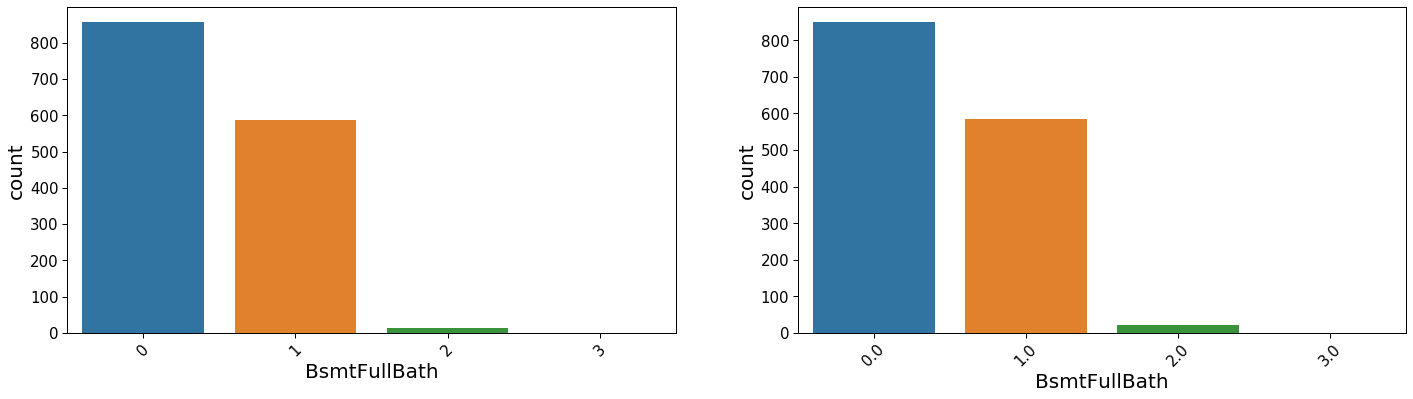

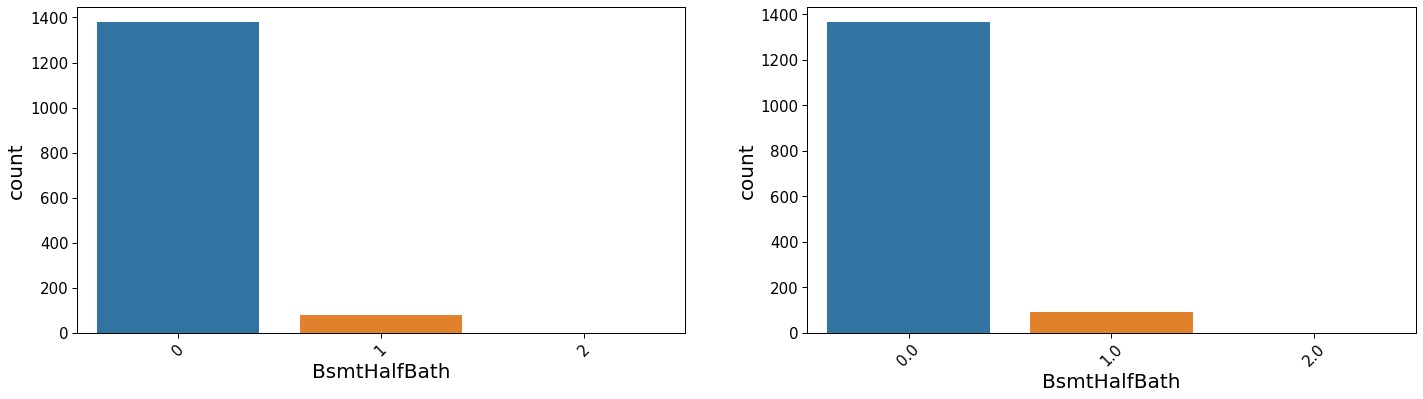

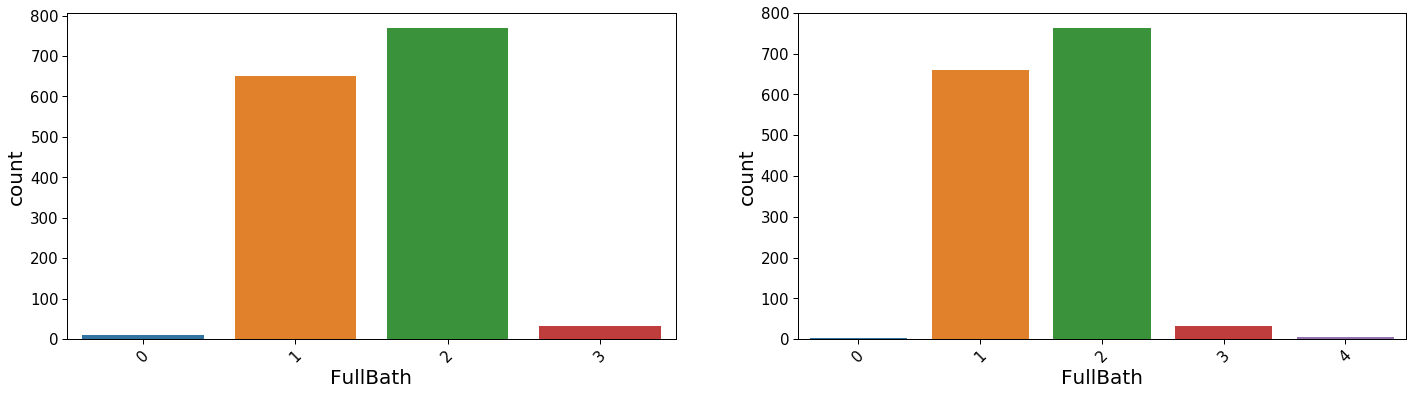

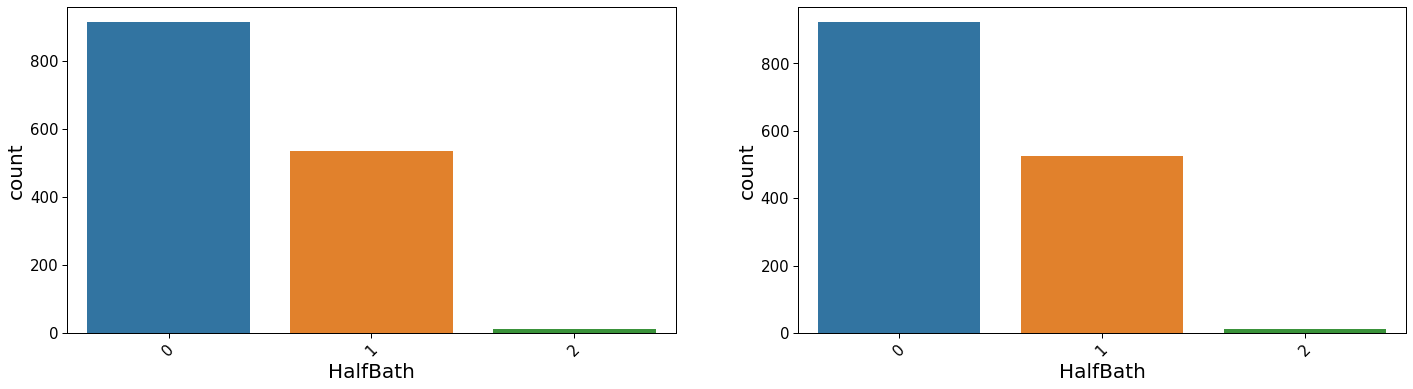

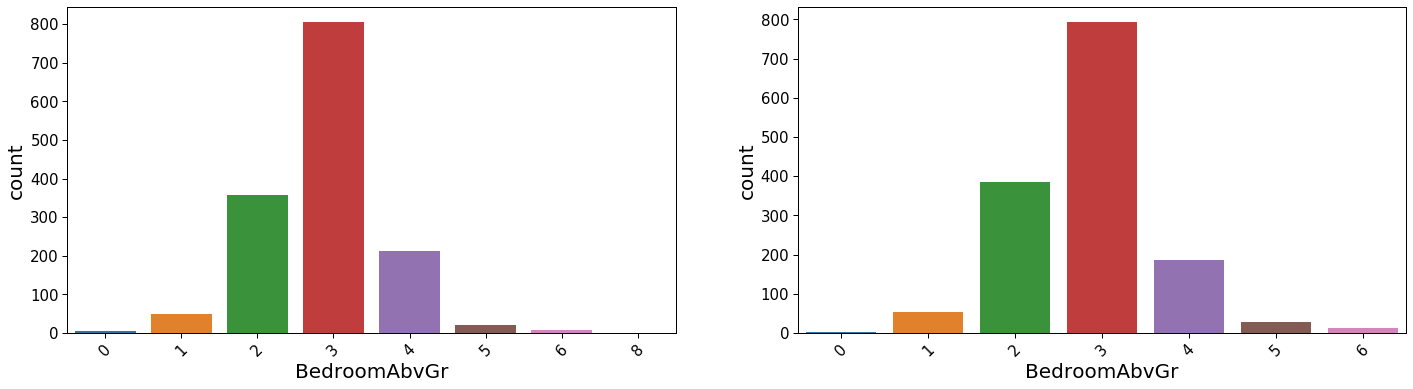

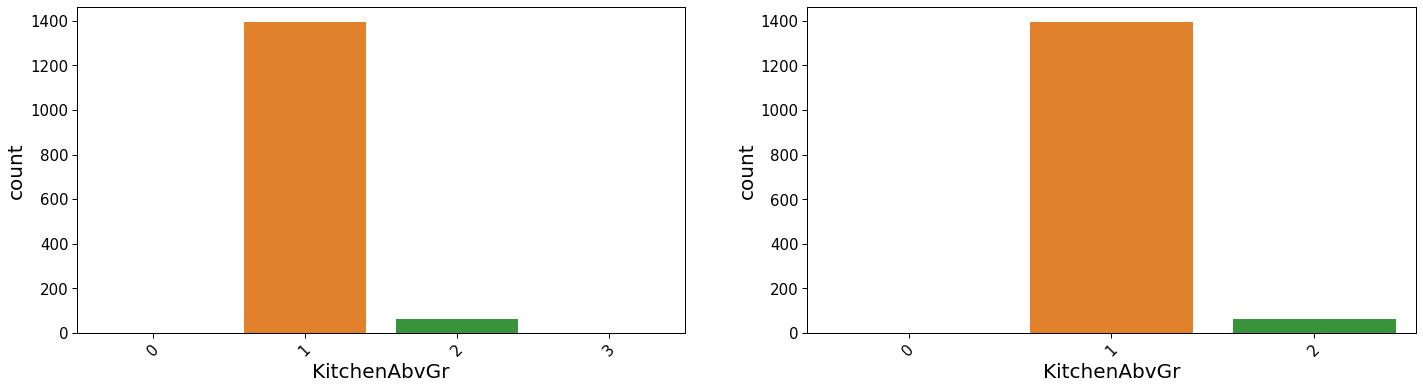

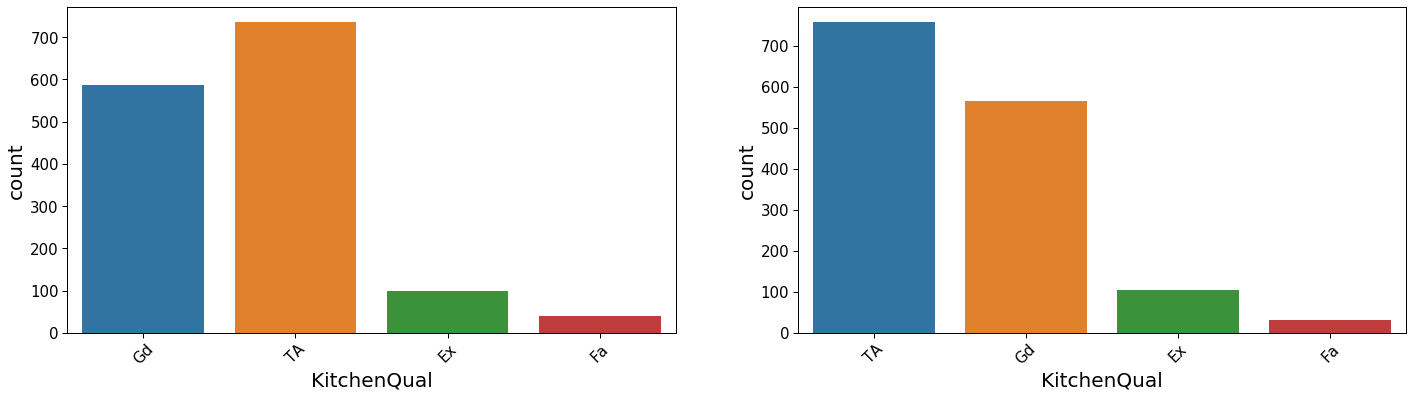

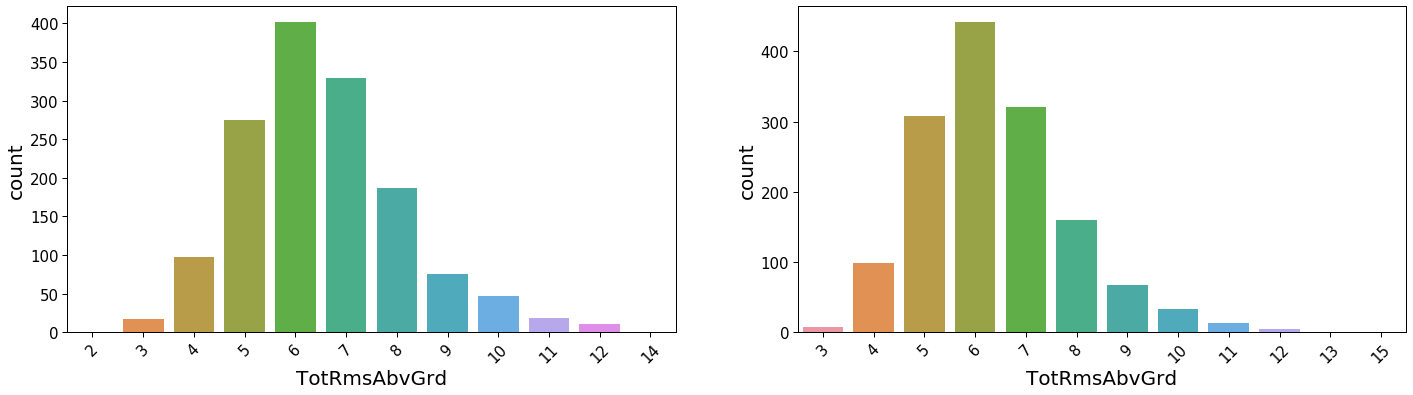

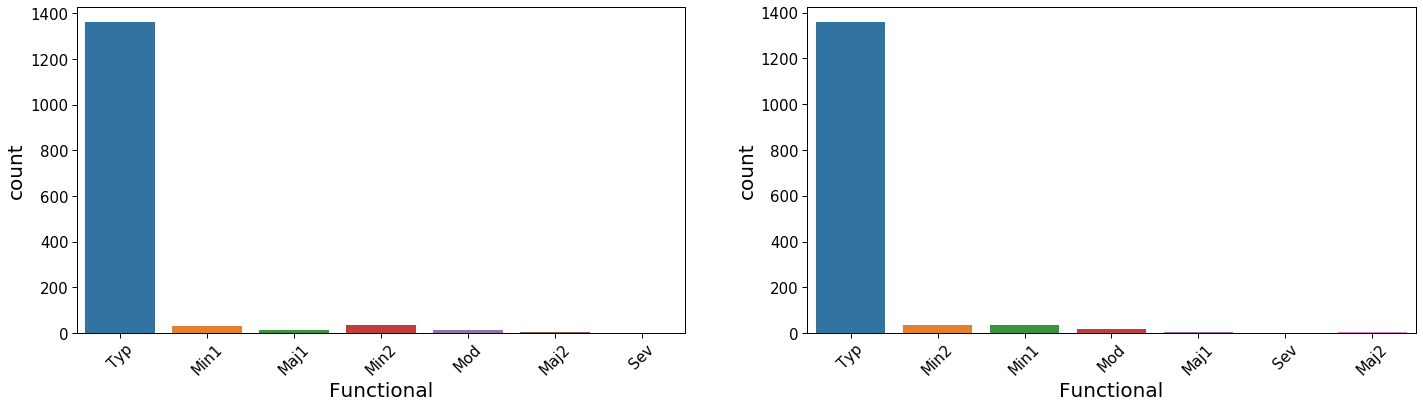

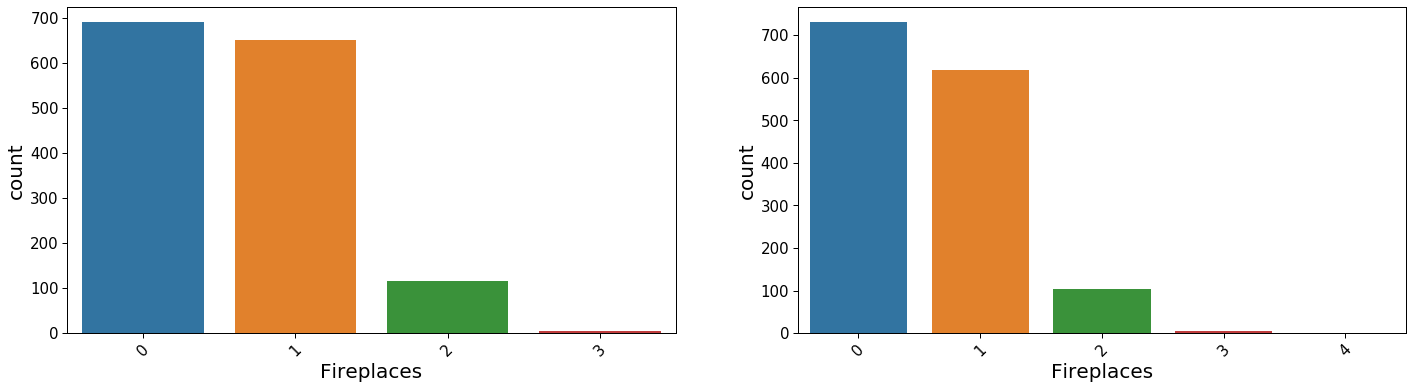

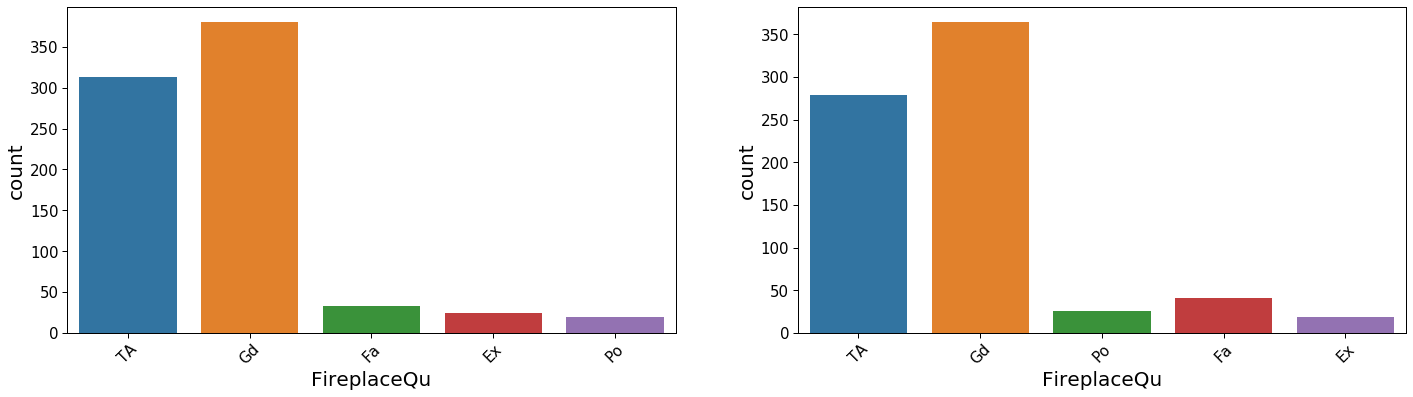

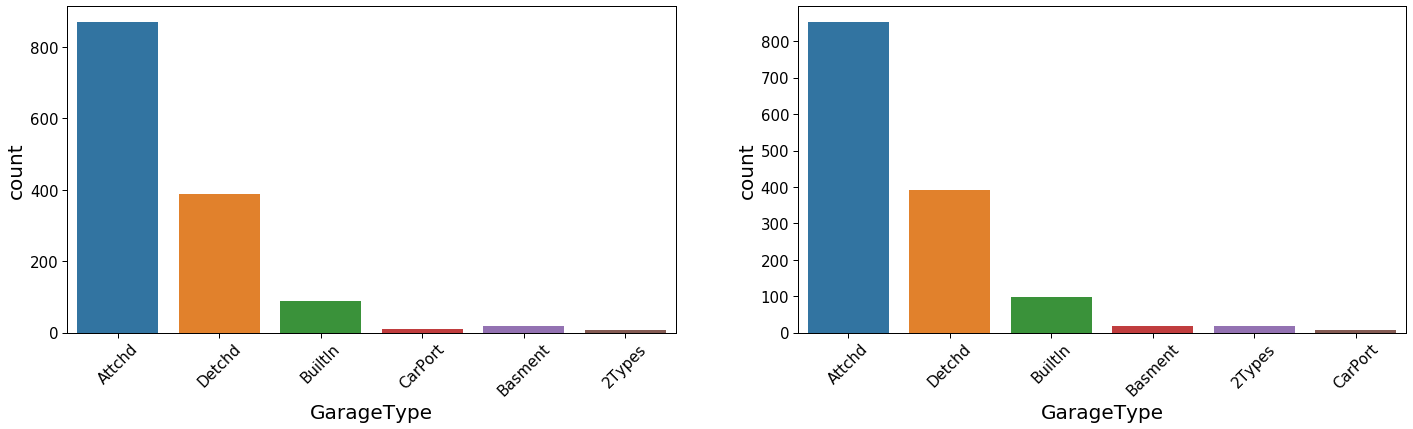

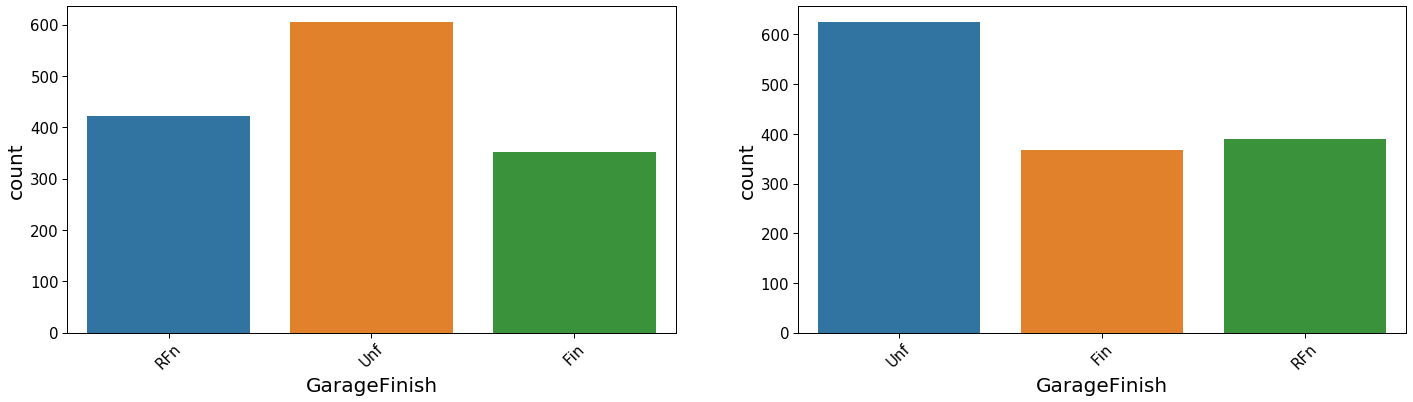

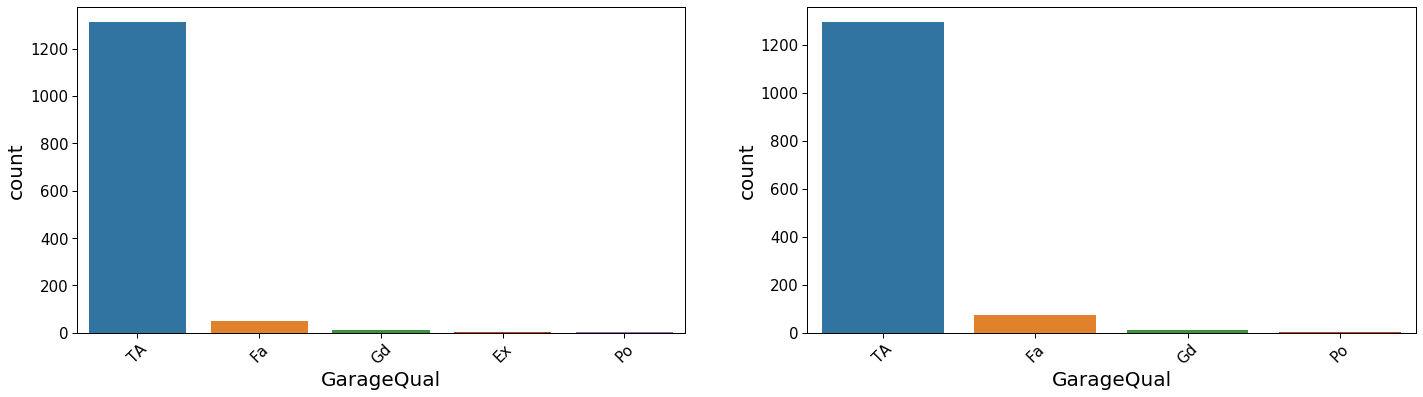

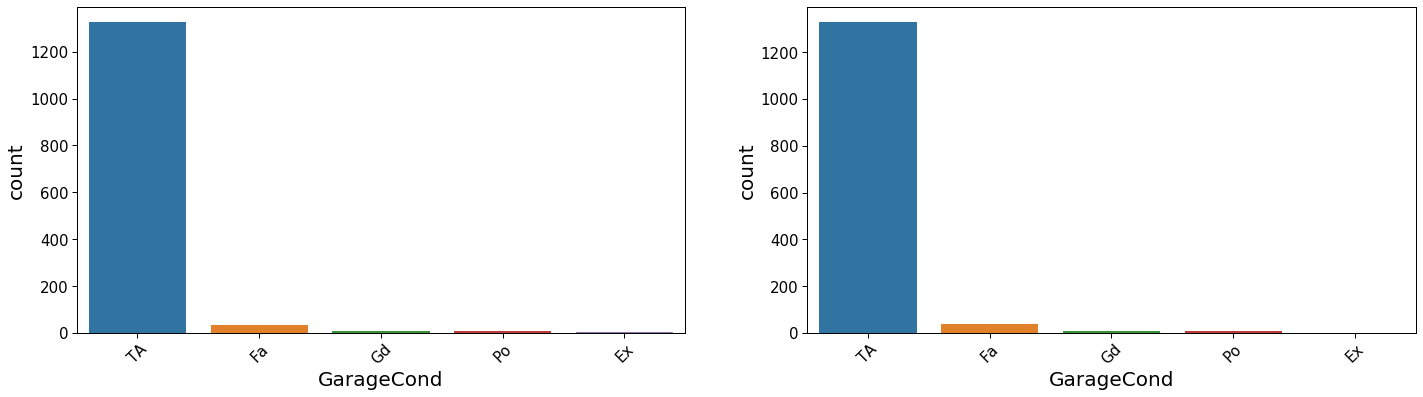

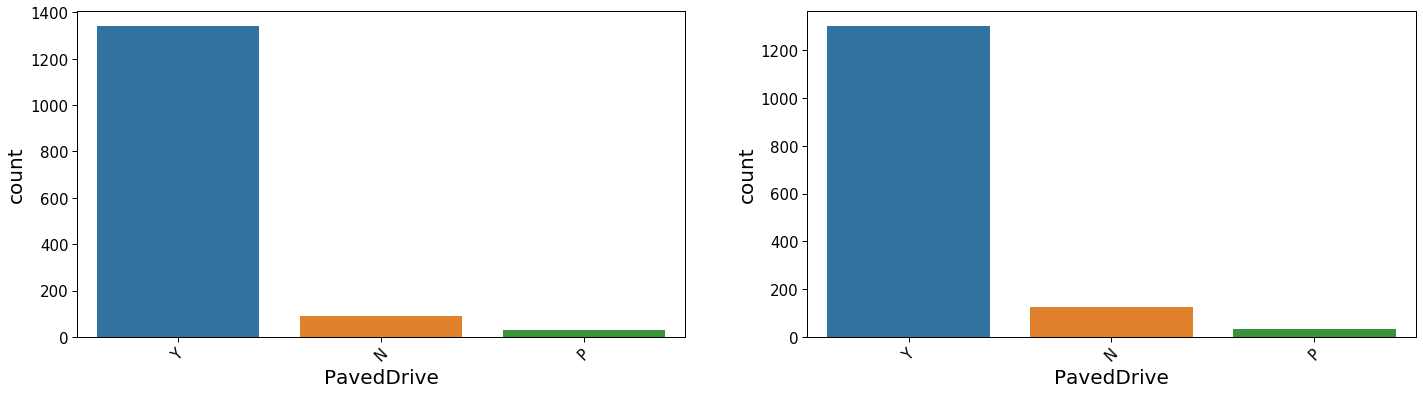

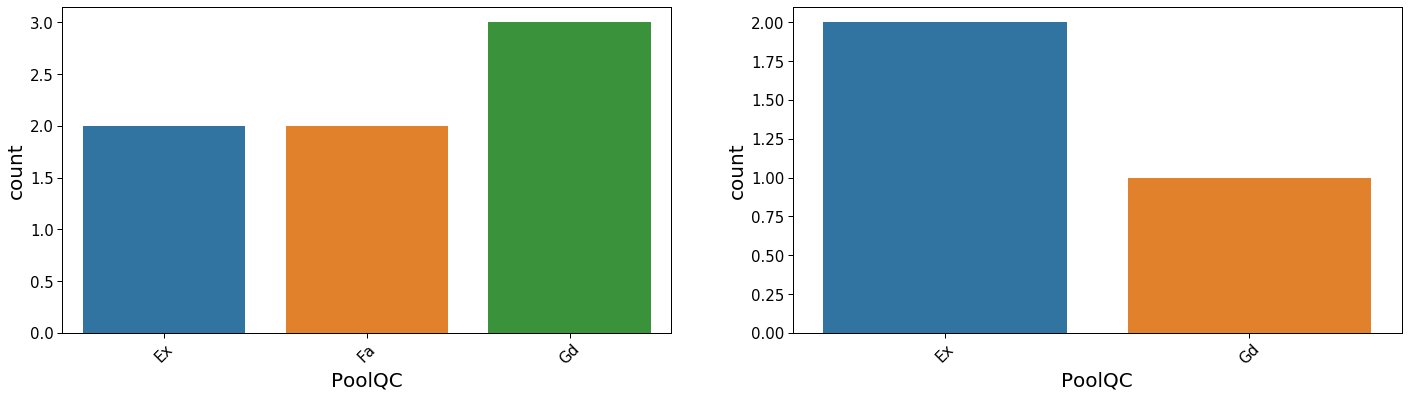

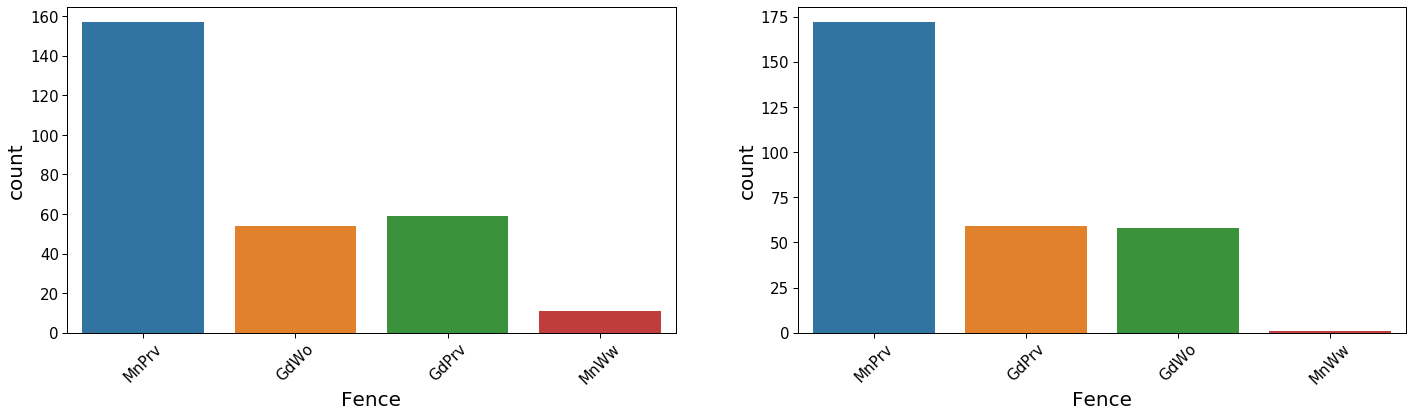

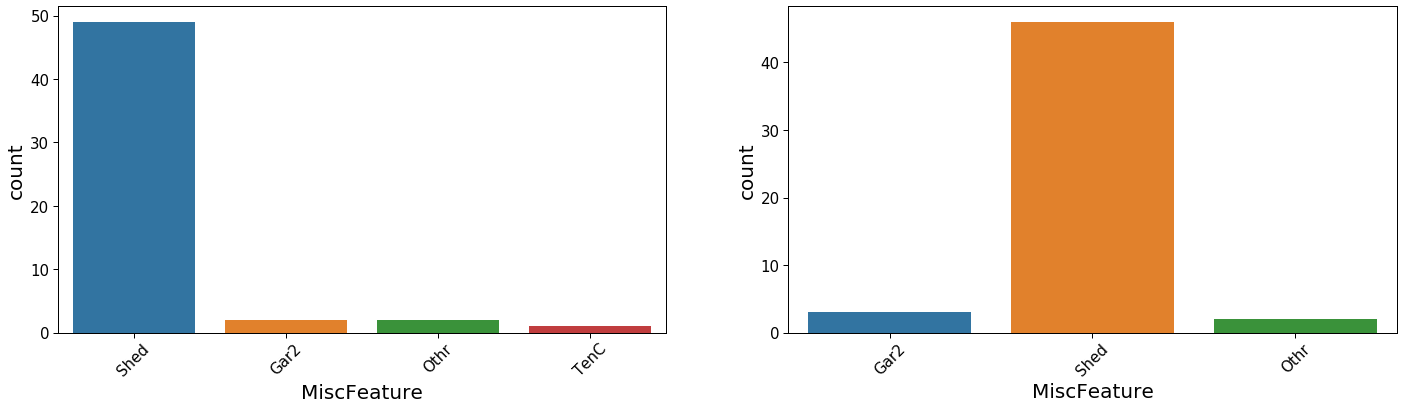

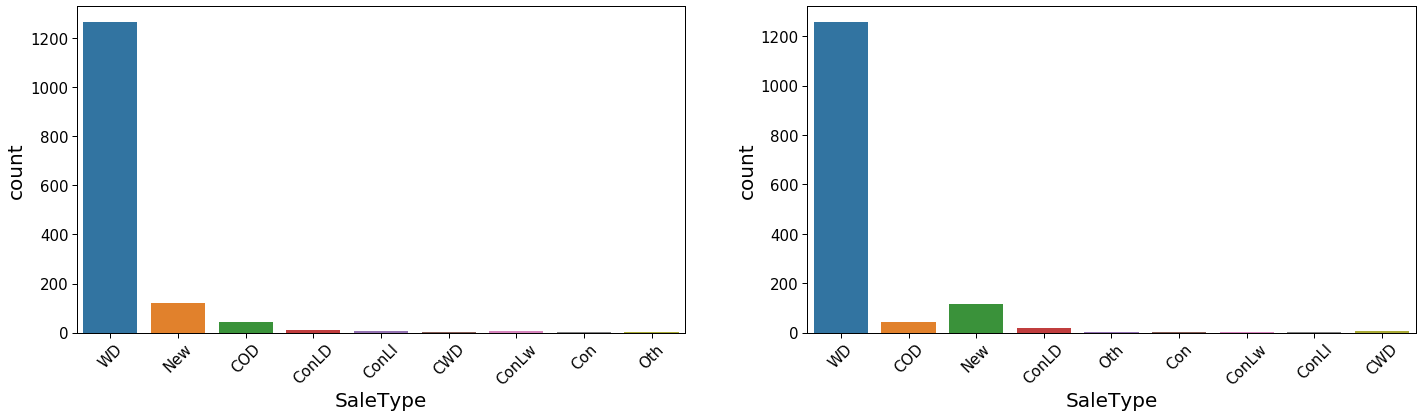

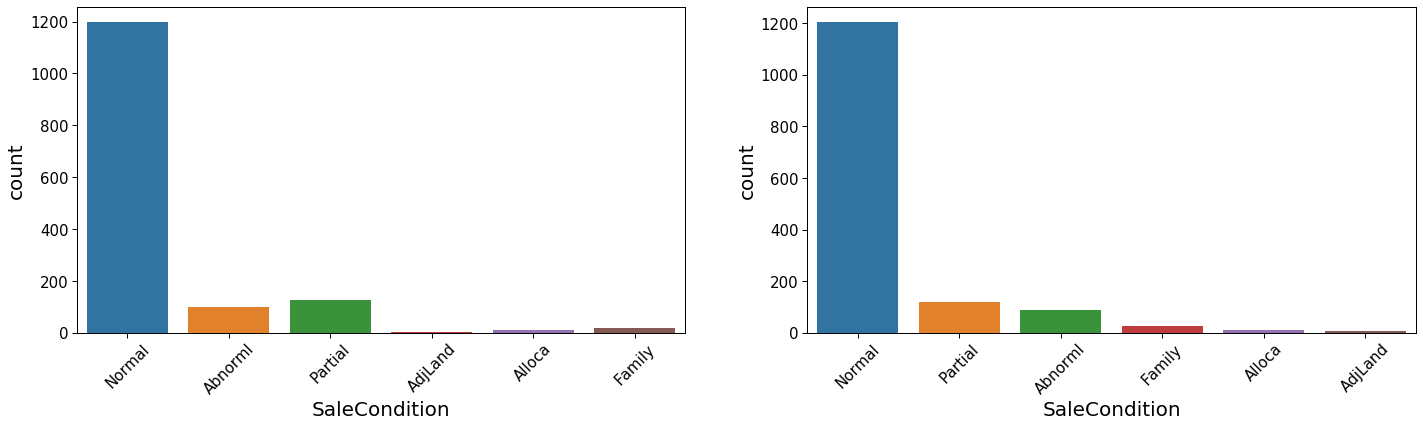

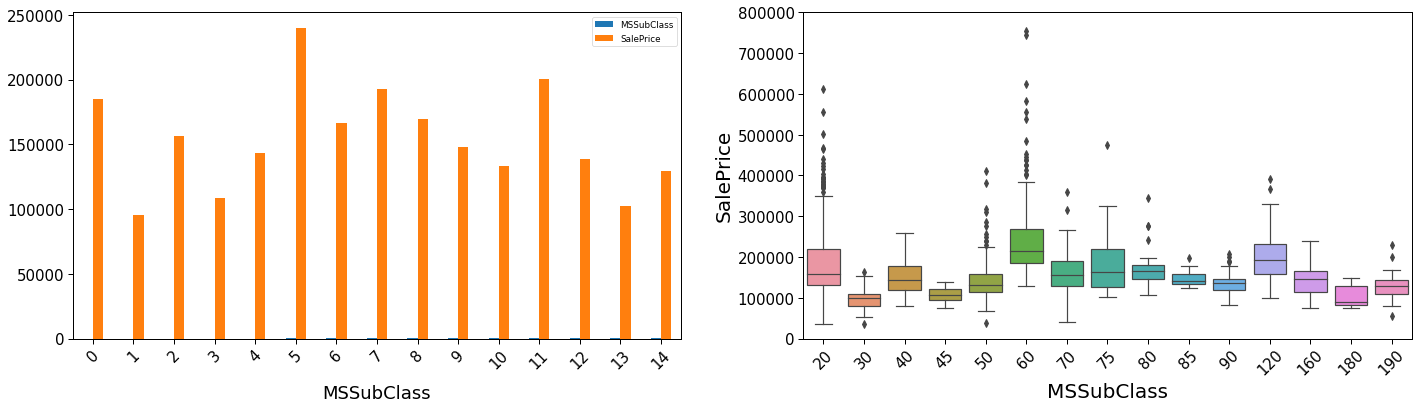

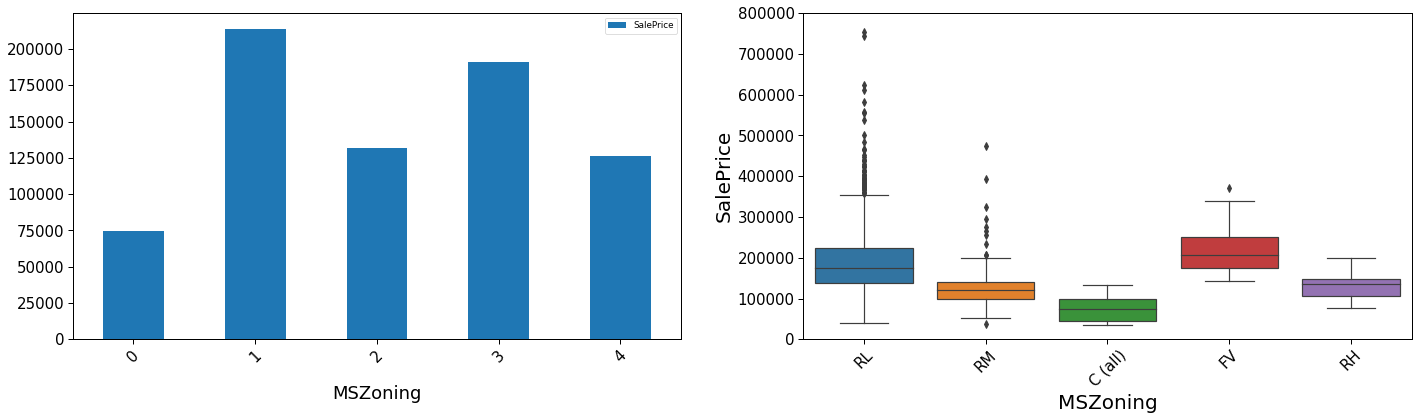

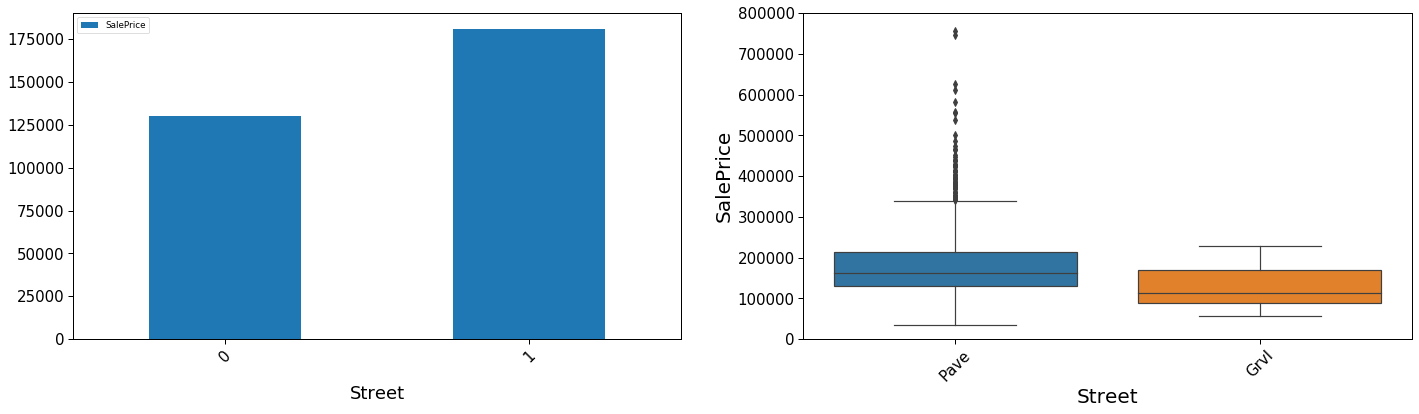

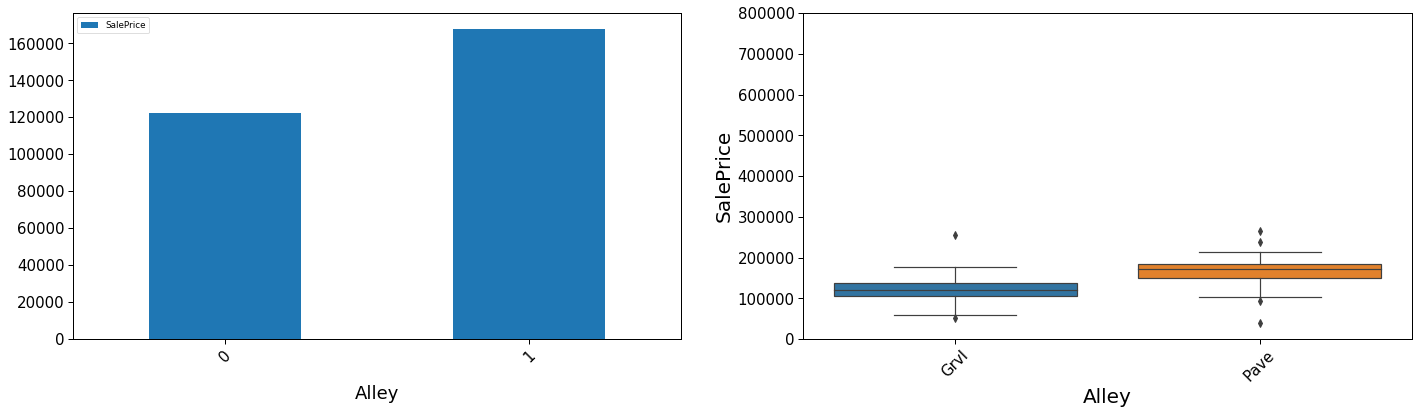

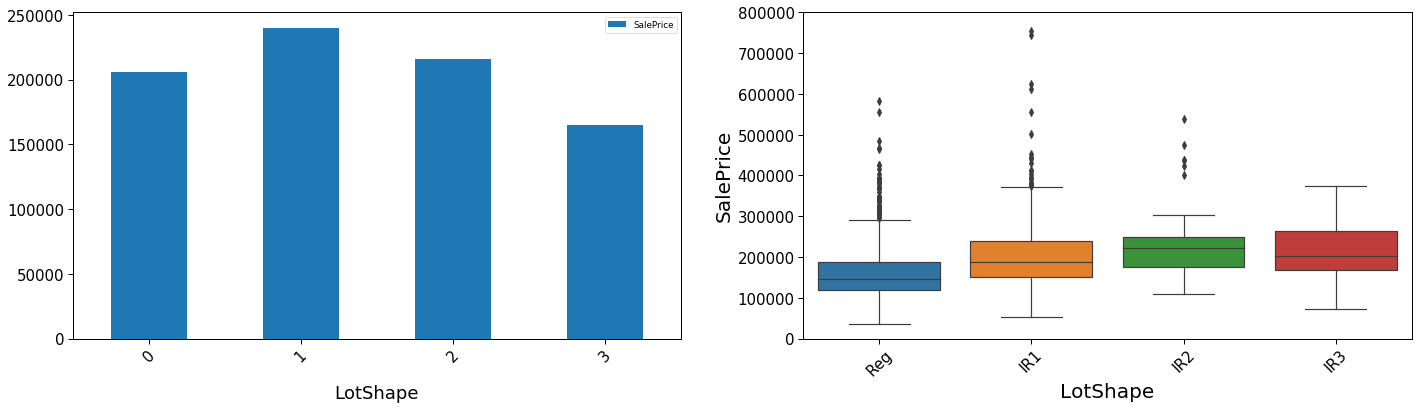

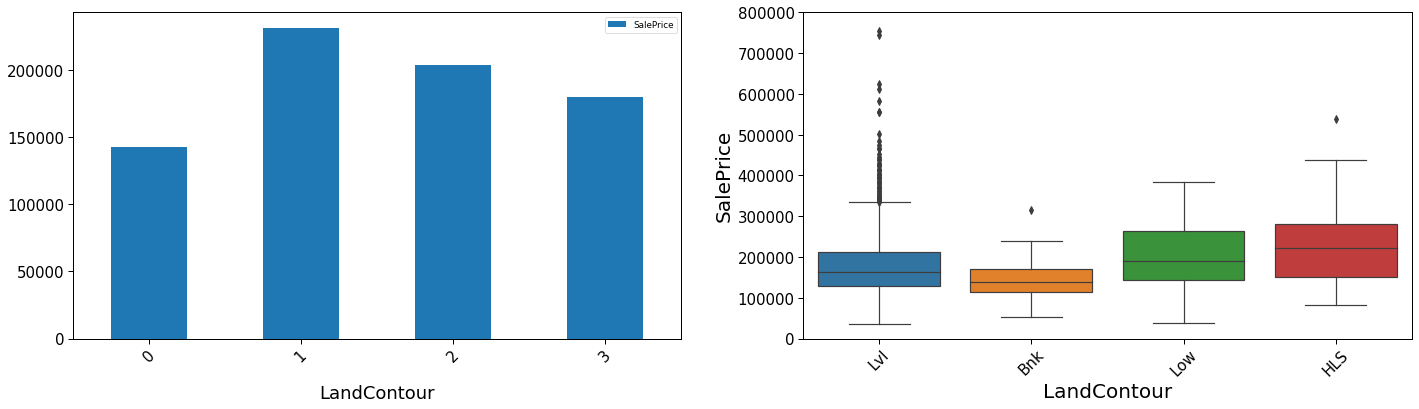

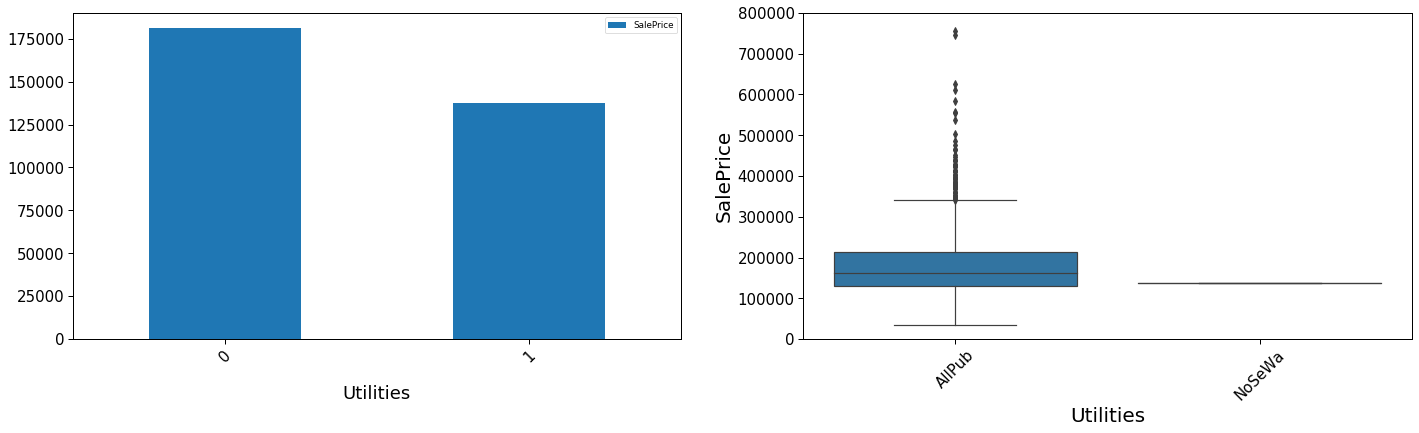

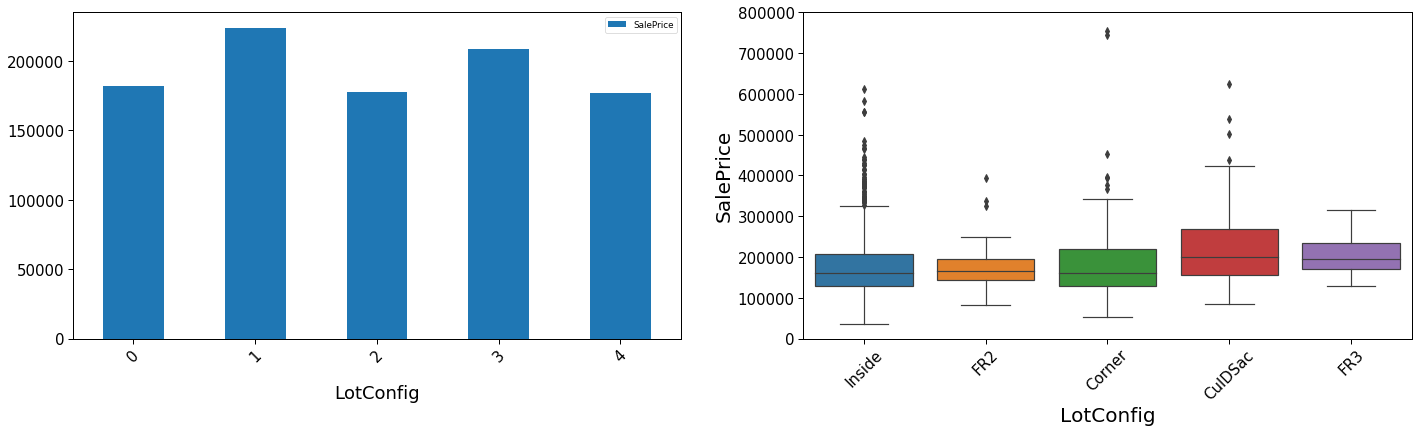

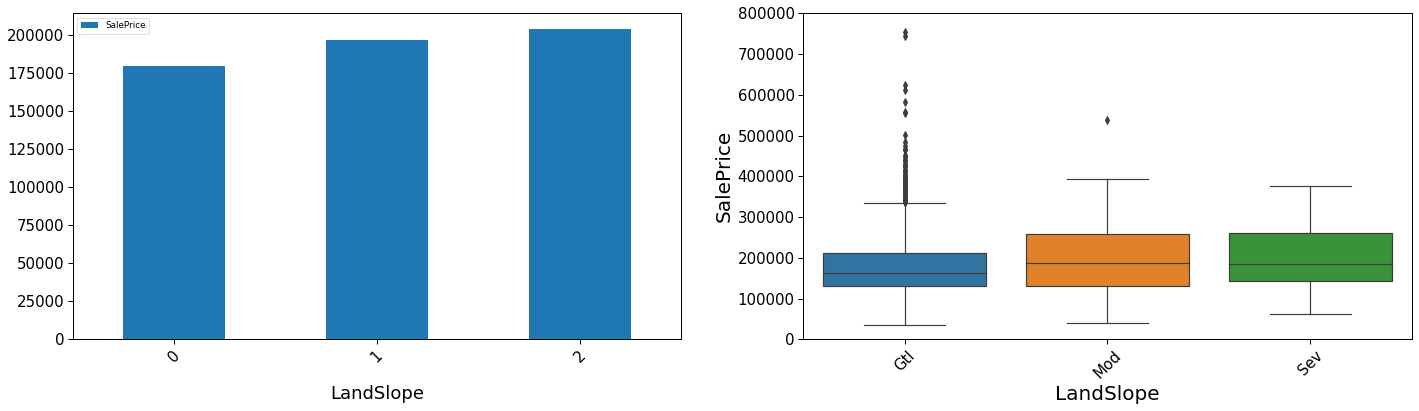

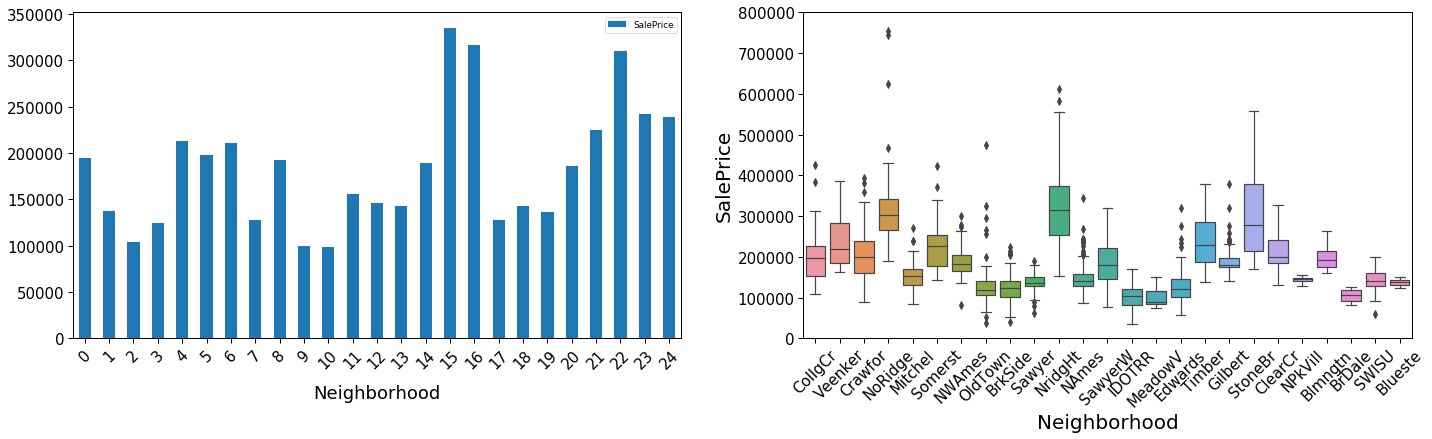

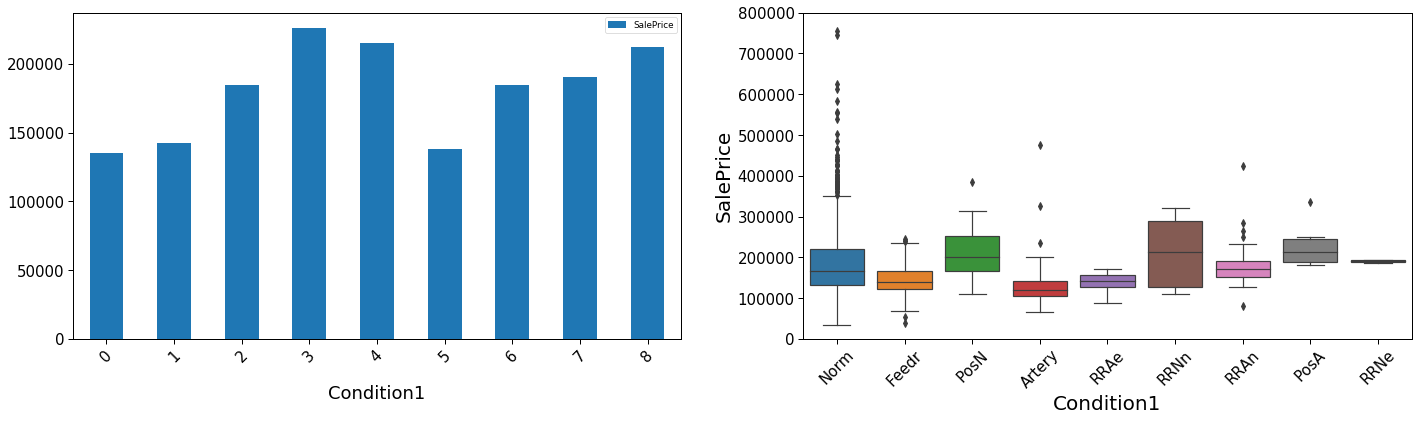

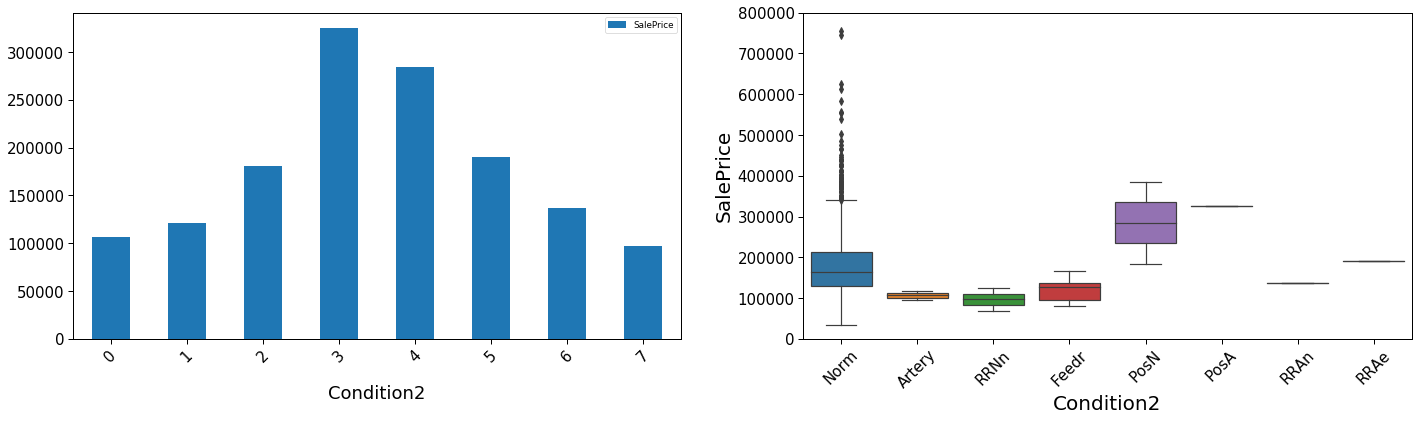

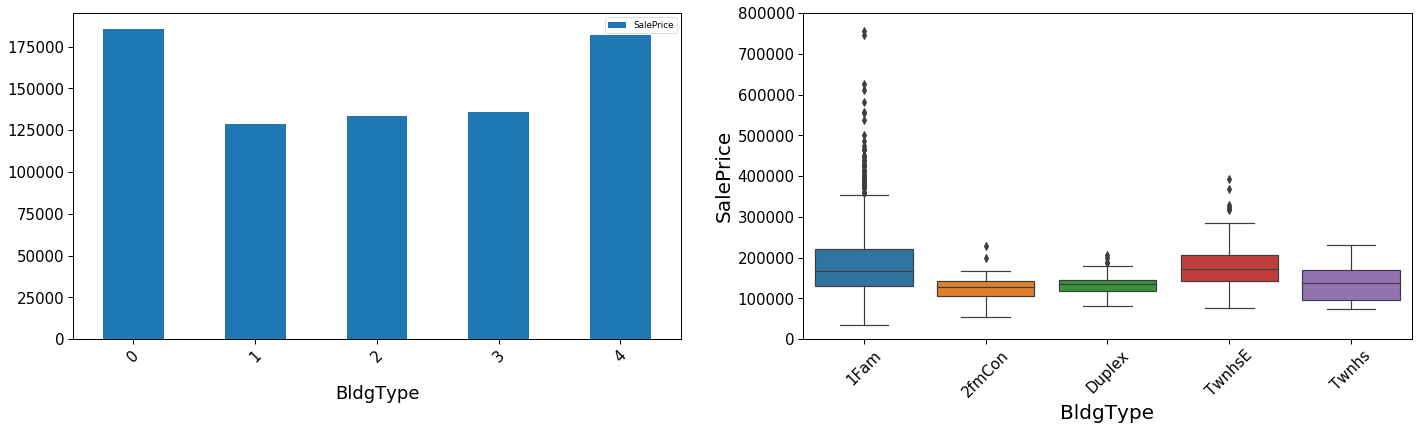

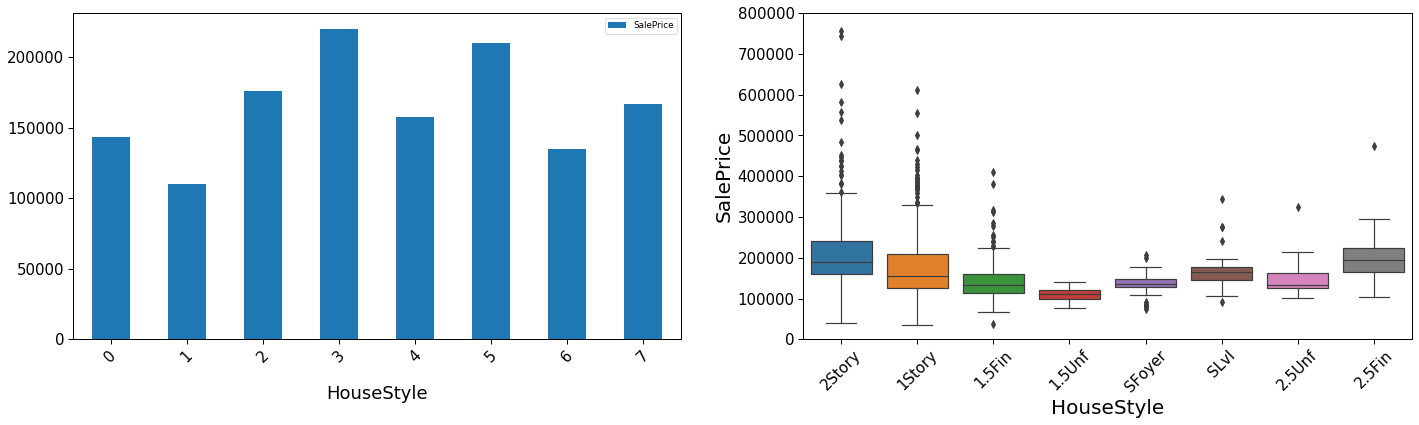

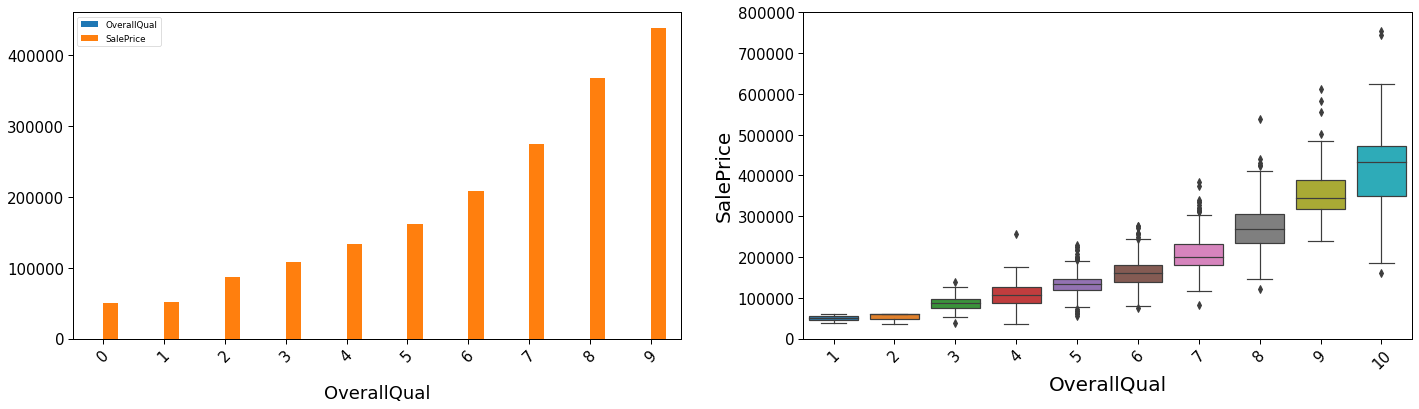

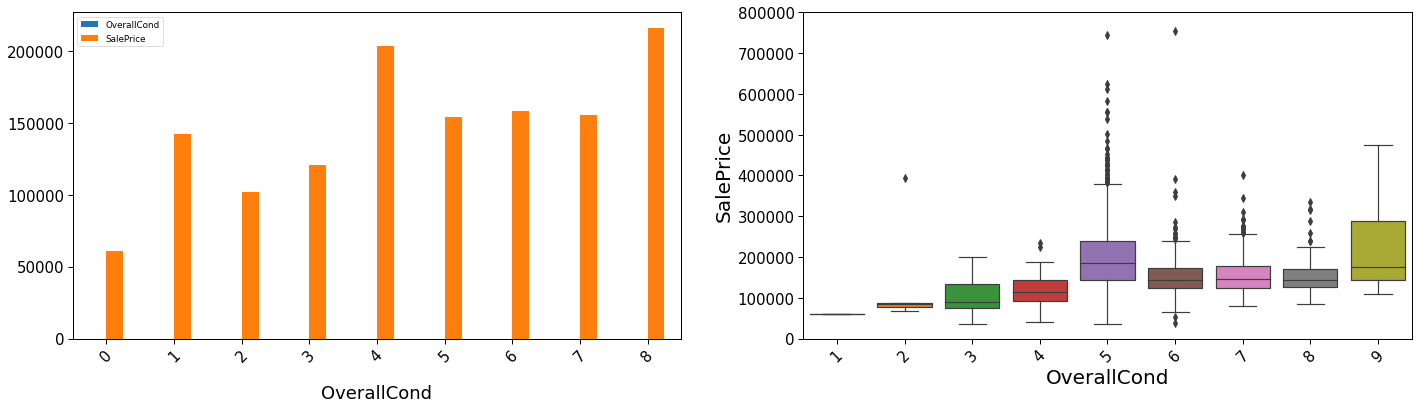

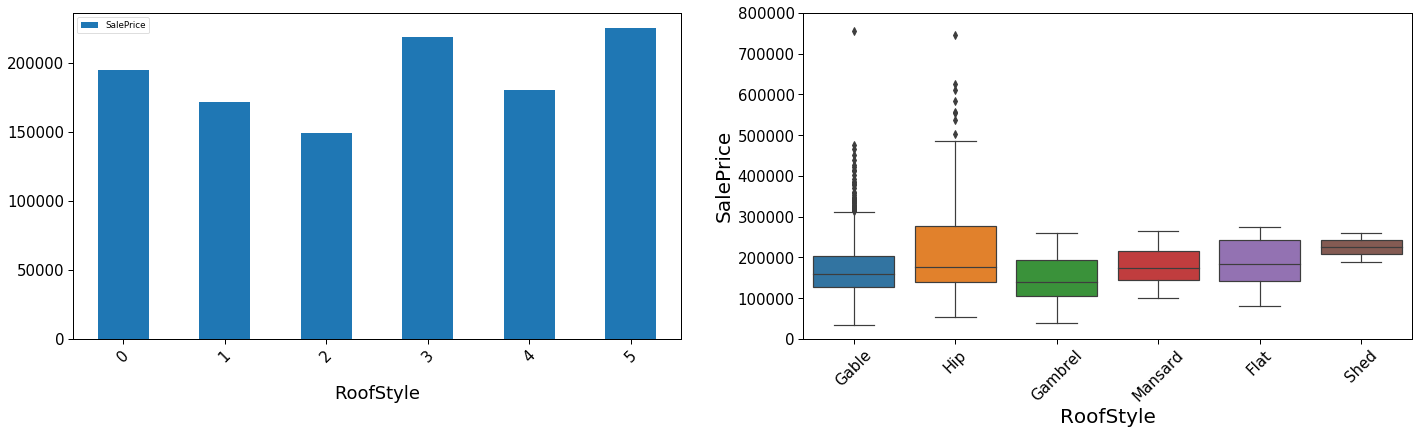

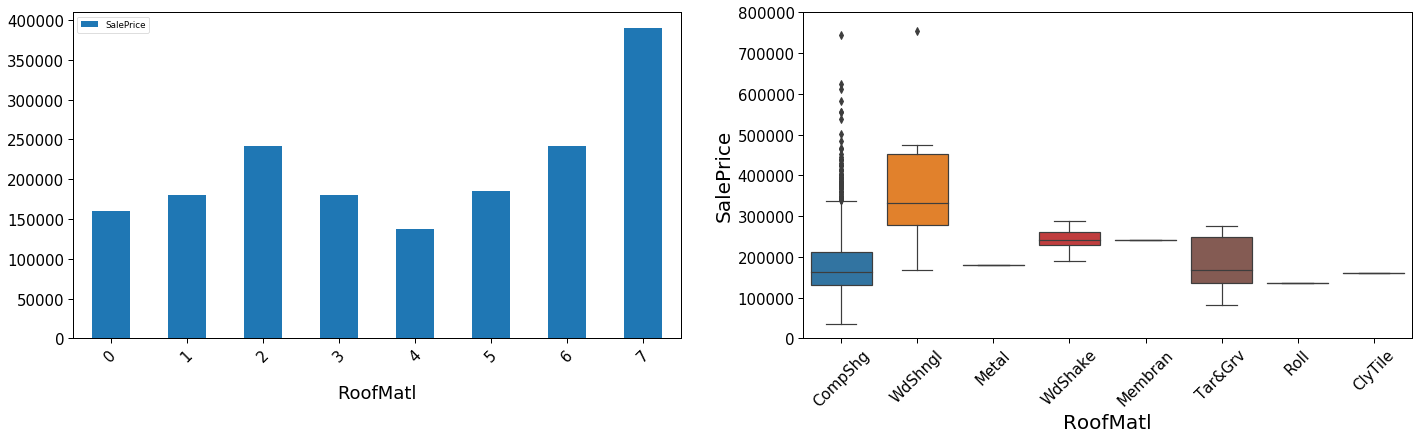

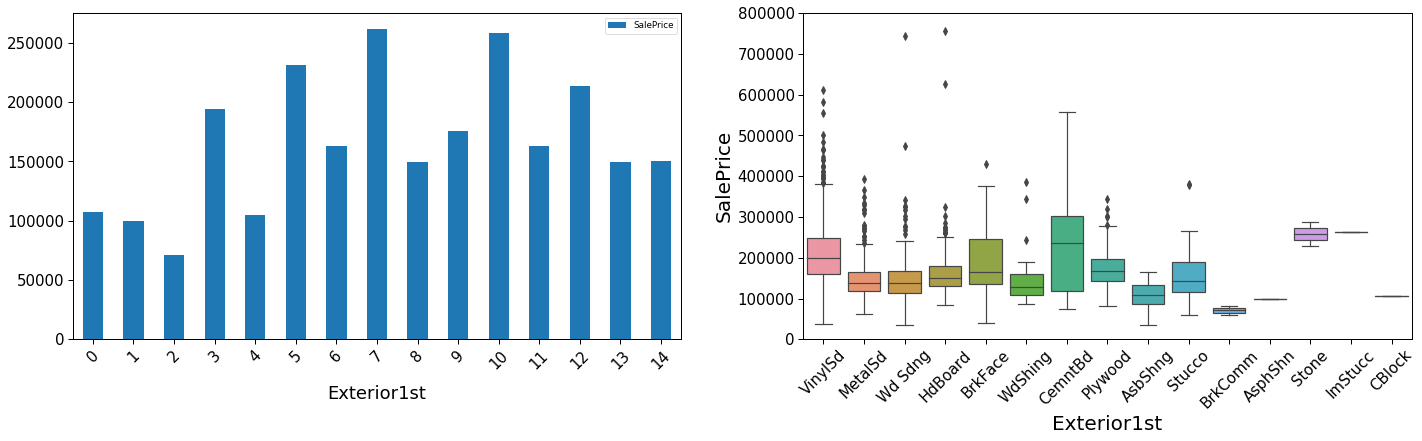

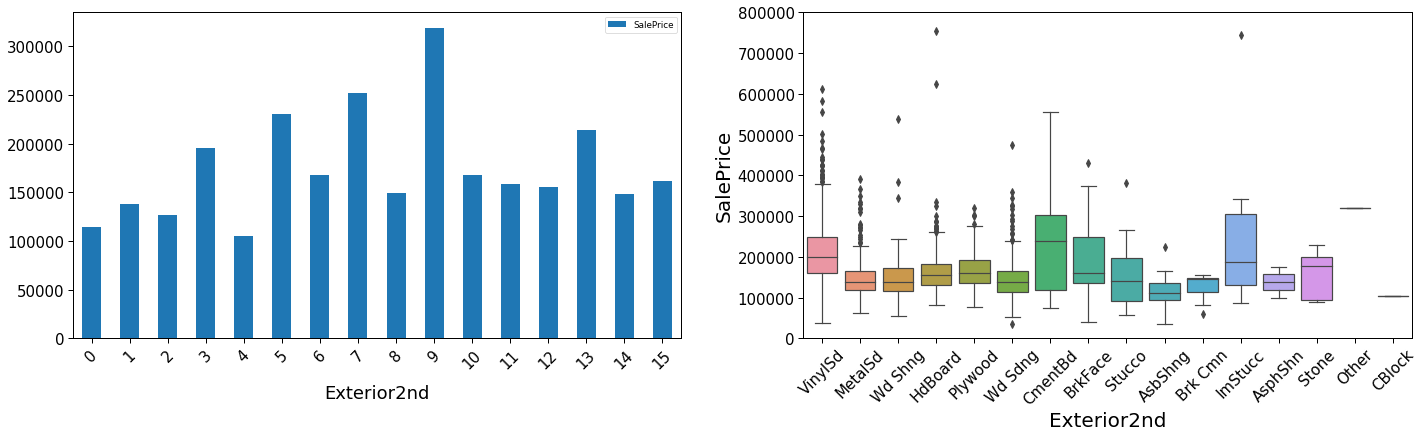

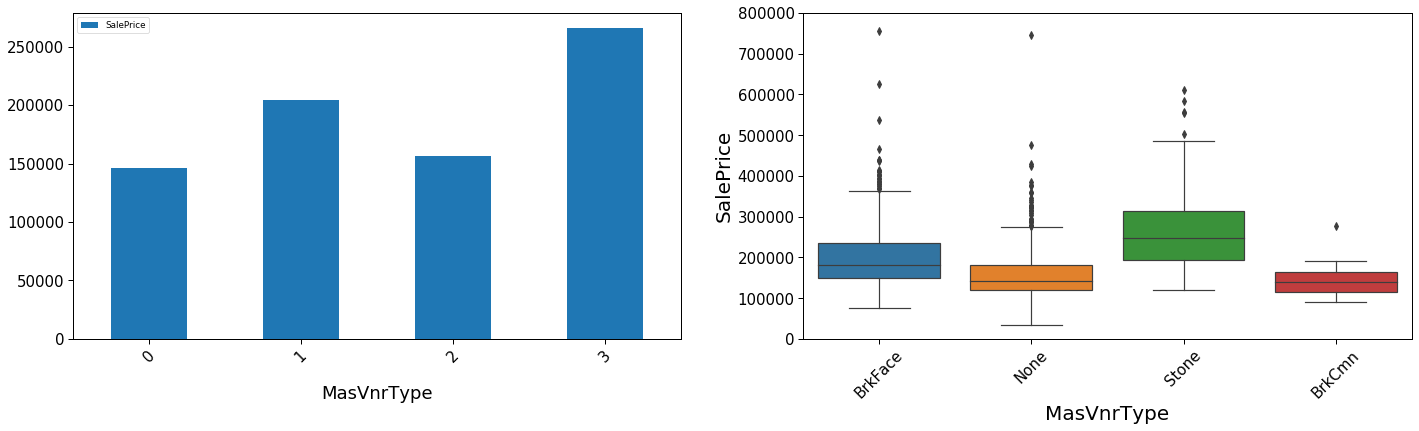

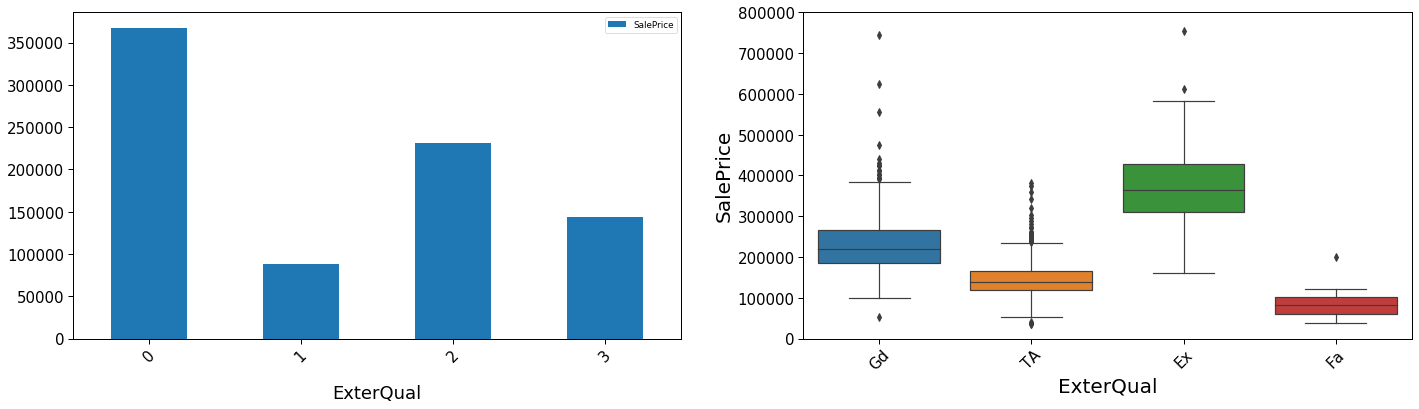

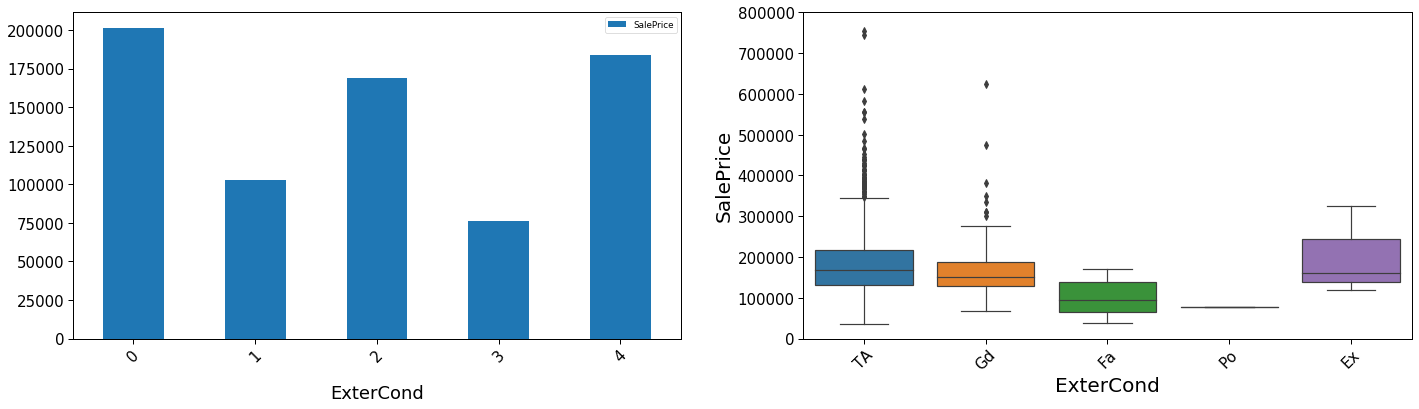

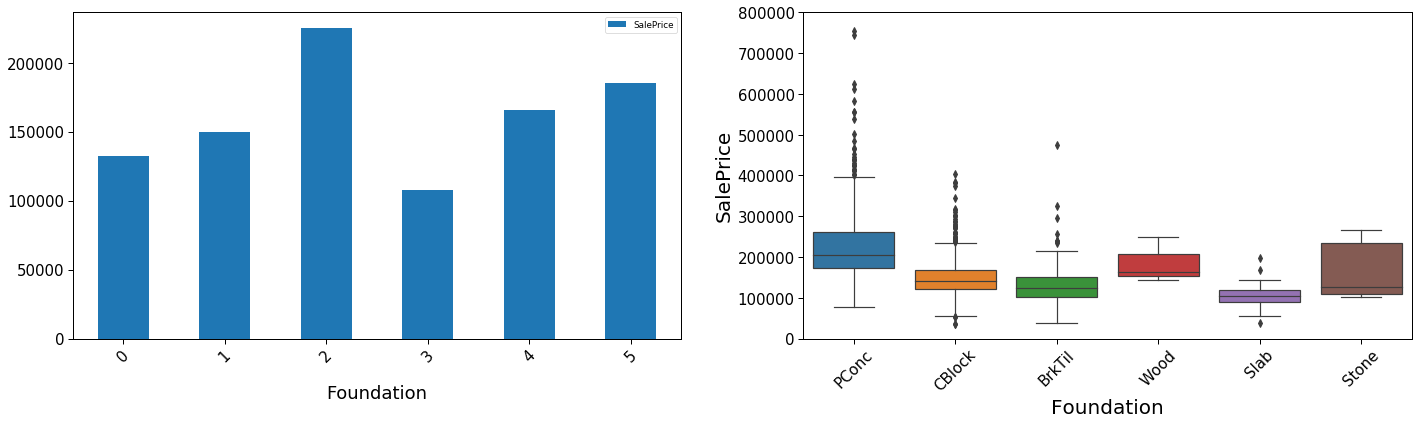

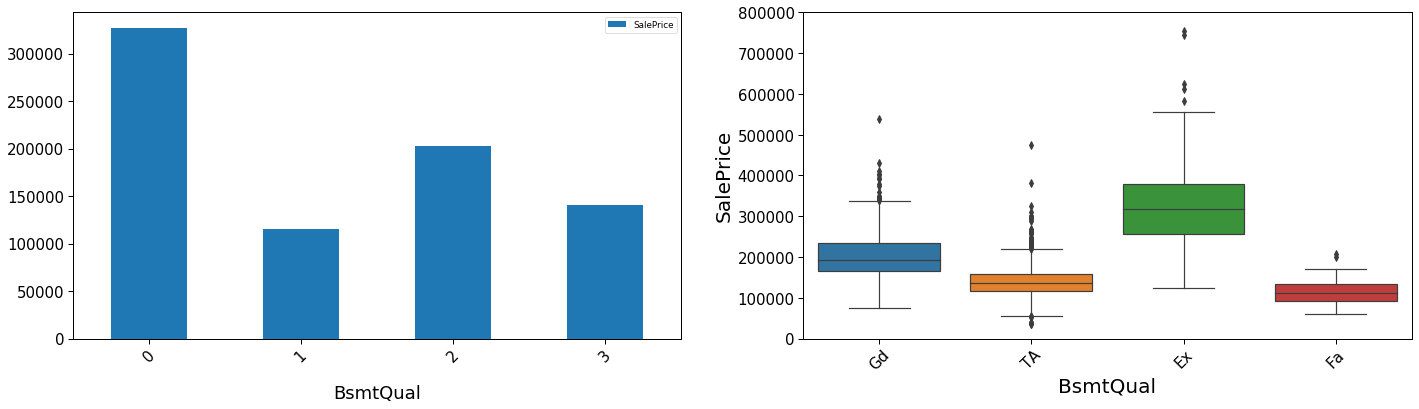

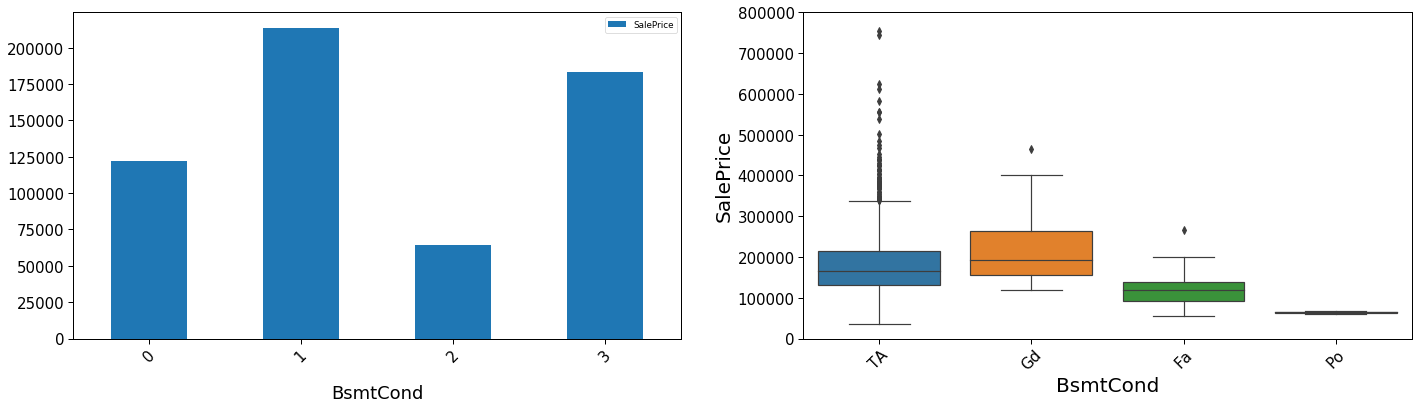

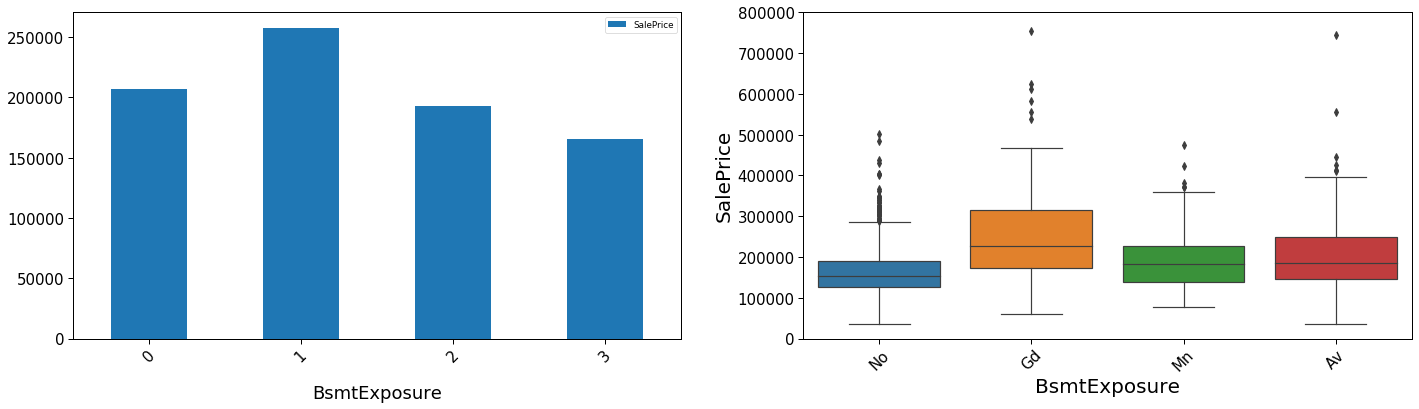

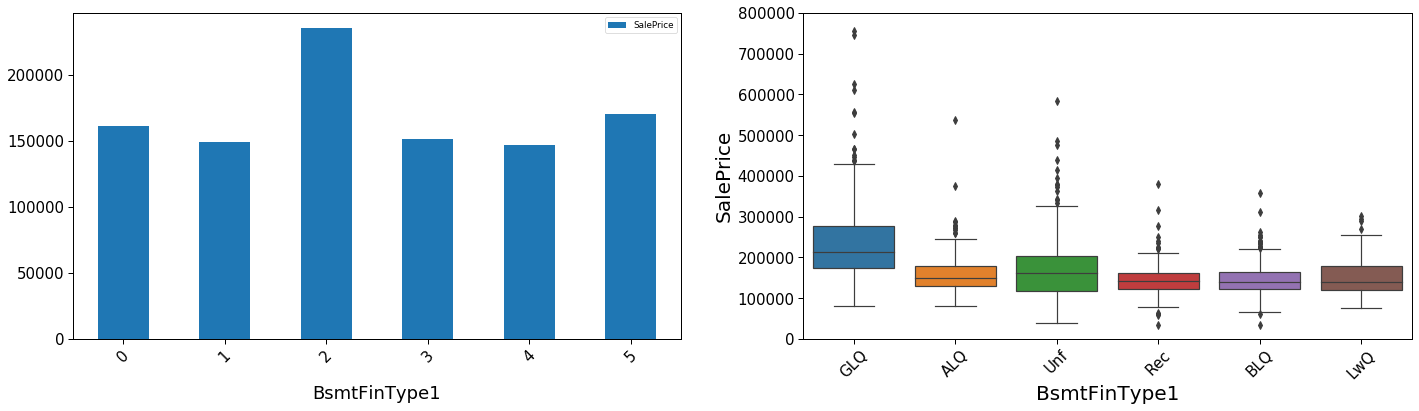

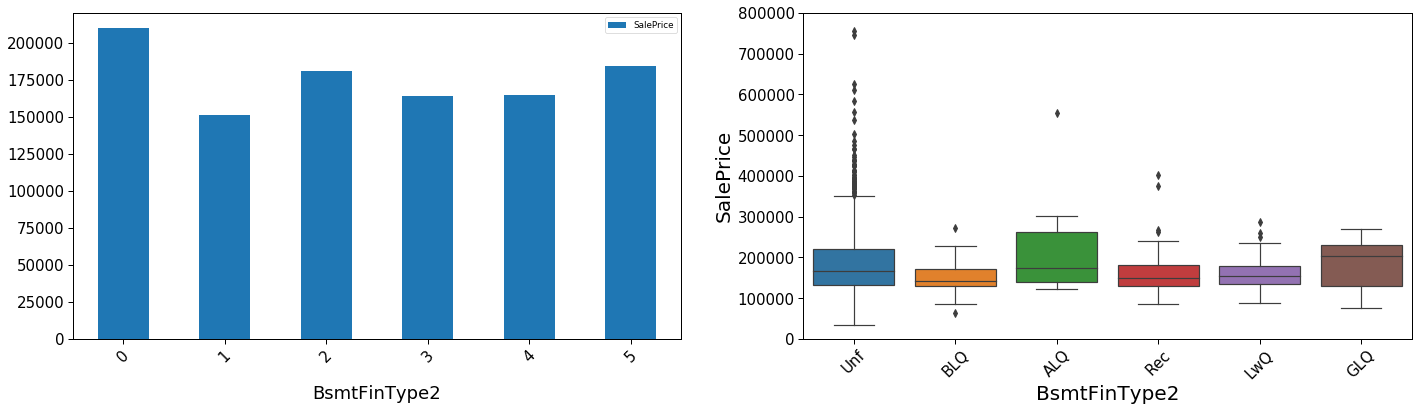

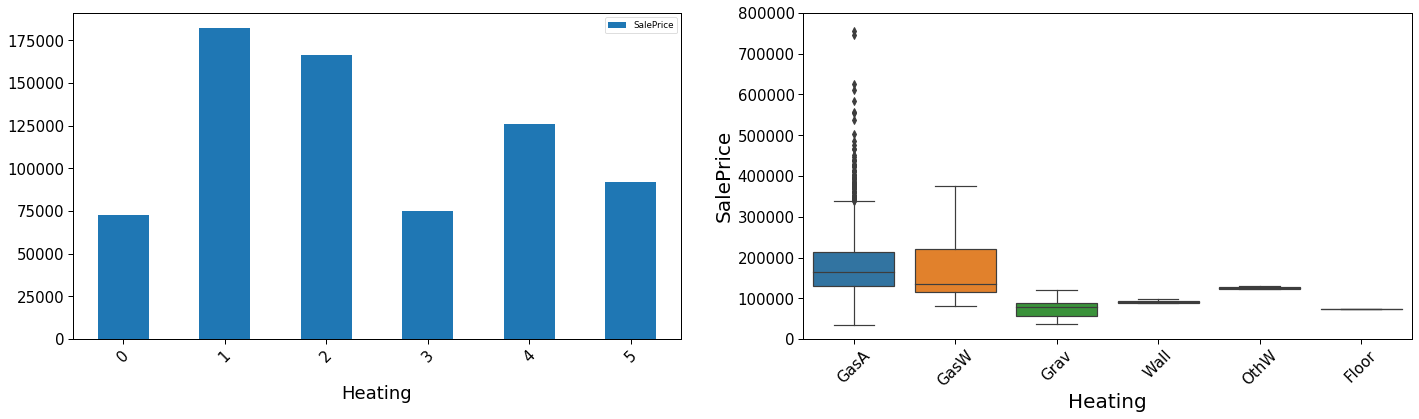

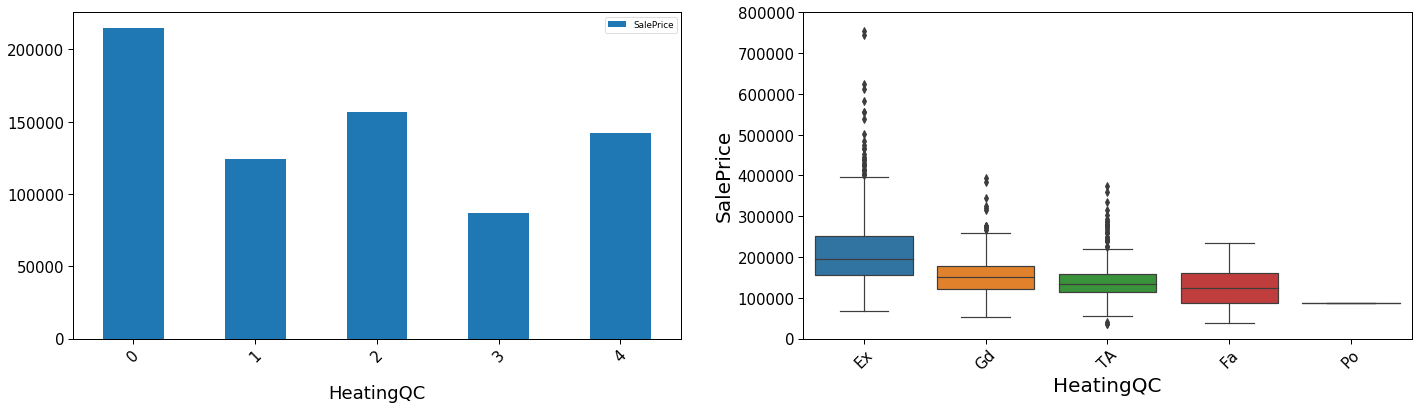

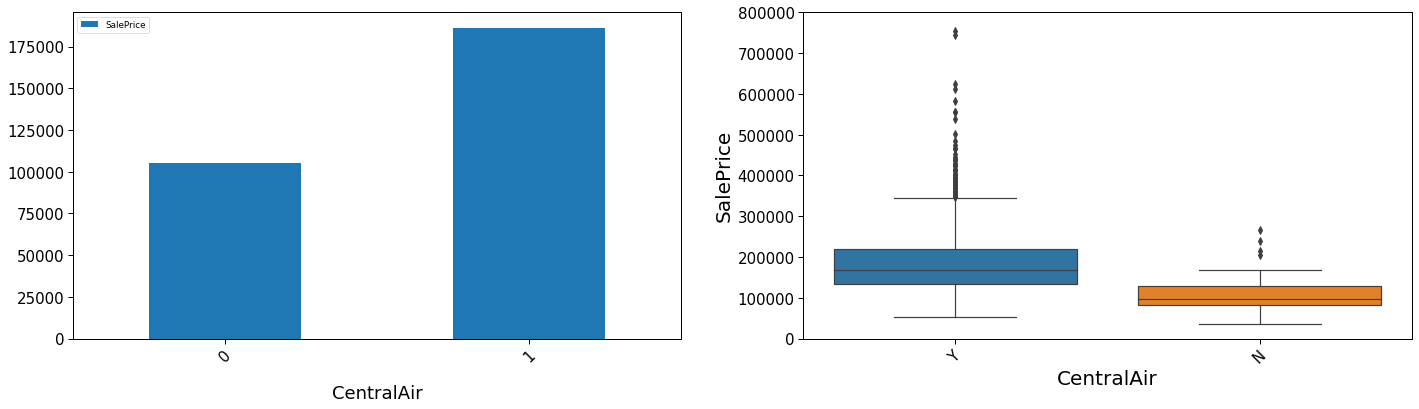

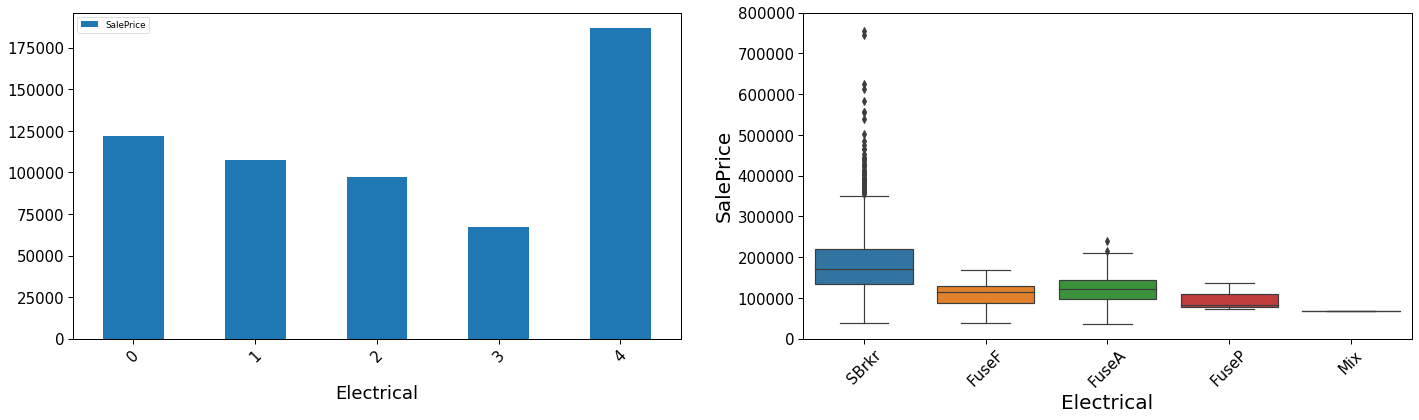

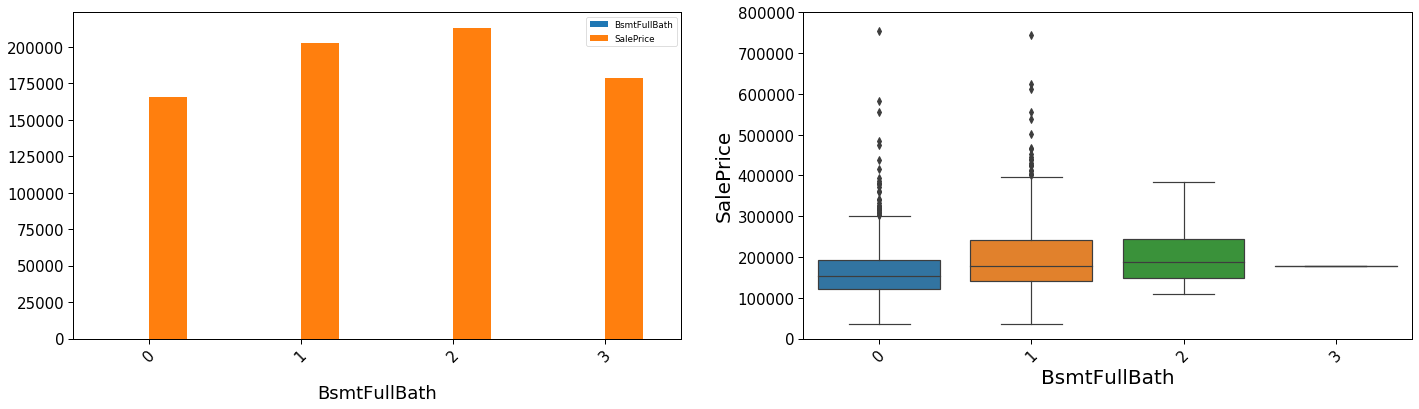

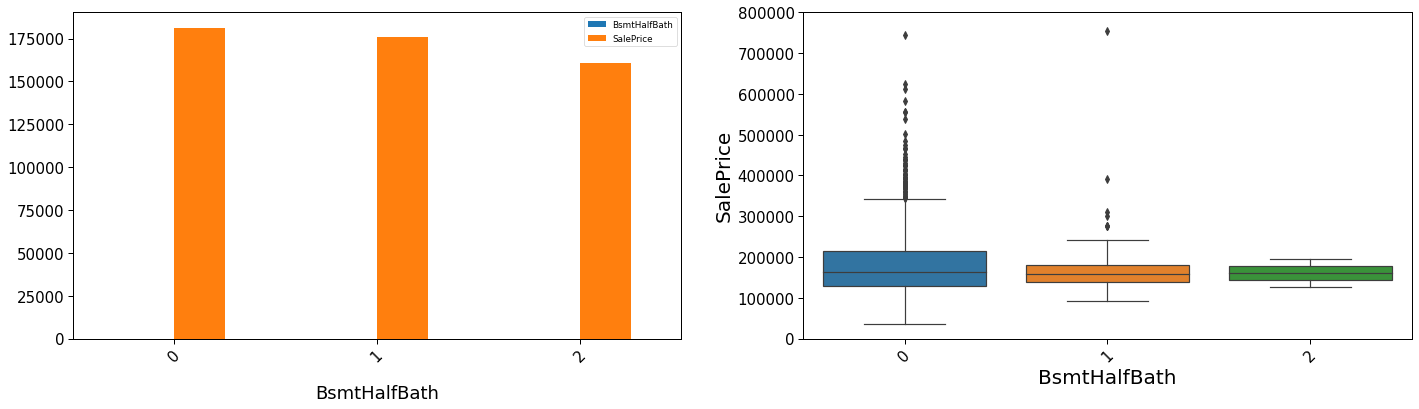

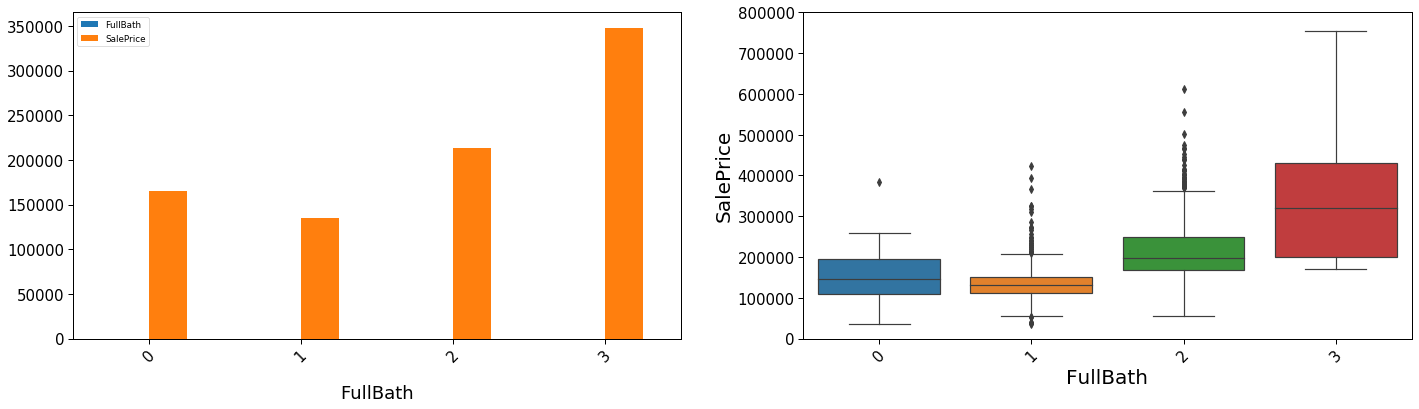

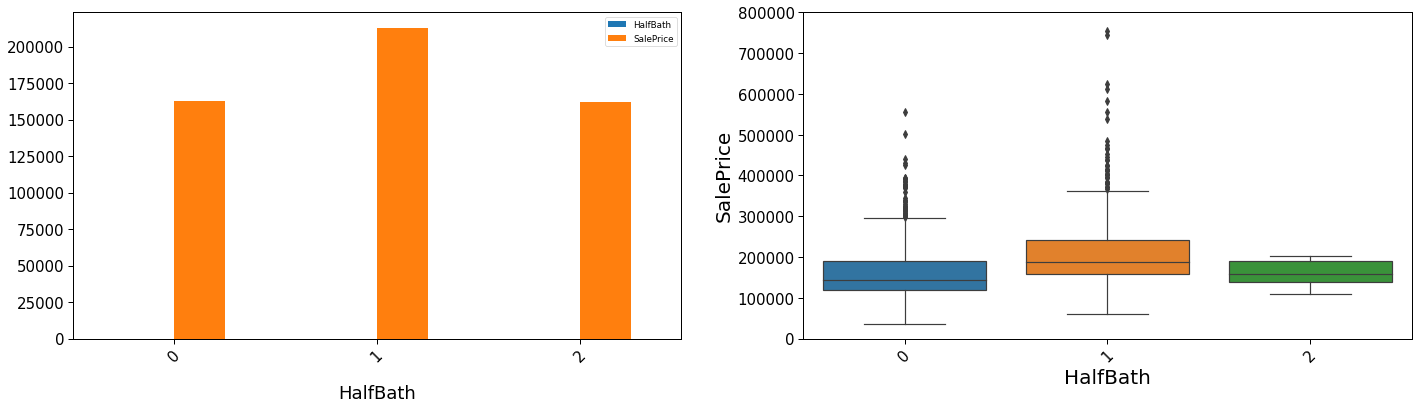

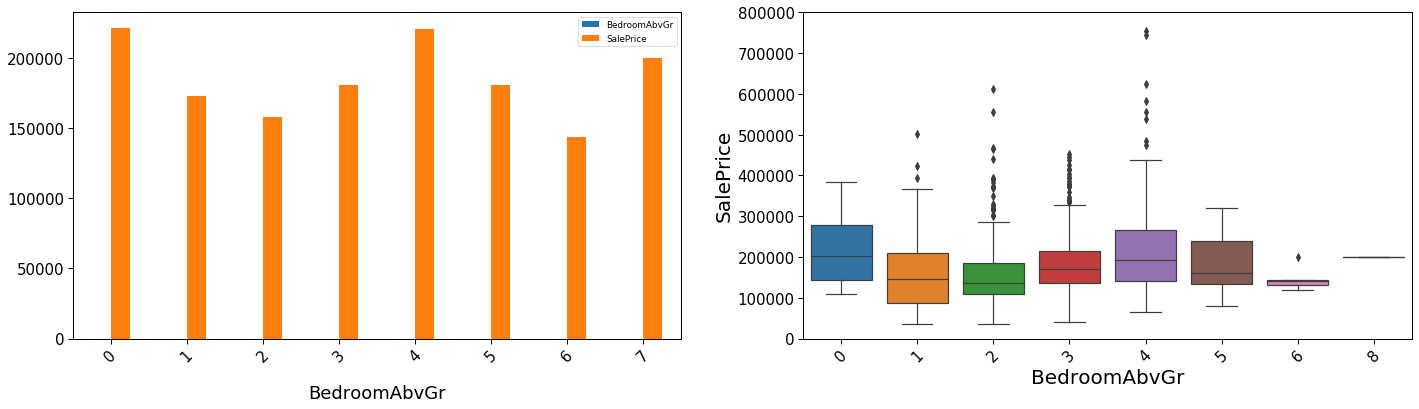

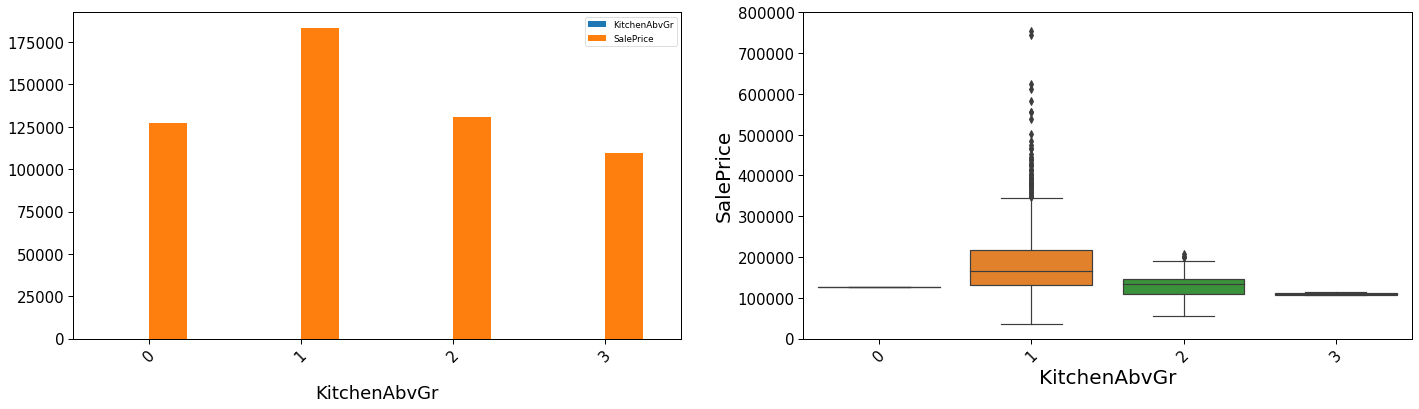

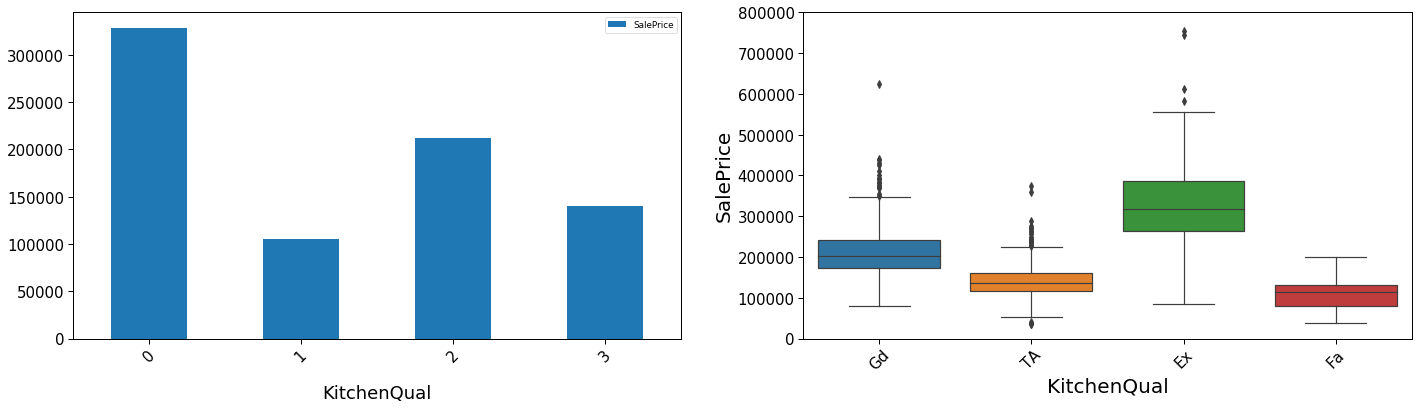

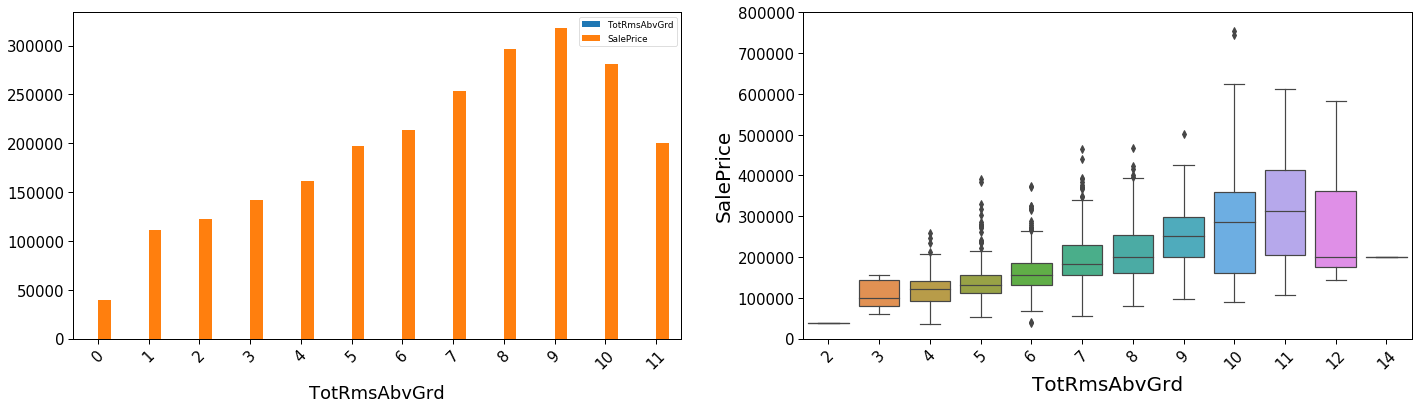

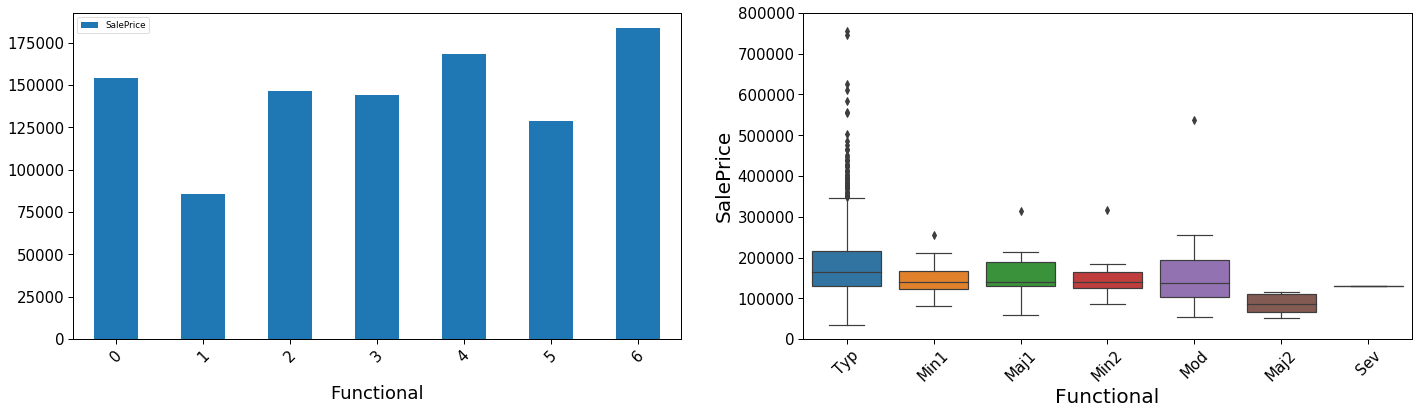

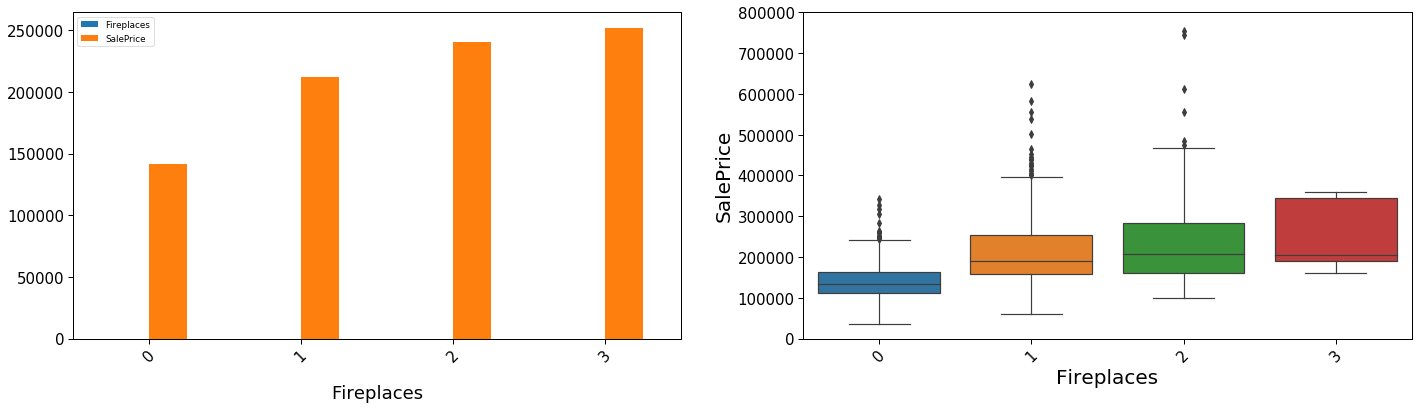

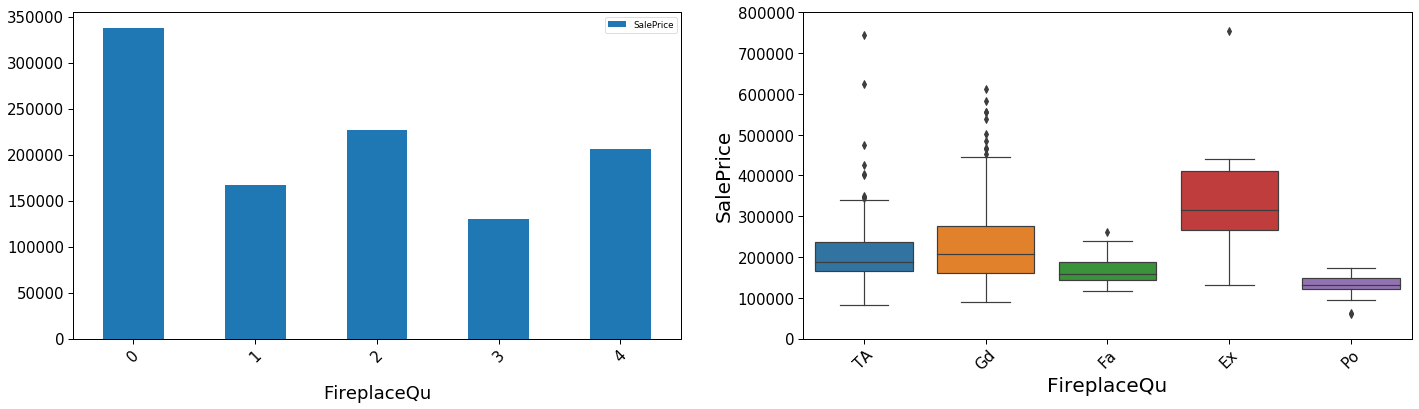

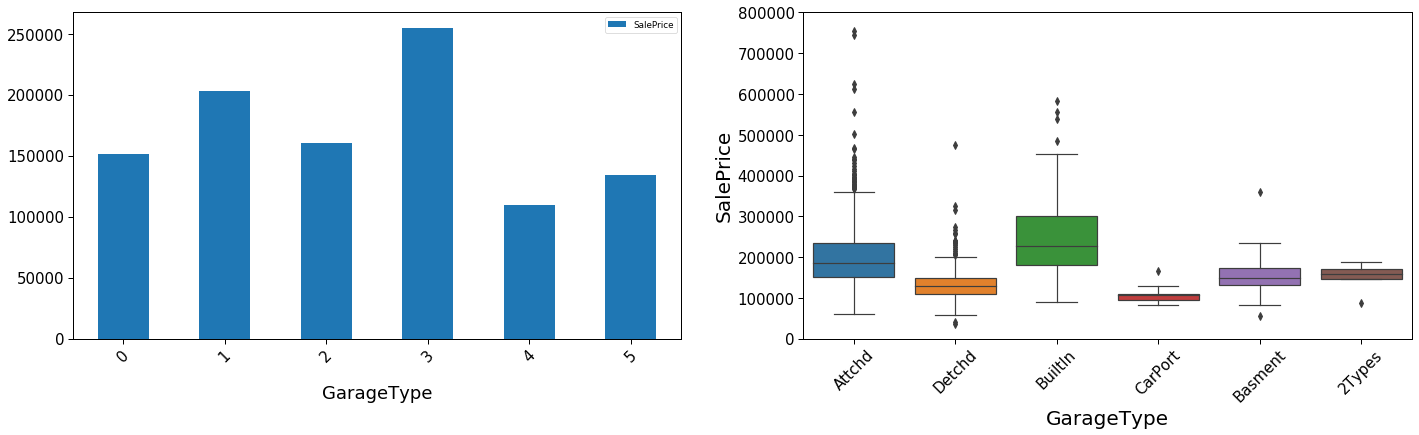

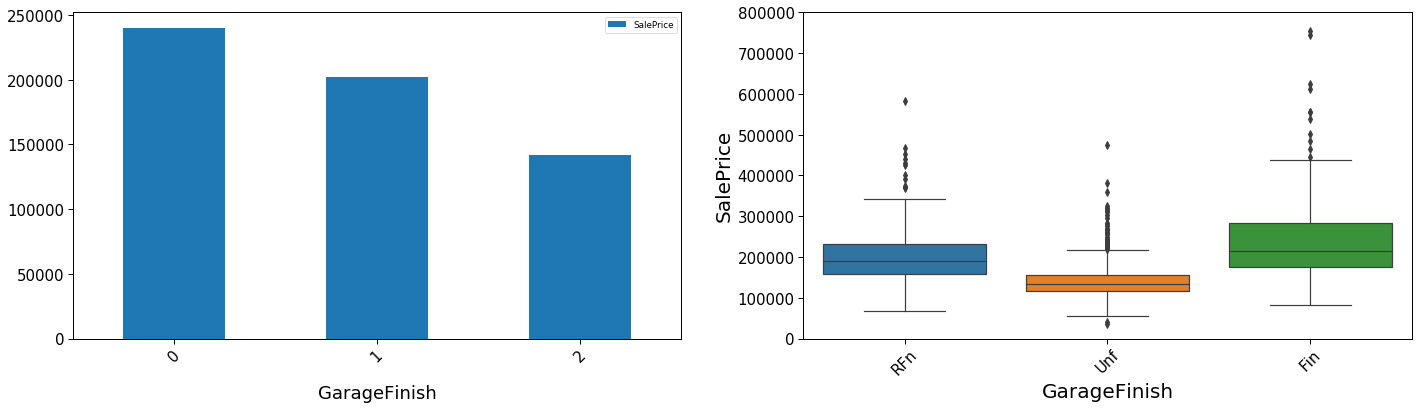

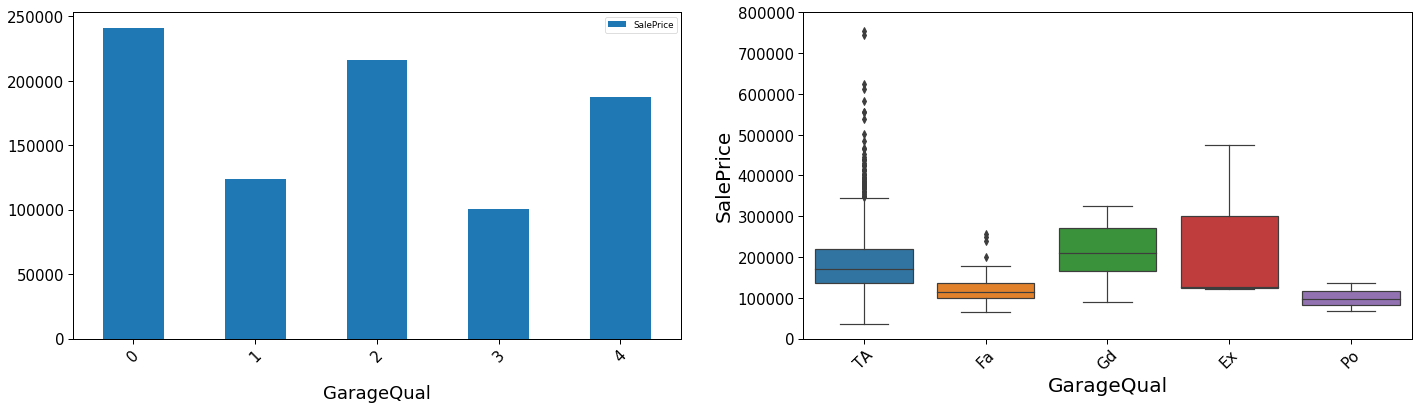

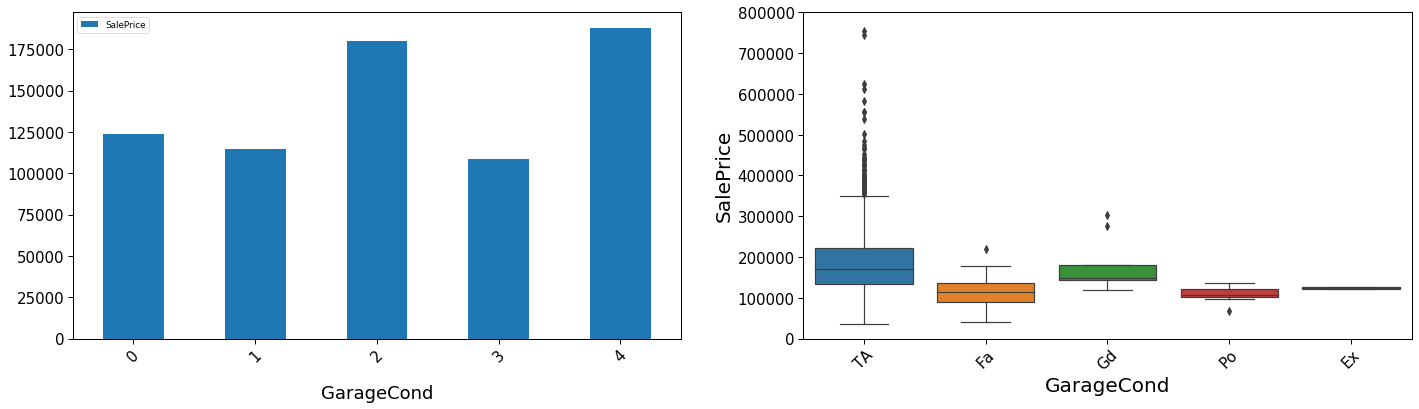

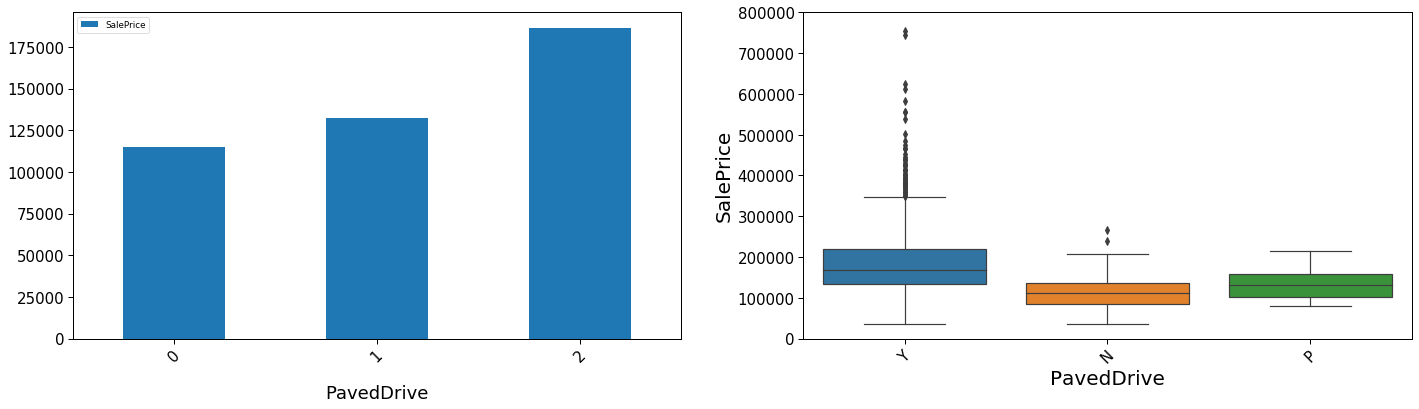

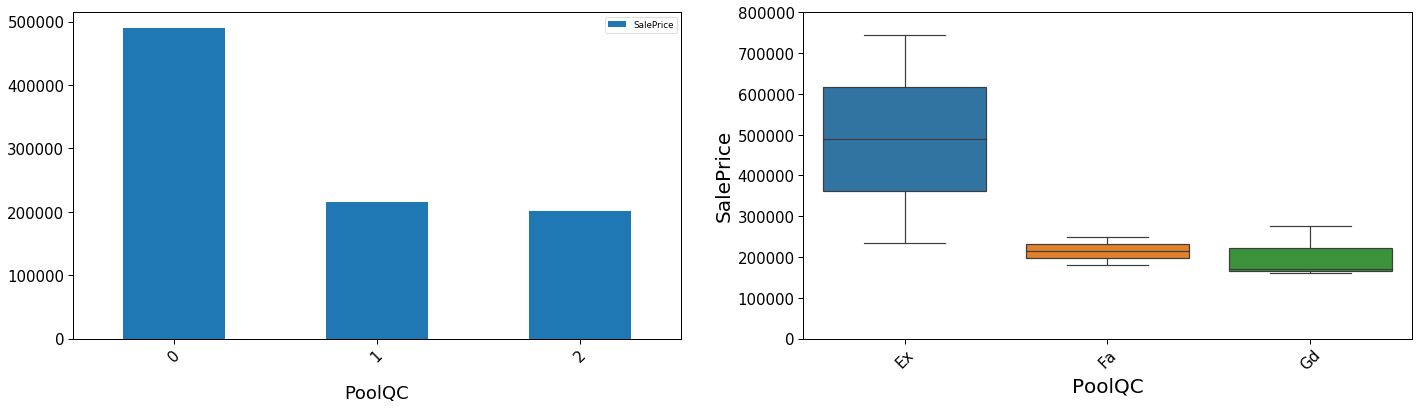

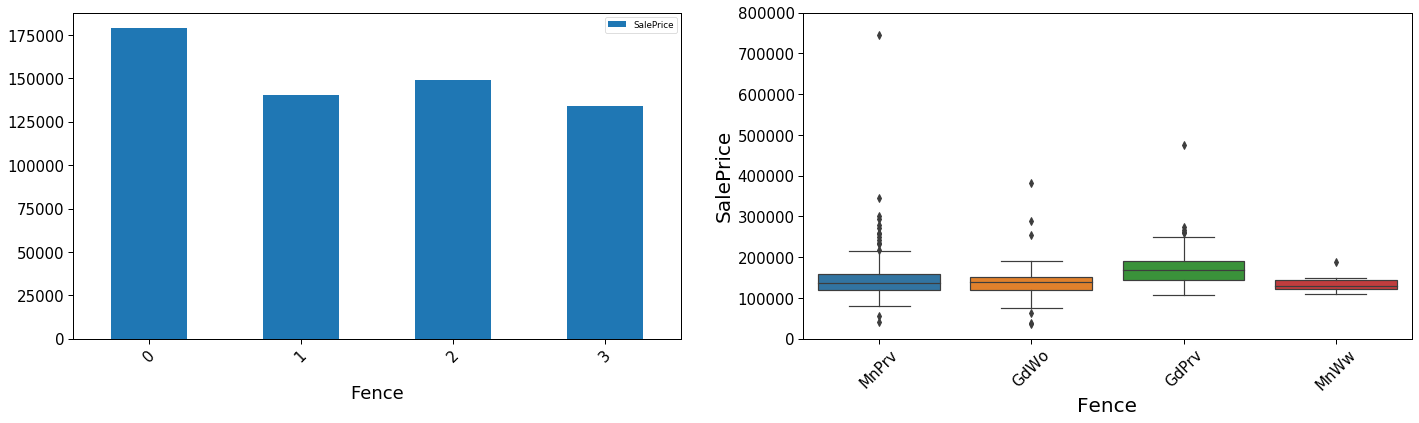

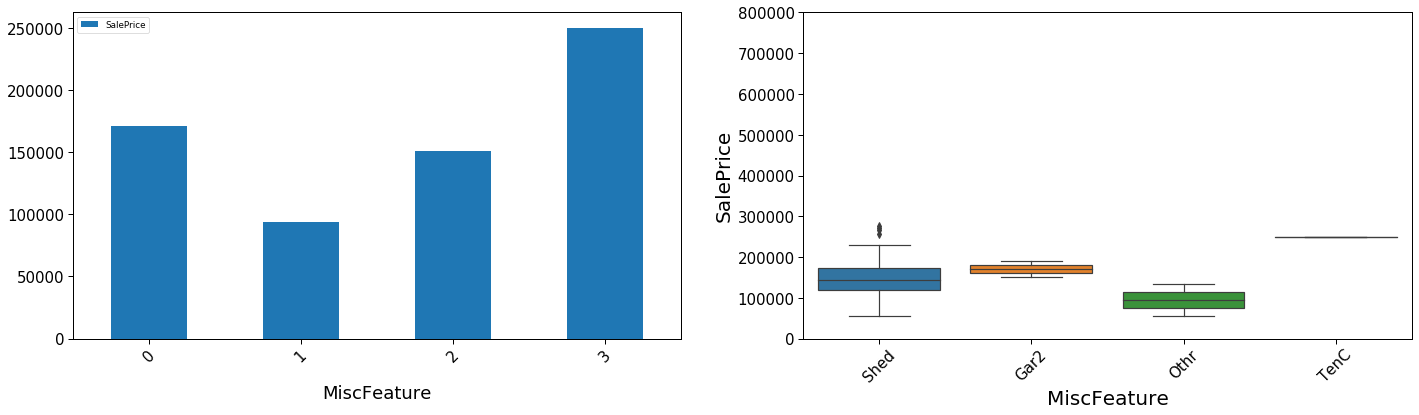

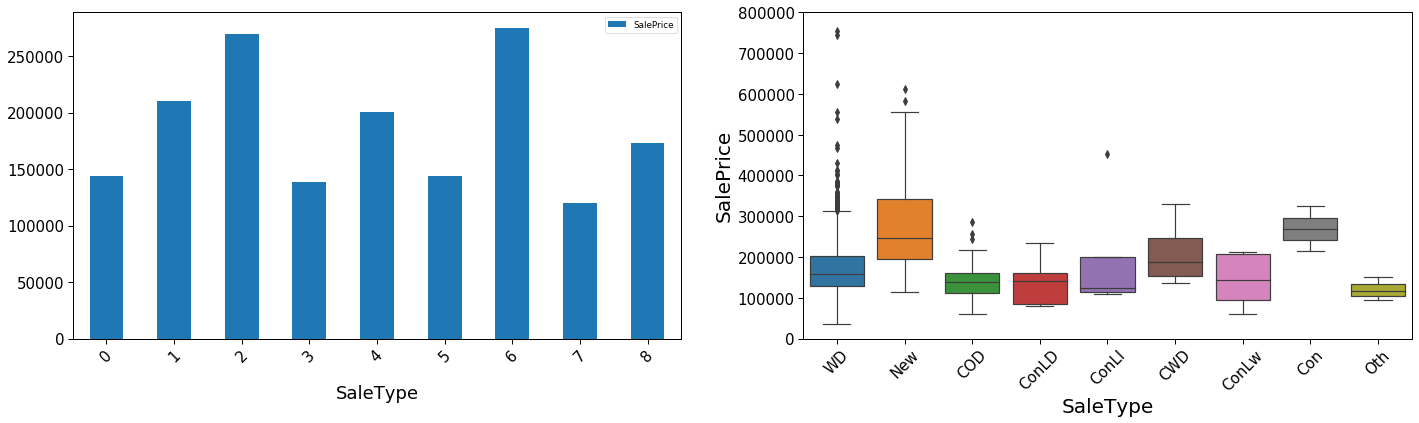

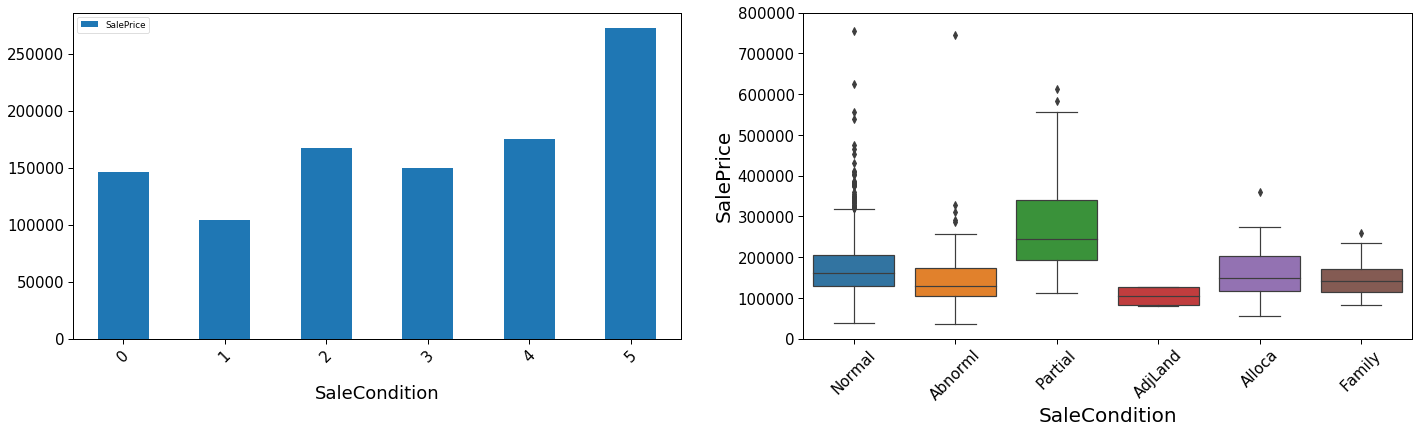

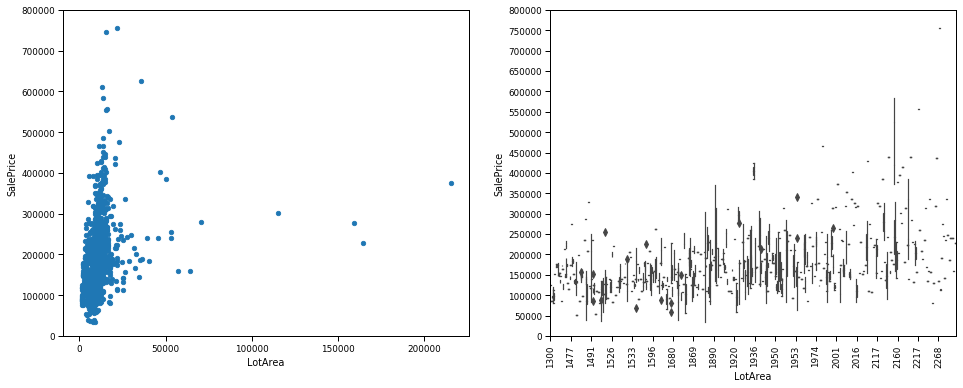

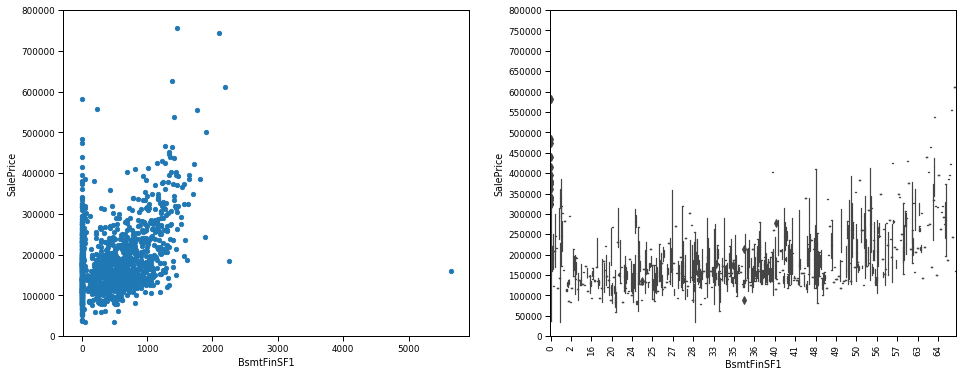

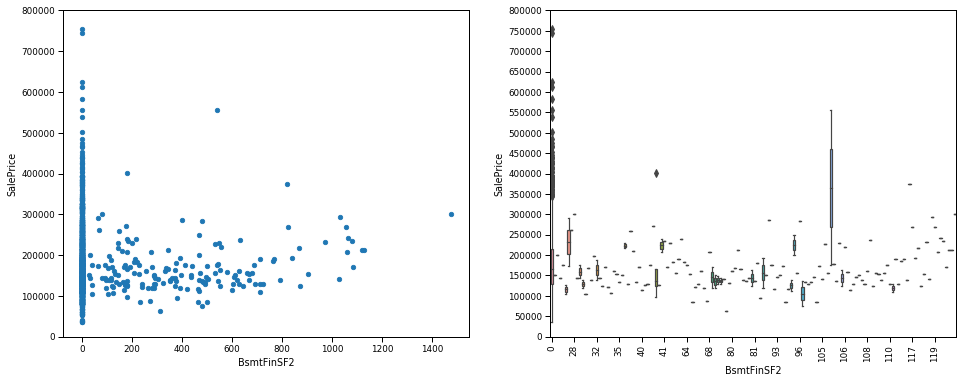

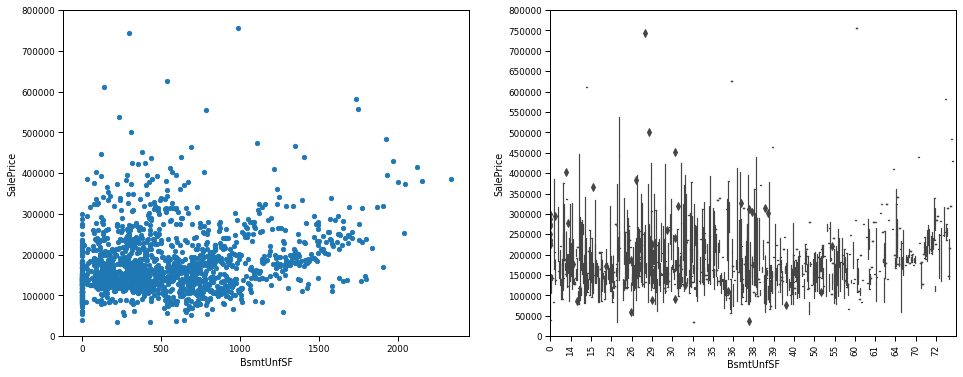

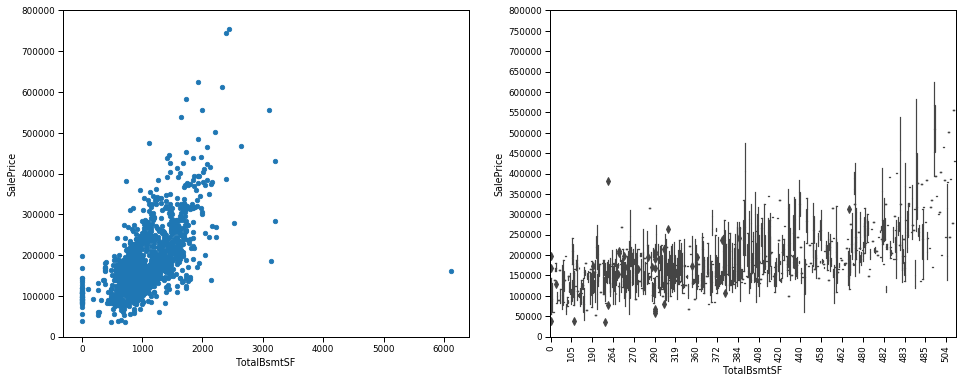

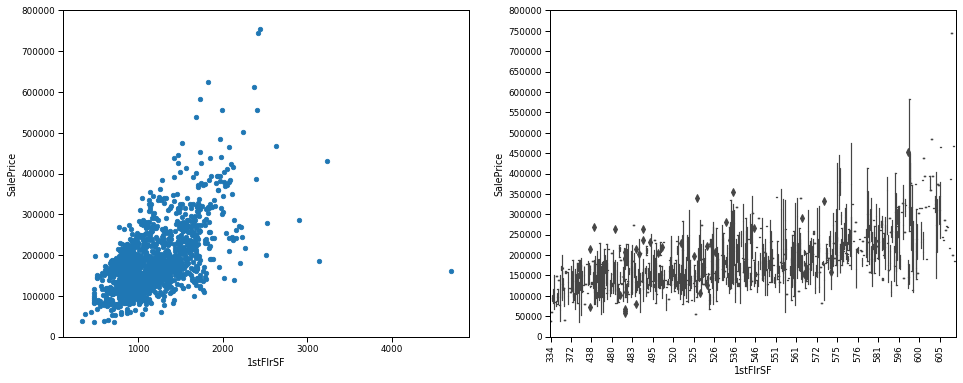

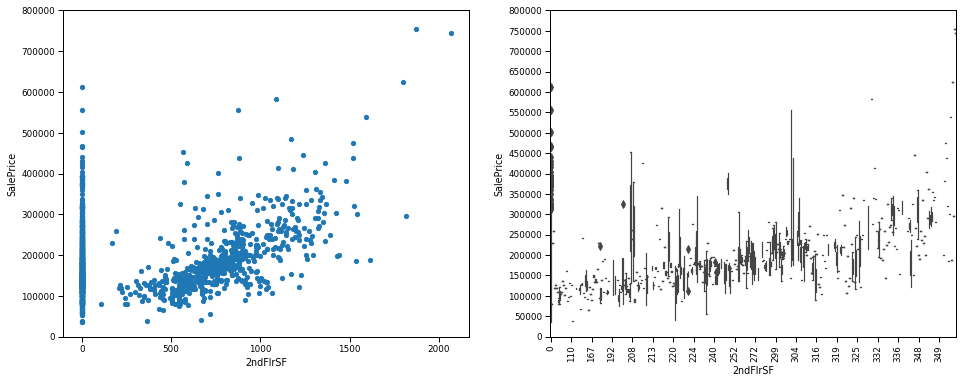

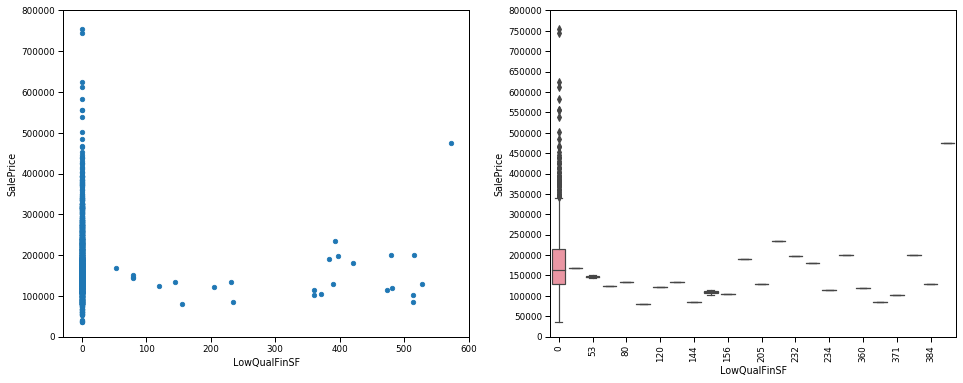

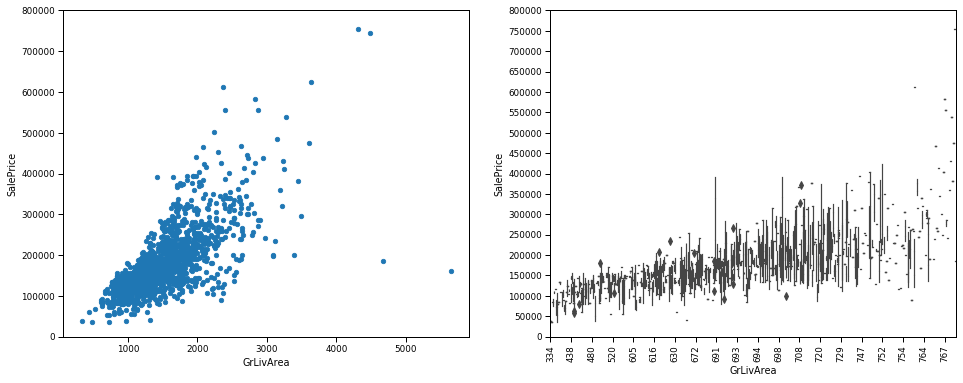

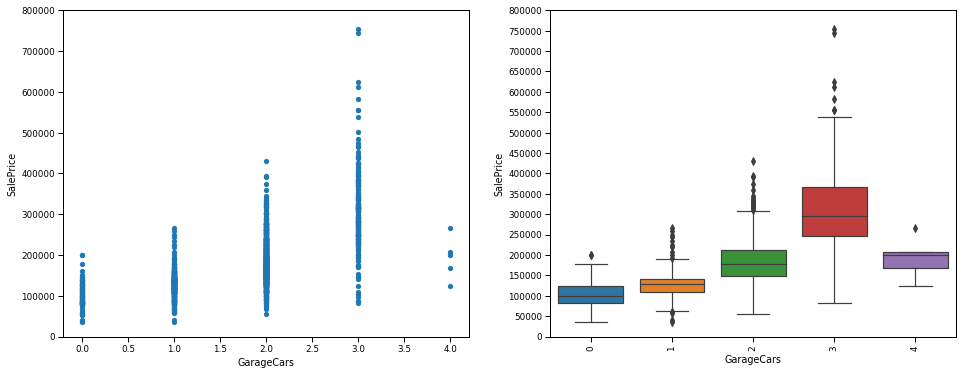

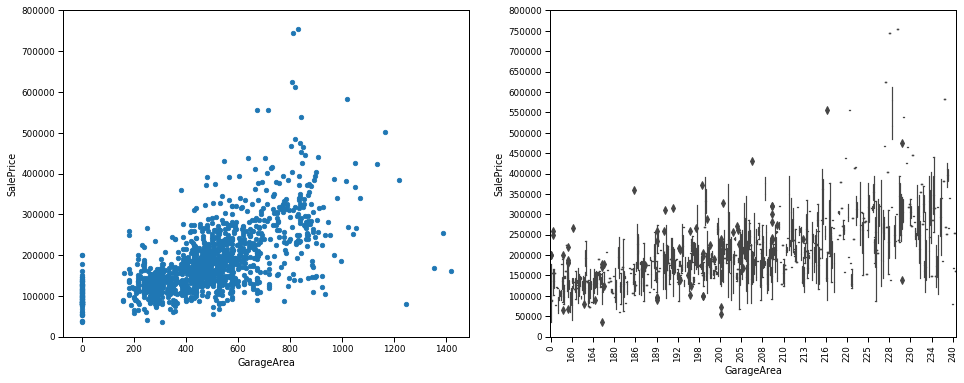

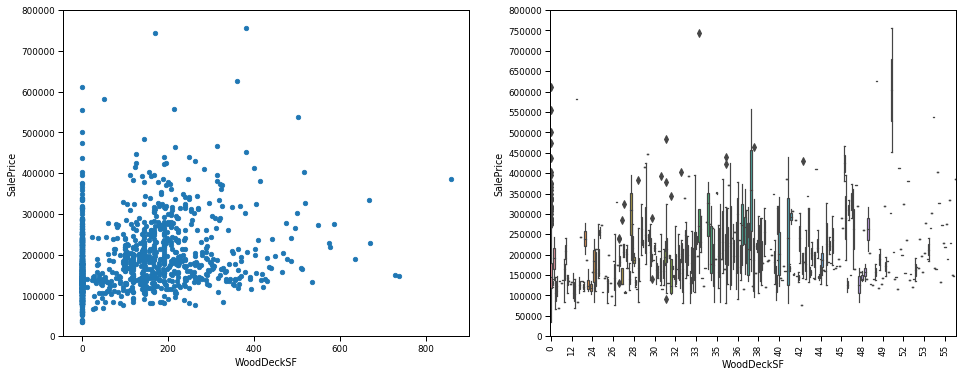

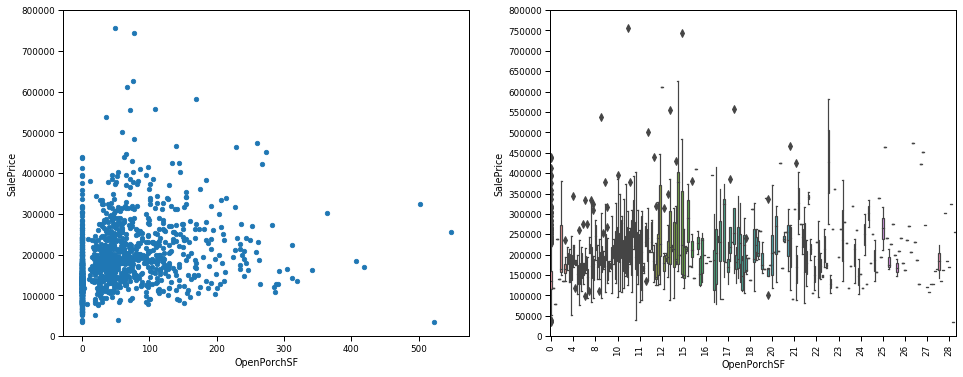

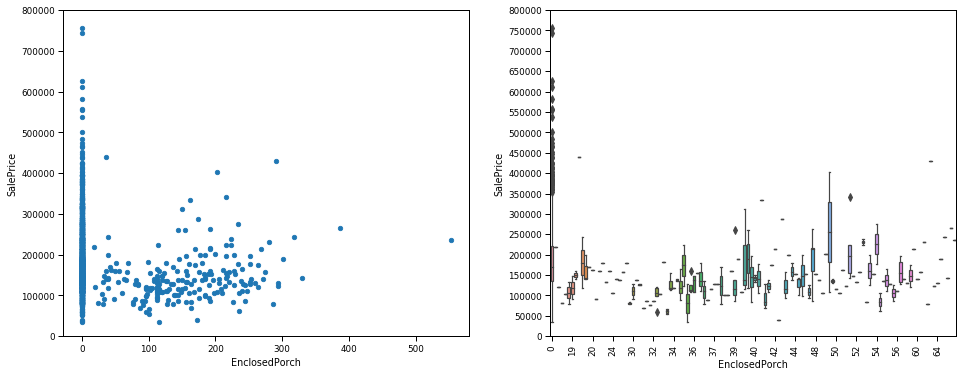

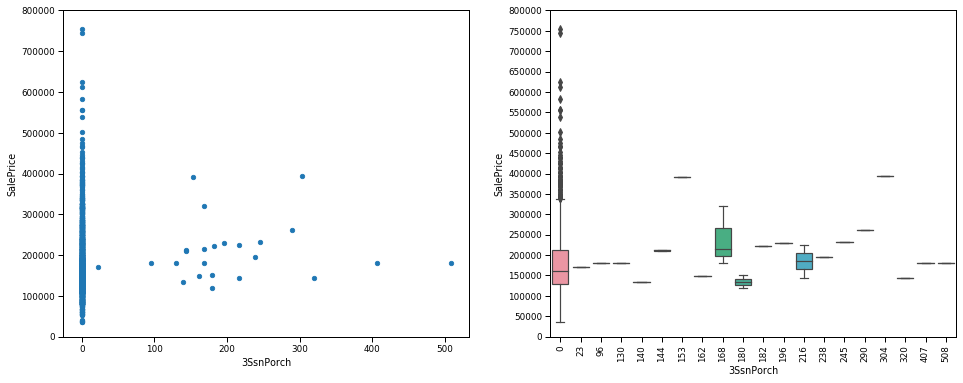

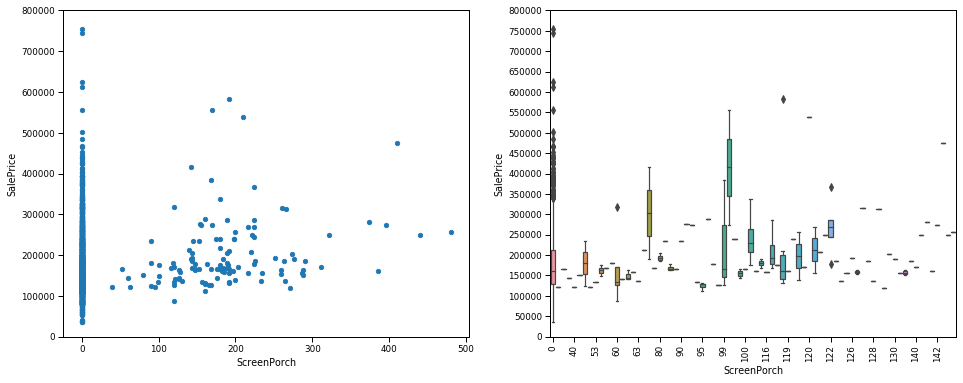

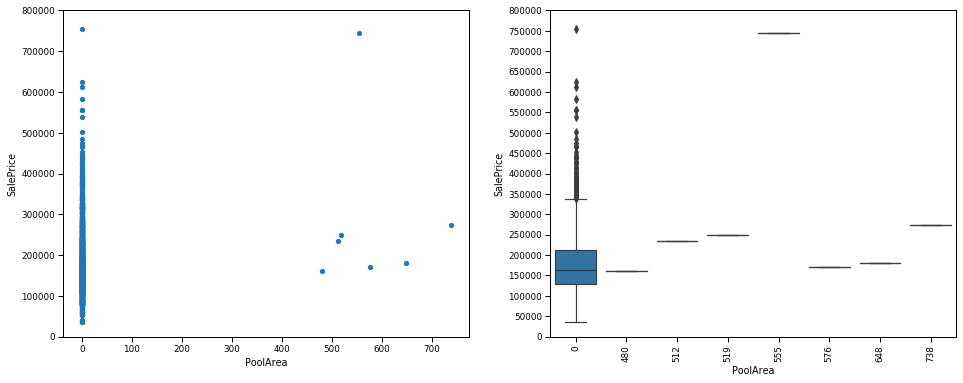

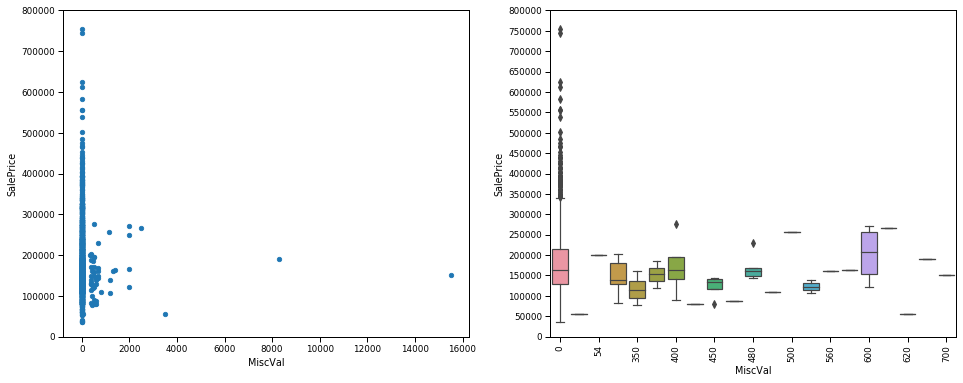

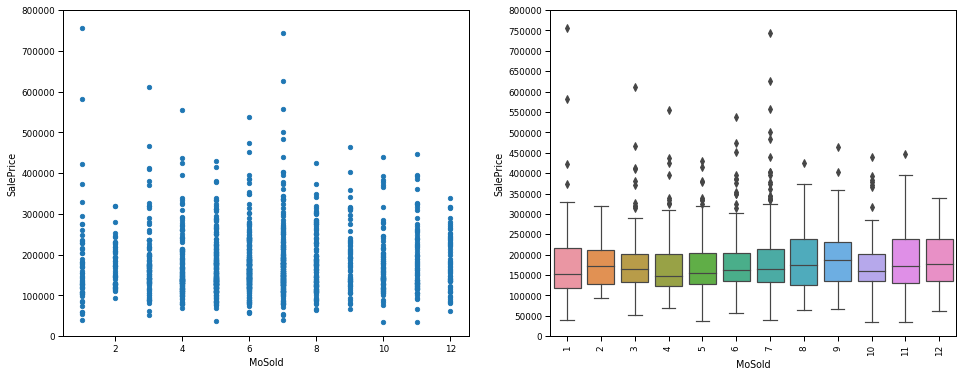

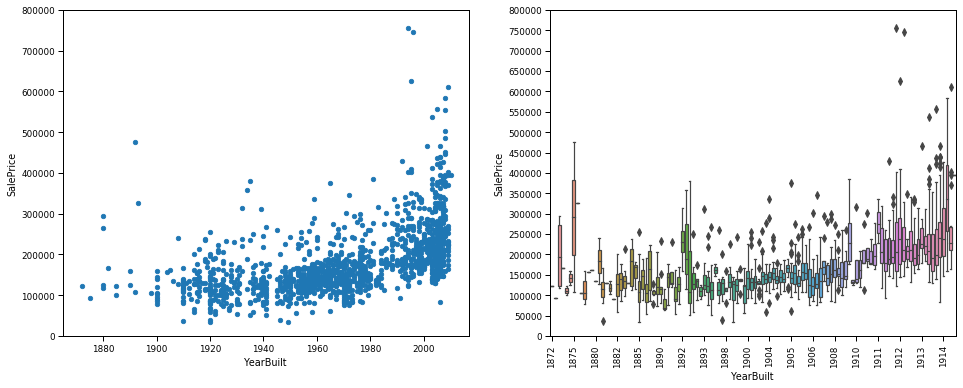

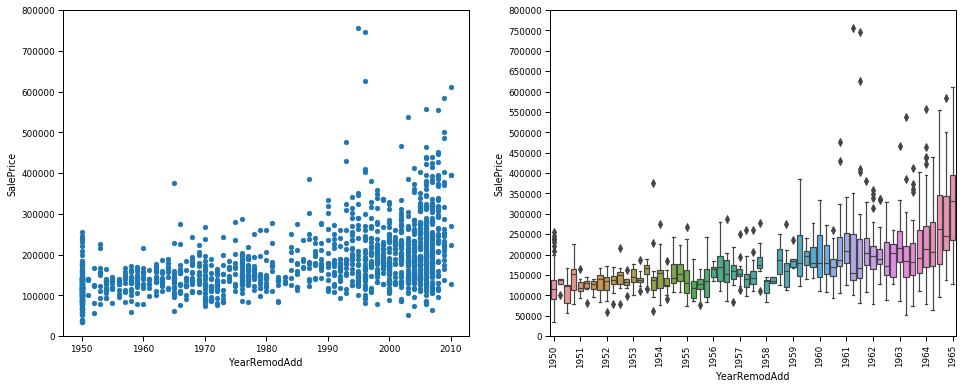

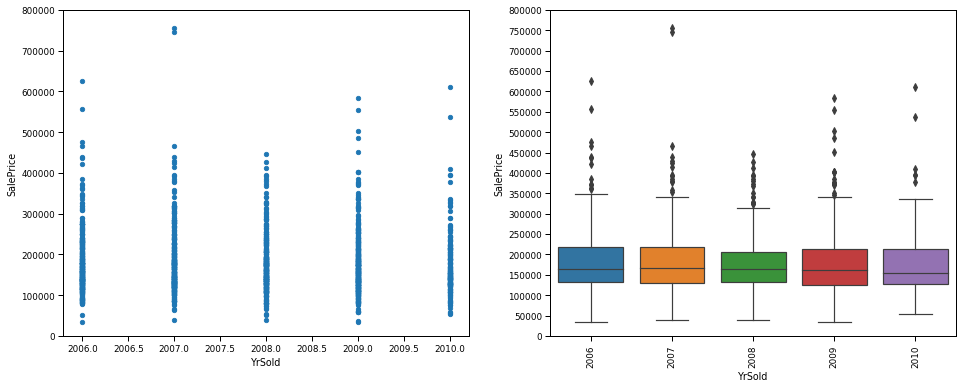

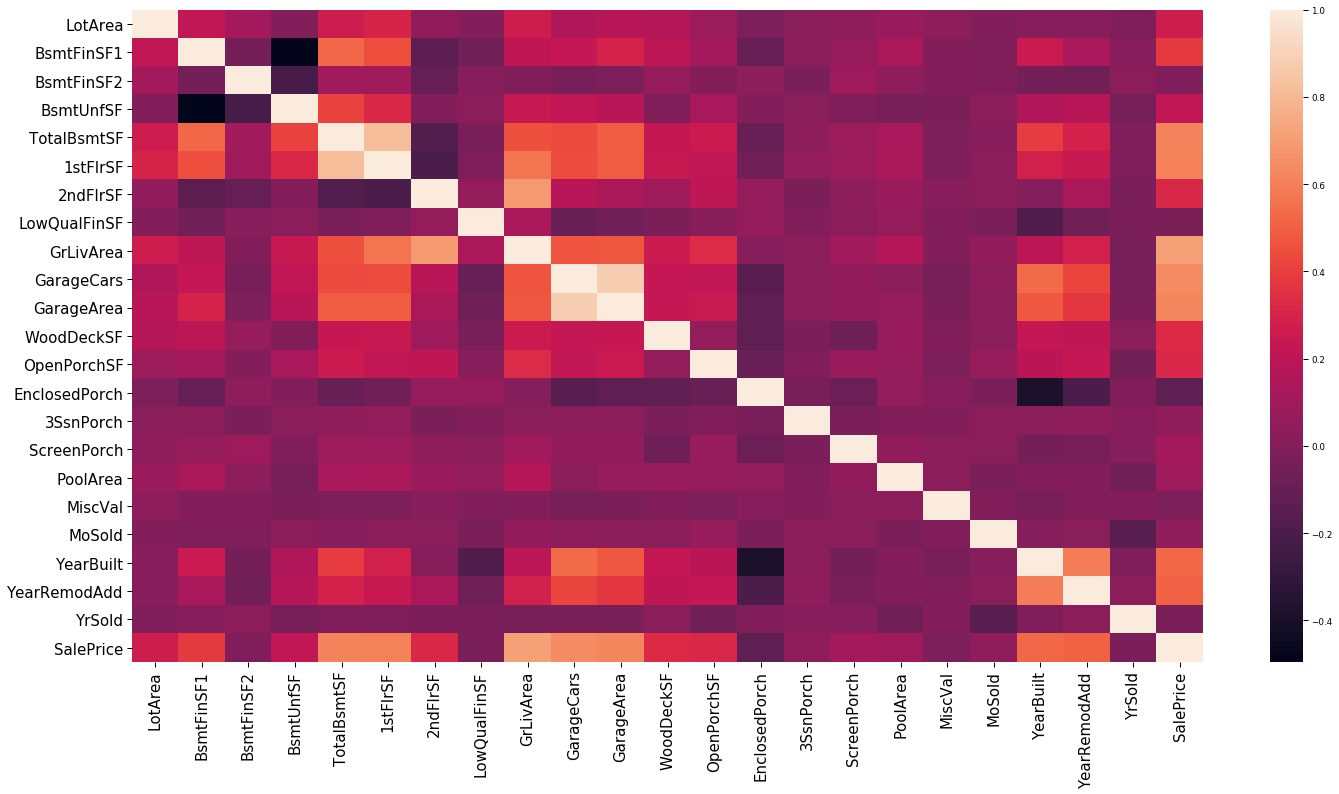

In [37]:
# main 

main_base()
ba_categoral_count("SalePrice")
ba_categoral_count_plot("SalePrice")
ba_categoral_cor("SalePrice")
ba_conti("SalePrice")
ba_conti_cor("SalePrice")